<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [153]:
import phik
import matplotlib.pyplot as plt
import os
import pandas as pd
import pandas.io.sql as sqlio
import pandas_profiling
import psycopg2 as ps
import plotly as pl
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import json

from config import HOST, USER, PASSWORD, DB_NAME
from phik import report
from phik.report import plot_correlation_matrix


request = '''SELECT * FROM tab_ex1;'''

try:
    connection = ps.connect(host=HOST,
                                  user=USER,
                                  password=PASSWORD,
                                  database=DB_NAME)
    connection.autocommit = True
    
    with connection.cursor() as cursor:
        cursor.execute('Server version();')
        print(f'Server version: {cursor.fetchone()}')
        
    with connection.cursor() as cursor:
        cursor.execute(request)
        
        df = cursor.fetchone()
        
except Exception as ex:
    print('[INFO] Error while working with PostgreSQL', ex)
finally:
    if connection:
        connection.close()
        print('[INFO] PostgreSQL connection closed')

df.head()

df_1 = sqlio.read_sql_query(request, connection)

df_1.head()

In [154]:
path = 'data_full.json'

with open(path, newline='', encoding='utf-8') as file:
    data_file = json.load(file)

In [155]:
data = pd.json_normalize(data_file)

In [156]:
path_1 = '..\материалы\signals_kafka.csv'

if os.path.exists(path_1):
    signals = pd.read_csv(path_1, encoding='cp1251')
else:
    print('File not found')
    
print(signals.shape)
signals.head()

(782, 5)


place    type  \
0  SM_Exgauster\[0:0]  analog   
1  SM_Exgauster\[0:1]  analog   
2  SM_Exgauster\[0:2]  analog   
3  SM_Exgauster\[0:3]  analog   
4  SM_Exgauster\[0:4]  analog   

                                            comment  exhauster  active  
0  Горизонтал вибрация подшипника №1. Эксгаустер №3        3.0       1  
1    Вертикал вибрация подшипника №1. Эксгаустер №3        3.0       1  
2      Осевая вибрация подшипника №1. Эксгаустер №3        3.0       1  
3  Горизонтал вибрация подшипника №2. Эксгаустер №3        3.0       1  
4    Вертикал вибрация подшипника №2. Эксгаустер №3        3.0       1

In [157]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32934 entries, 0 to 32933
Columns: 766 entries, moment to SM_Exgauster\[8.0]
dtypes: float64(765), object(1)
memory usage: 192.5+ MB
None


moment  SM_Exgauster\[0:0]  SM_Exgauster\[0:1]  \
0  2023-01-25T06:32:25.125007            1.284722            1.689815   
1  2023-01-25T06:33:25.125007            1.267361            1.689815   
2  2023-01-25T06:34:25.125007            1.296296            1.701389   
3  2023-01-25T06:35:25.125007            1.255787            1.689815   
4  2023-01-25T06:36:25.125007            1.302083            1.701389   

   SM_Exgauster\[0:2]  SM_Exgauster\[0:3]  SM_Exgauster\[0:4]  \
0            0.964621            1.614583            2.089120   
1            0.962173            1.626158            2.065972   
2            0.971429            1.620370            2.083333   
3            0.971007            1.614583            2.077546   
4            0.966538            1.620370            2.112268   

   SM_Exgauster\[0:5]  SM_Exgauster\[0:6]  SM_Exgauster\[0:7]  \
0            1.440972            2.001208            1.539352   
1            1.417824            1.997886            1.556713   
2            1.429398            1.990758            1.527778   
3            1.429398            2.019292            1.516204   
4            1.452546            1.981981            1.562500   

   SM_Exgauster\[0:8]  ...  SM_Exgauster\[6:2]  SM_Exgauster\[6.0]  \
0            1.494385  ...            2.600589                 1.0   
1            1.482208  ...            2.594604                 1.0   
2            1.489869  ...            2.591550                 1.0   
3            1.489961  ...            2.686367                 1.0   
4            1.494923  ...            2.692058                 1.0   

   SM_Exgauster\[7:0]  SM_Exgauster\[7:1]  SM_Exgauster\[7:2]  \
0          625.000000          138.372635            3.098138   
1          617.404541          138.209290            3.100688   
2          618.438721          138.295776            3.107095   
3          622.107178          138.080093            3.112228   
4          617.766602          138.354065            3.106137   

   SM_Exgauster\[7.0]  SM_Exgauster\[8:0]  SM_Exgauster\[8:1]  \
0                 1.0            0.723379           15.567306   
1                 1.0            0.723379           15.139420   
2                 1.0            0.723379           15.138195   
3                 1.0            0.723379           15.138195   
4                 1.0            0.723379           15.138195   

   SM_Exgauster\[8:2]  SM_Exgauster\[8.0]  
0       -5.605194e-45                 0.0  
1       -5.605194e-45                 0.0  
2       -5.605194e-45                 0.0  
3       -5.605194e-45                 0.0  
4       -5.605194e-45                 0.0  

[5 rows x 766 columns]

In [158]:
data['moment'] = pd.to_datetime(data['moment'])
data.set_index('moment', inplace=True)
data.index = pd.to_datetime(data.index)

In [159]:
data.head()

SM_Exgauster\[0:0]  SM_Exgauster\[0:1]  \
moment                                                               
2023-01-25 06:32:25.125007            1.284722            1.689815   
2023-01-25 06:33:25.125007            1.267361            1.689815   
2023-01-25 06:34:25.125007            1.296296            1.701389   
2023-01-25 06:35:25.125007            1.255787            1.689815   
2023-01-25 06:36:25.125007            1.302083            1.701389   

                            SM_Exgauster\[0:2]  SM_Exgauster\[0:3]  \
moment                                                               
2023-01-25 06:32:25.125007            0.964621            1.614583   
2023-01-25 06:33:25.125007            0.962173            1.626158   
2023-01-25 06:34:25.125007            0.971429            1.620370   
2023-01-25 06:35:25.125007            0.971007            1.614583   
2023-01-25 06:36:25.125007            0.966538            1.620370   

                            SM_Exgauster\[0:4]  SM_Exgauster\[0:5]  \
moment                                                               
2023-01-25 06:32:25.125007            2.089120            1.440972   
2023-01-25 06:33:25.125007            2.065972            1.417824   
2023-01-25 06:34:25.125007            2.083333            1.429398   
2023-01-25 06:35:25.125007            2.077546            1.429398   
2023-01-25 06:36:25.125007            2.112268            1.452546   

                            SM_Exgauster\[0:6]  SM_Exgauster\[0:7]  \
moment                                                               
2023-01-25 06:32:25.125007            2.001208            1.539352   
2023-01-25 06:33:25.125007            1.997886            1.556713   
2023-01-25 06:34:25.125007            1.990758            1.527778   
2023-01-25 06:35:25.125007            2.019292            1.516204   
2023-01-25 06:36:25.125007            1.981981            1.562500   

                            SM_Exgauster\[0:8]  SM_Exgauster\[0:9]  ...  \
moment                                                              ...   
2023-01-25 06:32:25.125007            1.494385            1.765046  ...   
2023-01-25 06:33:25.125007            1.482208            1.741898  ...   
2023-01-25 06:34:25.125007            1.489869            1.712963  ...   
2023-01-25 06:35:25.125007            1.489961            1.712963  ...   
2023-01-25 06:36:25.125007            1.494923            1.770833  ...   

                            SM_Exgauster\[6:2]  SM_Exgauster\[6.0]  \
moment                                                               
2023-01-25 06:32:25.125007            2.600589                 1.0   
2023-01-25 06:33:25.125007            2.594604                 1.0   
2023-01-25 06:34:25.125007            2.591550                 1.0   
2023-01-25 06:35:25.125007            2.686367                 1.0   
2023-01-25 06:36:25.125007            2.692058                 1.0   

                            SM_Exgauster\[7:0]  SM_Exgauster\[7:1]  \
moment                                                               
2023-01-25 06:32:25.125007          625.000000          138.372635   
2023-01-25 06:33:25.125007          617.404541          138.209290   
2023-01-25 06:34:25.125007          618.438721          138.295776   
2023-01-25 06:35:25.125007          622.107178          138.080093   
2023-01-25 06:36:25.125007          617.766602          138.354065   

                            SM_Exgauster\[7:2]  SM_Exgauster\[7.0]  \
moment                                                               
2023-01-25 06:32:25.125007            3.098138                 1.0   
2023-01-25 06:33:25.125007            3.100688                 1.0   
2023-01-25 06:34:25.125007            3.107095                 1.0   
2023-01-25 06:35:25.125007            3.112228                 1.0   
2023-01-25 06:36:25.125007            3.106137                 1.0   

                            SM_Exgauster\[8:0]  SM_Exgauster\[8:1

In [160]:
for i in range(1, 7):
    globals()['exg_' + str(i)] = pd.DataFrame()
    for col in data.columns:
        if float(signals[signals['place'] == col]['exhauster']) == i:
            globals()['exg_' + str(i)][col] = data[col]

In [161]:
exg_1.head()

SM_Exgauster\[2:0]  SM_Exgauster\[2:1]  \
moment                                                               
2023-01-25 06:32:25.125007            0.590278            0.283565   
2023-01-25 06:33:25.125007            0.584491            0.283565   
2023-01-25 06:34:25.125007            0.607639            0.271991   
2023-01-25 06:35:25.125007            0.590278            0.283565   
2023-01-25 06:36:25.125007            0.607639            0.271991   

                            SM_Exgauster\[2:2]  SM_Exgauster\[2:3]  \
moment                                                               
2023-01-25 06:32:25.125007            0.381944            0.760073   
2023-01-25 06:33:25.125007            0.387731            0.772416   
2023-01-25 06:34:25.125007            0.387731            0.768963   
2023-01-25 06:35:25.125007            0.381944            0.766842   
2023-01-25 06:36:25.125007            0.381944            0.779913   

                            SM_Exgauster\[2:4]  SM_Exgauster\[2:5]  \
moment                                                               
2023-01-25 06:32:25.125007            0.584491            0.231481   
2023-01-25 06:33:25.125007            0.584491            0.214120   
2023-01-25 06:34:25.125007            0.584491            0.225694   
2023-01-25 06:35:25.125007            0.578704            0.231481   
2023-01-25 06:36:25.125007            0.578704            0.225694   

                            SM_Exgauster\[2:6]  SM_Exgauster\[2:7]  \
moment                                                               
2023-01-25 06:32:25.125007            1.400463            2.110995   
2023-01-25 06:33:25.125007            1.417824            2.100757   
2023-01-25 06:34:25.125007            1.412037            2.117101   
2023-01-25 06:35:25.125007            1.400463            2.131677   
2023-01-25 06:36:25.125007            1.423611            2.121591   

                            SM_Exgauster\[2:8]  SM_Exgauster\[2:9]  ...  \
moment                                                              ...   
2023-01-25 06:32:25.125007            2.204861            1.545139  ...   
2023-01-25 06:33:25.125007            2.228009            1.539352  ...   
2023-01-25 06:34:25.125007            2.256944            1.539352  ...   
2023-01-25 06:35:25.125007            2.210648            1.533565  ...   
2023-01-25 06:36:25.125007            2.222222            1.556713  ...   

                            SM_Exgauster\[2:184]  SM_Exgauster\[2.0]  \
moment                                                                 
2023-01-25 06:32:25.125007                   0.0                 1.0   
2023-01-25 06:33:25.125007                   0.0                 1.0   
2023-01-25 06:34:25.125007                   0.0                 1.0   
2023-01-25 06:35:25.125007                   0.0                 1.0   
2023-01-25 06:36:25.125007                   0.0                 1.0   

                            SM_Exgauster\[4:0]  SM_Exgauster\[4:1]  \
moment                                                               
2023-01-25 06:32:25.125007           83.547989            2.156743   
2023-01-25 06:33:25.125007           83.654388            2.148991   
2023-01-25 06:34:25.125007           83.637581            2.146916   
2023-01-25 06:35:25.125007           83.452797            2.145085   
2023-01-25 06:36:25.125007           83.536789            2.149846   

                            SM_Exgauster\[4:3]  SM_Exgauster\[4.0]  \
moment                                                               
2023-01-25 06:32:25.125007          180.850937                 1.0   
2023-01-25 06:33:25.125007          180.802231                 1.0   
2023-01-25 06:34:25.125007          181.313522                 1.0   
2023-01-25 06:35:25.125007          184.624741                 1.0   
2023-01-25 06:36:25.125007          181.021362                 1.0   

                            SM_Exgauster\[4.1]  SM_

In [162]:
for i in range(1, 7):
    new_names = []
    for col in globals()['exg_' + str(i)].columns:
        new_name = str(signals[signals['place'] == col]['comment'])
        new_name = ' '.join(new_name.split()[1:-4])
        new_names.append(new_name)
    globals()['exg_' + str(i)].columns = new_names


In [163]:
for i in range(1, 7):
    drop_list = []
    for col in globals()['exg_' + str(i)].columns:
        if 'Уставка' in col:
            drop_list.append(col)
    globals()['exg_' + str(i) + '_ustav'] = globals()['exg_' + str(i)][drop_list]
    globals()['exg_' + str(i)] = globals()['exg_' + str(i)].drop(drop_list, axis=1)

In [164]:
for i in range(1, 7):
    print('Размеры массивов')
    print(globals()['exg_' + str(i)].shape)
    print('Размеры массивов с уставками')
    print(globals()['exg_' + str(i) + '_ustav'].shape)

Размеры массивов
(32934, 38)
Размеры массивов с уставками
(32934, 84)
Размеры массивов
(32934, 41)
Размеры массивов с уставками
(32934, 84)
Размеры массивов
(32934, 41)
Размеры массивов с уставками
(32934, 84)
Размеры массивов
(32934, 44)
Размеры массивов с уставками
(32934, 84)
Размеры массивов
(32934, 41)
Размеры массивов с уставками
(32934, 84)
Размеры массивов
(32934, 44)
Размеры массивов с уставками
(32934, 84)


In [165]:
exg_1.head()

Горизонтал вибрация подшипника №1. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          0.590278   
2023-01-25 06:33:25.125007                                          0.584491   
2023-01-25 06:34:25.125007                                          0.607639   
2023-01-25 06:35:25.125007                                          0.590278   
2023-01-25 06:36:25.125007                                          0.607639   

                            Вертикал вибрация подшипника №1. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007                                        0.283565   
2023-01-25 06:33:25.125007                                        0.283565   
2023-01-25 06:34:25.125007                                        0.271991   
2023-01-25 06:35:25.125007                                        0.283565   
2023-01-25 06:36:25.125007                                        0.271991   

                            Осевая вибрация подшипника №1. Эксгаустер №1  \
moment                                                                     
2023-01-25 06:32:25.125007                                      0.381944   
2023-01-25 06:33:25.125007                                      0.387731   
2023-01-25 06:34:25.125007                                      0.387731   
2023-01-25 06:35:25.125007                                      0.381944   
2023-01-25 06:36:25.125007                                      0.381944   

                            Горизонтал вибрация подшипника №2. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          0.760073   
2023-01-25 06:33:25.125007                                          0.772416   
2023-01-25 06:34:25.125007                                          0.768963   
2023-01-25 06:35:25.125007                                          0.766842   
2023-01-25 06:36:25.125007                                          0.779913   

                            Вертикал вибрация подшипника №2. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007                                        0.584491   
2023-01-25 06:33:25.125007                                        0.584491   
2023-01-25 06:34:25.125007                                        0.584491   
2023-01-25 06:35:25.125007                                        0.578704   
2023-01-25 06:36:25.125007                                        0.578704   

                            Осевая вибрация подшипника №2. Эксгаустер №1  \
moment                                                                     
2023-01-25 06:32:25.125007                                      0.231481   
2023-01-25 06:33:25.125007                                      0.214120   
2023-01-25 06:34:25.125007                                      0.225694   
2023-01-25 06:35:25.125007                                      0.231481   
2023-01-25 06:36:25.125007                                      0.225694   

                            Горизонтал вибрация подшипника №7. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          1.400463   
2023-01-25 06:33:25.125007                                          1.417824   
2023-01-25 06:34:25.125007                                          1.412037   
2023-01-25 06:35:25.125007                                          1.400463   
2023-01-25 06:36:25.125007                                          1.423611   

                            Вертикал вибрация подшипника №7. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007   

display(pandas_profiling.ProfileReport(exg_4))

In [166]:
exg_4_phik = exg_4.phik_matrix()
exg_4_phik

interval columns not set, guessing: ['Горизонтал вибрация подшипника №1. Эксгаустер №4', 'Вертикал вибрация подшипника №1. Эксгаустер №4', 'Осевая вибрация подшипника №1. Эксгаустер №4', 'Горизонтал вибрация подшипника №2. Эксгаустер №4', 'Вертикал вибрация подшипника №2. Эксгаустер №4', 'Осевая вибрация подшипника №2. Эксгаустер №4', 'Горизонтал вибрация подшипника №7. Эксгаустер №4', 'Вертикал вибрация подшипника №7. Эксгаустер №4', 'Осевая вибрация подшипника №7. Эксгаустер №4', 'Горизонтал вибрация подшипника №8. Эксгаустер №4', 'Вертикал вибрация подшипника №8. Эксгаустер №4', 'Осевая вибрация подшипника №8. Эксгаустер №4', 'Температура перед эксгаустером №4', 'Температура нагрева подшипника №1 (ротора прив...', 'Температура нагрева подшипника №2 (ротора прив...', 'Температура нагрева подшипника №3 (редуктор эк...', 'Температура нагрева подшипника №4 (редуктор эк...', 'Температура нагрева подшипника №5 (редуктор эк...', 'Температура нагрева подшипника №6 (редуктор эк...', 'Темпера

C:\Users\Ксения\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Температура нагрева статора №1. Эксгаустер №4 for analysis 1. Dropping this column
  warnings.warn(
C:\Users\Ксения\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Температура воздуха двигателя т1. Эксгаустер №4 for analysis 1. Dropping this column
  warnings.warn(
C:\Users\Ксения\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Температура воздуха двигателя т2. Эксгаустер №4 for analysis 1. Dropping this column
  warnings.warn(
C:\Users\Ксения\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Температура воздуха двигателя т3. Эксгаустер №4 for analysis 1. Dropping this column
  warnings.warn(
C:\Users\Ксения\AppData\Roaming\Python\Python3

Горизонтал вибрация подшипника №1. Эксгаустер №4  \
Горизонтал вибрация подшипника №1. Эксгаустер №4                                           1.000000   
Вертикал вибрация подшипника №1. Эксгаустер №4                                             0.849612   
Осевая вибрация подшипника №1. Эксгаустер №4                                               0.859182   
Горизонтал вибрация подшипника №2. Эксгаустер №4                                           0.949889   
Вертикал вибрация подшипника №2. Эксгаустер №4                                             0.904880   
Осевая вибрация подшипника №2. Эксгаустер №4                                               0.671507   
Горизонтал вибрация подшипника №7. Эксгаустер №4                                           0.412361   
Вертикал вибрация подшипника №7. Эксгаустер №4                                             0.045203   
Осевая вибрация подшипника №7. Эксгаустер №4                                               0.815460   
Горизонтал вибрация подшипника №8. Эксгаустер №4                                           0.605640   
Вертикал вибрация подшипника №8. Эксгаустер №4                                             0.366667   
Осевая вибрация подшипника №8. Эксгаустер №4                                               0.561455   
Температура перед эксгаустером №4                                                          0.615936   
Температура нагрева подшипника №1 (ротора прив...                                          0.665356   
Температура нагрева подшипника №2 (ротора прив...                                          0.637526   
Температура нагрева подшипника №3 (редуктор эк...                                          0.629296   
Температура нагрева подшипника №4 (редуктор эк...                                          0.640810   
Температура нагрева подшипника №5 (редуктор эк...                                          0.619692   
Температура нагрева подшипника №6 (редуктор эк...                                          0.630417   
Температура нагрева подшипника №7 (ротор эксга...                                          0.607030   
Температура нагрева подшипника №8 (ротор эксга...                                          0.661103   
Температура нагрева подшипника №9 (ротор эксга...                                          0.645764   
Температура воды до охладителя. Эксгаустер №4                                              0.416890   
Температура воды на выходе охладителя. Эксгаус...                                          0.445079   
Температура масла до охладителя. Эксгаустер №4                                             0.671223   
Температура масла после охладителя. Эксгаустер №4                                          0.647551   
Разрежение перед эксгаустером №4                                                           0.641047   
62 Работа Эксгаустера №4                                                                   0.981117   
Уровень масла в маслосистеме Эксгаустера №4                                                0.729059   
Давление масла в маслосистеме Эксгаустера №4                                               0.673894   
Ток ротора Эксгаустера №4                                                                  0.786927   
Ток статора Эксгаустера №4                                                                 0.830010   
Напряжение ротора Эксгаустера №4                                                           0.710473   
Напряжение статора Эксгаустера №4                                                          0.875735   
Положение задвижки газ Эксгаустера №4                                                      0.616288   
Эксгаустер №4 в работе                                                                     0.979045   
ЗАКРЫТО задвижка газ Эксгаустер №4                                                         0.417883   
ОТКРЫТО задвижка газ Эксгаустер №4                                                         0.777671   
Запущен пусковой маслонасос Эксгау

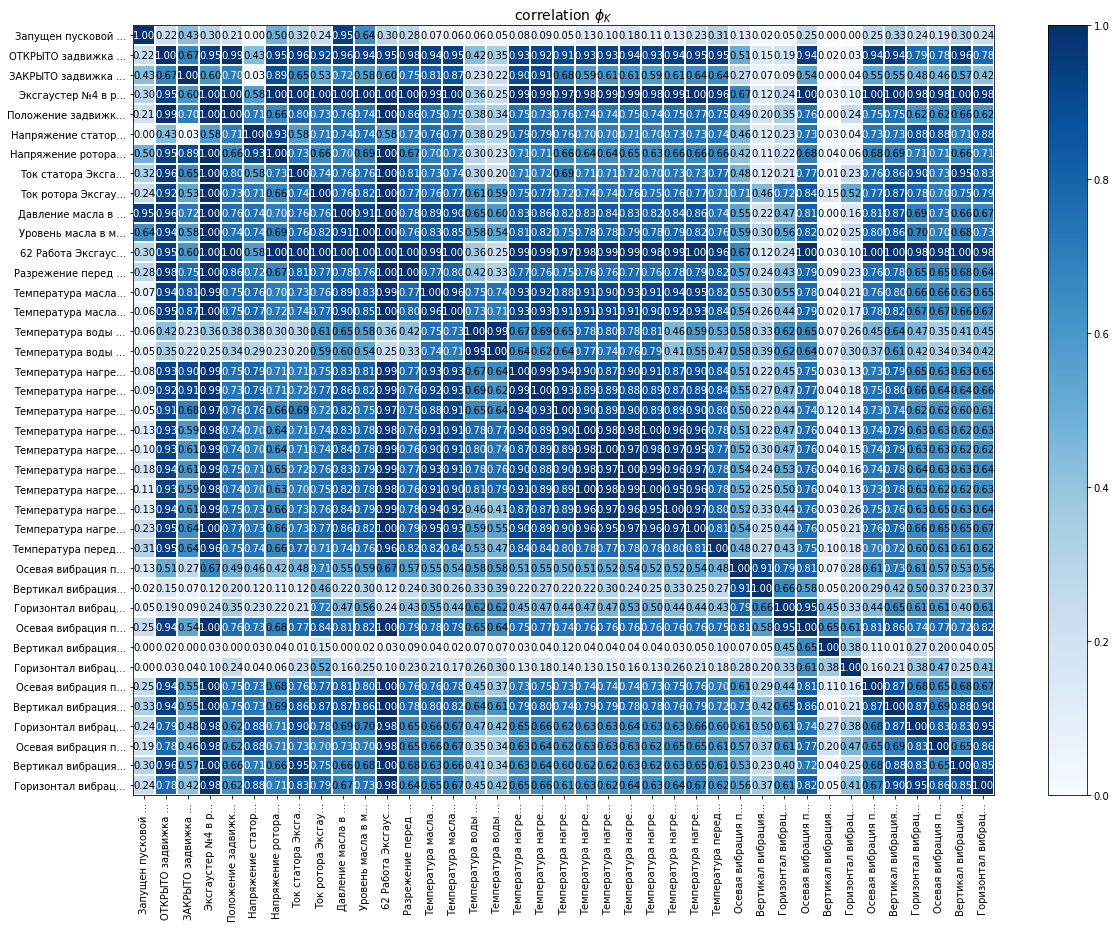

In [167]:
plot_correlation_matrix(exg_4_phik.values, 
                        x_labels=exg_4_phik.columns, 
                        y_labels=exg_4_phik.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(17, 13))
plt.tight_layout()

Удалить отрезок ремонта на другом приборе

In [168]:
exg_4_new = exg_4['2023-02-01':'2023-02-03']
exg_4_new[exg_4_new['62 Работа Эксгаустера №4'] == 0]

C:\Users\Ксения\AppData\Local\Temp\ipykernel_15008\3699220429.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  exg_4_new = exg_4['2023-02-01':'2023-02-03']


Горизонтал вибрация подшипника №1. Эксгаустер №4  \
moment                                                                         
2023-02-01 23:31:25.599340                                          0.156250   
2023-02-01 23:32:25.599340                                          0.121528   
2023-02-01 23:33:25.599340                                          0.081019   
2023-02-01 23:34:25.599340                                          0.081019   
2023-02-01 23:35:25.599340                                          0.081019   
...                                                                      ...   
2023-02-02 14:09:25.599340                                          0.040509   
2023-02-02 14:10:25.599340                                          0.034722   
2023-02-02 14:11:25.599340                                          0.069444   
2023-02-02 14:12:25.599340                                          0.052083   
2023-02-02 14:13:25.599340                                          0.034722   

                            Вертикал вибрация подшипника №1. Эксгаустер №4  \
moment                                                                       
2023-02-01 23:31:25.599340                                        0.081019   
2023-02-01 23:32:25.599340                                        0.109954   
2023-02-01 23:33:25.599340                                        0.069444   
2023-02-01 23:34:25.599340                                        0.069444   
2023-02-01 23:35:25.599340                                        0.081019   
...                                                                    ...   
2023-02-02 14:09:25.599340                                        0.092593   
2023-02-02 14:10:25.599340                                        0.092593   
2023-02-02 14:11:25.599340                                        0.109954   
2023-02-02 14:12:25.599340                                        0.086806   
2023-02-02 14:13:25.599340                                        0.098380   

                            Осевая вибрация подшипника №1. Эксгаустер №4  \
moment                                                                     
2023-02-01 23:31:25.599340                                      0.092593   
2023-02-01 23:32:25.599340                                      0.057870   
2023-02-01 23:33:25.599340                                      0.040509   
2023-02-01 23:34:25.599340                                      0.040509   
2023-02-01 23:35:25.599340                                      0.040509   
...                                                                  ...   
2023-02-02 14:09:25.599340                                      0.028935   
2023-02-02 14:10:25.599340                                      0.028935   
2023-02-02 14:11:25.599340                                      0.034722   
2023-02-02 14:12:25.599340                                      0.028935   
2023-02-02 14:13:25.599340                                      0.034722   

                            Горизонтал вибрация подшипника №2. Эксгаустер №4  \
moment                                                                         
2023-02-01 23:31:25.599340                                          0.150463   
2023-02-01 23:32:25.599340                                          0.081019   
2023-02-01 23:33:25.599340                                          0.086806   
2023-02-01 23:34:25.599340                                          0.081019   
2023-02-01 23:35:25.599340                                          0.081019   
...                                                                      ...   
2023-02-02 14:09:25.599340                                          0.052083   
2023-02-02 14:10:25.599340                                          0.057870   
2023-02-02 14:11:25.599340                                          0.069444   
2023-02-02 14:12:25.599340                                          0.052083   
2023-02-02 14:13:25.599

Горизонтал вибрация подшипника №1. Эксгаустер №2


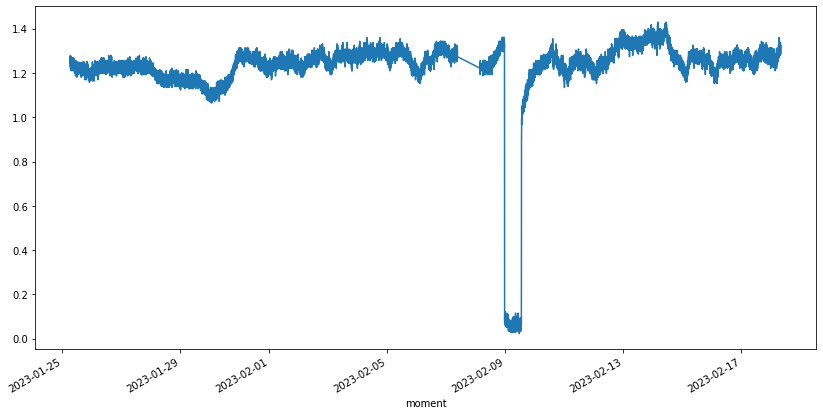

Вертикал вибрация подшипника №1. Эксгаустер №2


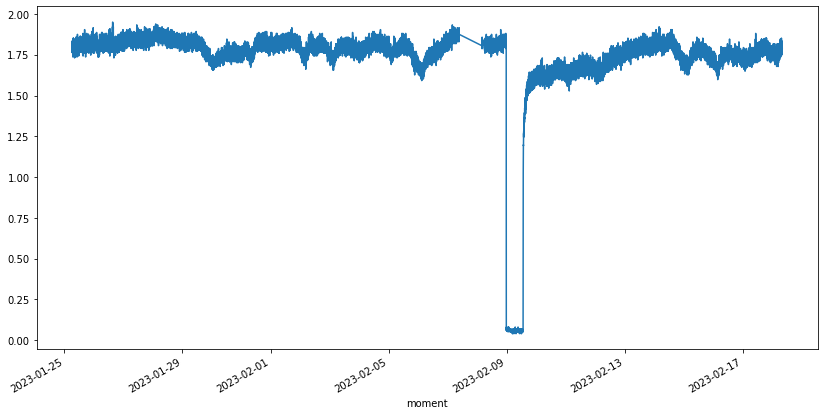

Осевая вибрация подшипника №1. Эксгаустер №2


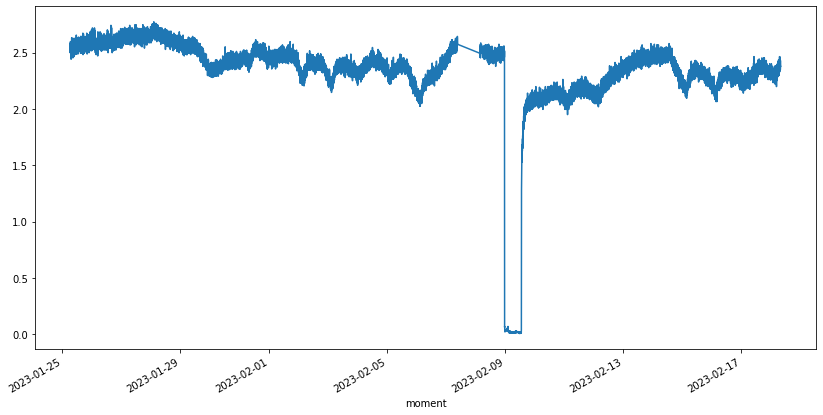

Горизонтал вибрация подшипника №2. Эксгаустер №2


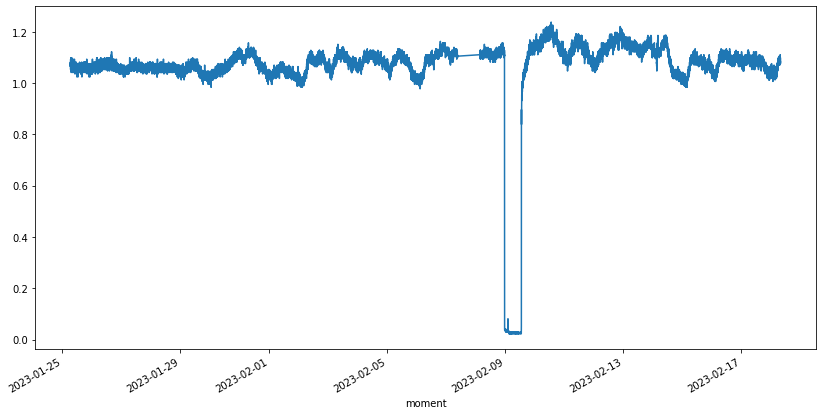

Вертикал вибрация подшипника №2. Эксгаустер №2


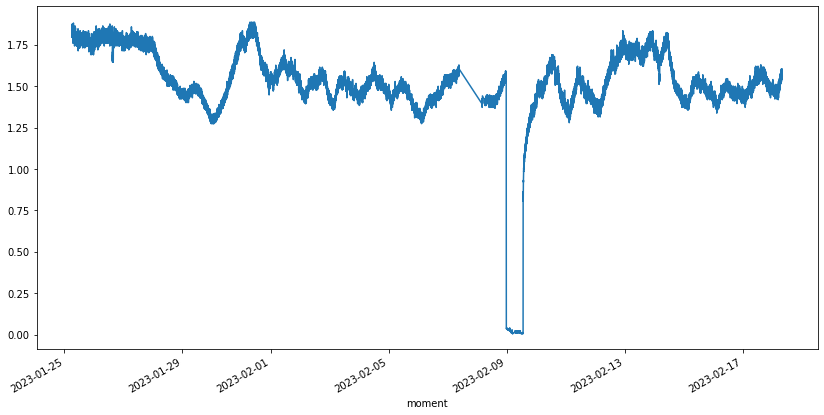

Осевая вибрация подшипника №2. Эксгаустер №2


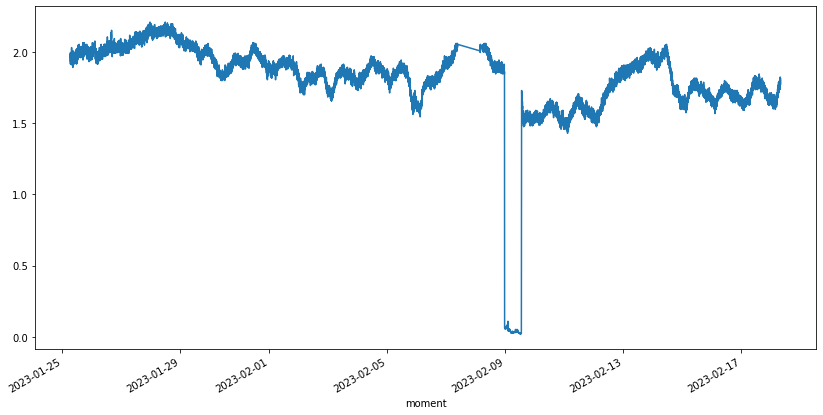

Горизонтал вибрация подшипника №7. Эксгаустер №2


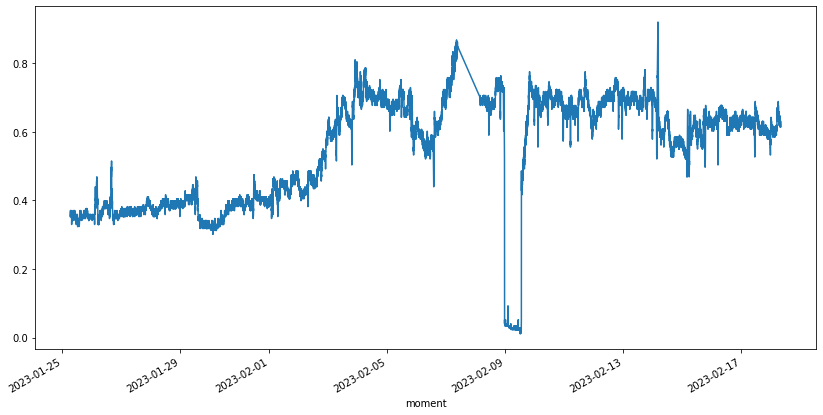

Вертикал вибрация подшипника №7. Эксгаустер №2


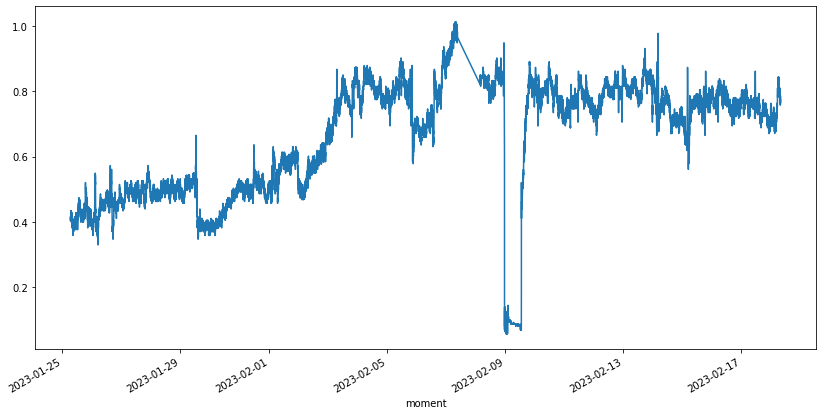

Осевая вибрация подшипника №7. Эксгаустер №2


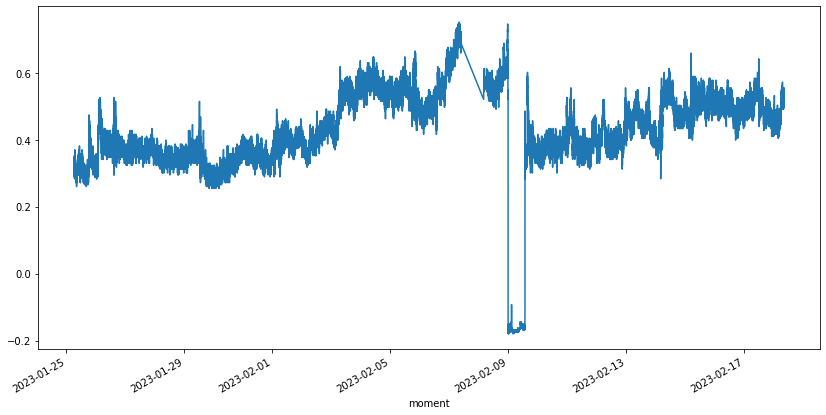

Горизонтал вибрация подшипника №8. Эксгаустер №2


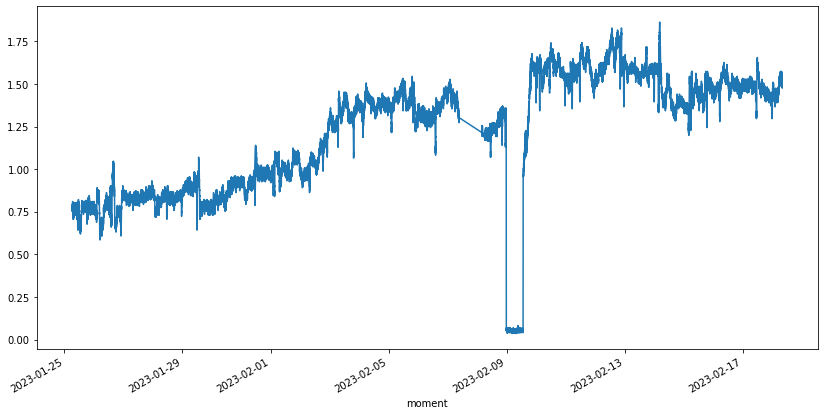

Вертикал вибрация подшипника №8. Эксгаустер №2


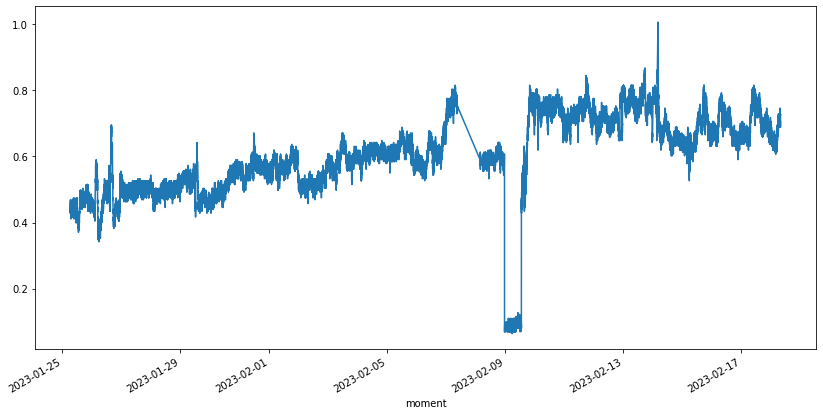

Осевая вибрация подшипника №8. Эксгаустер №2


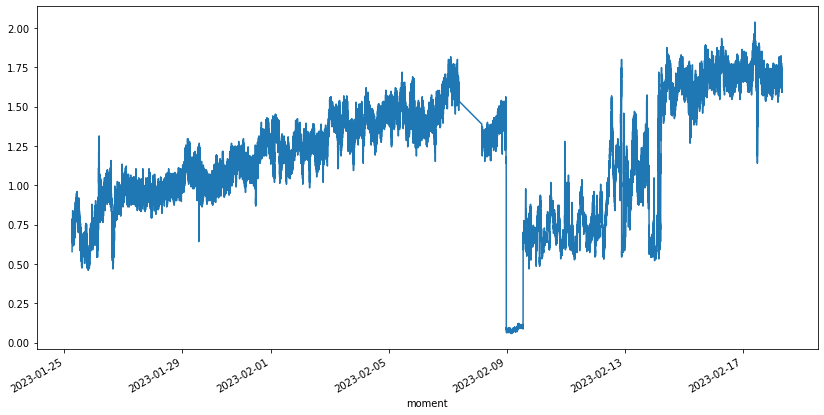

Температура перед эксгаустером №2


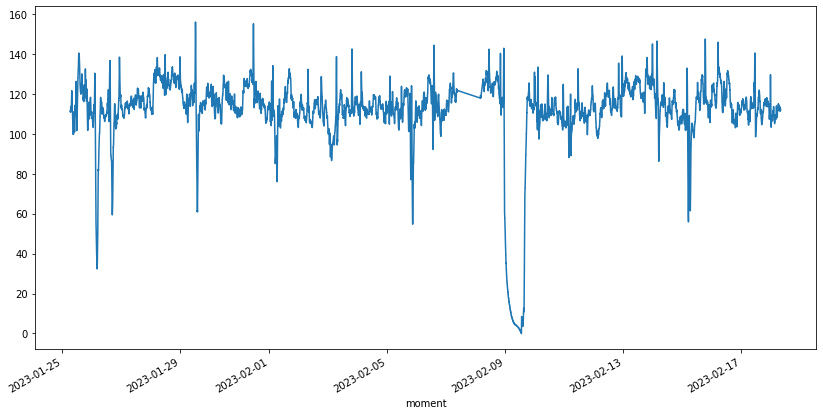

Температура нагрева подшипника №1 (ротора прив...


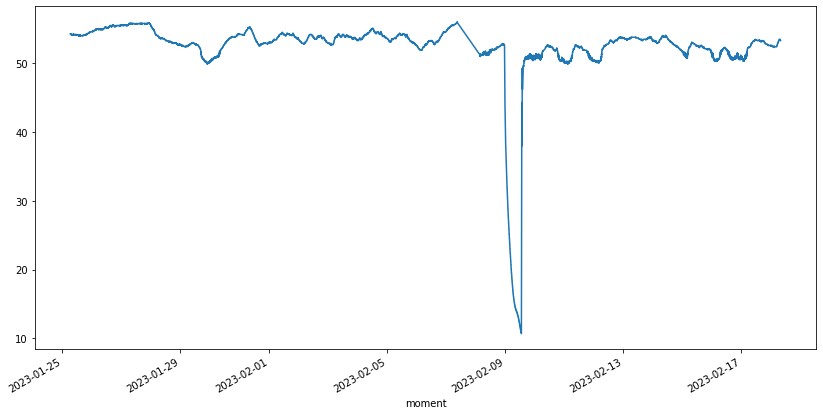

Температура нагрева подшипника №2 (ротора прив...


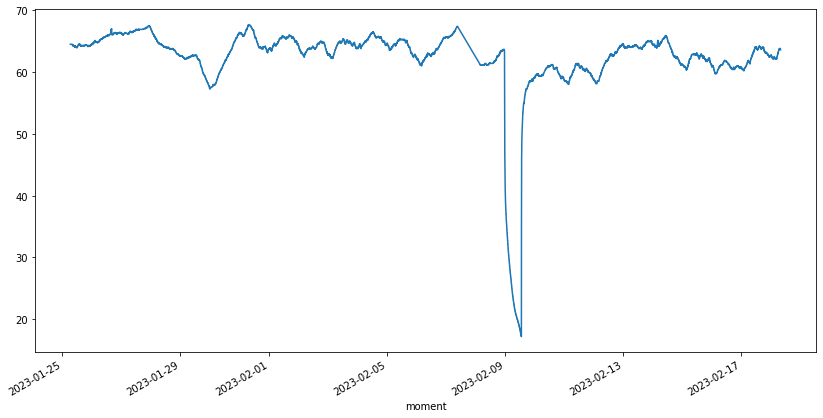

Температура нагрева подшипника №3 (редуктор эк...


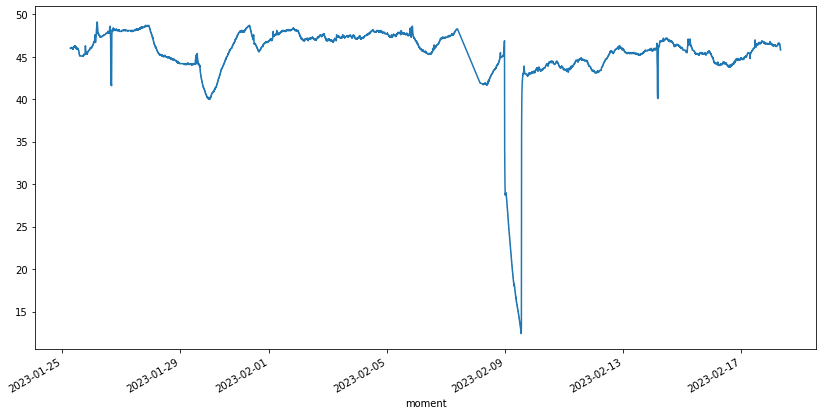

Температура нагрева подшипника №4 (редуктор эк...


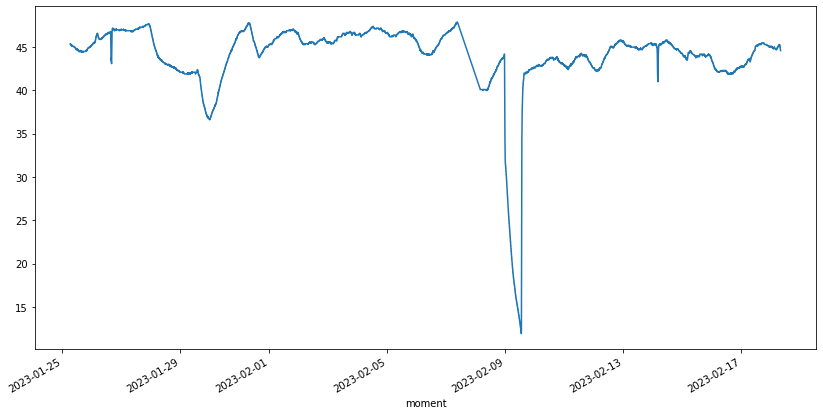

Температура нагрева подшипника №5 (редуктор эк...


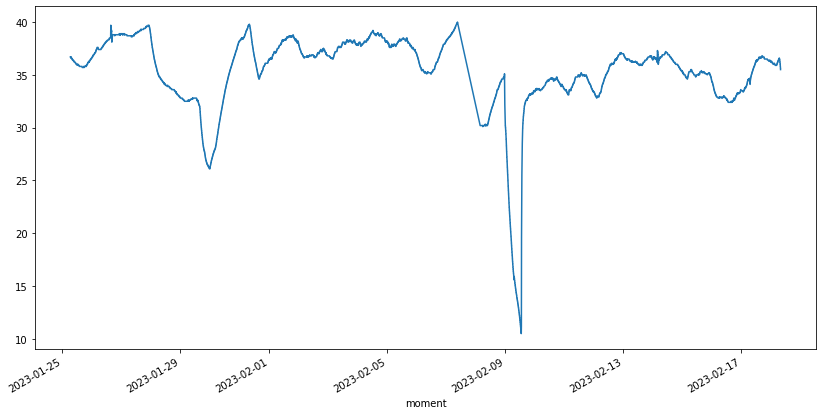

Температура нагрева подшипника №6 (редуктор эк...


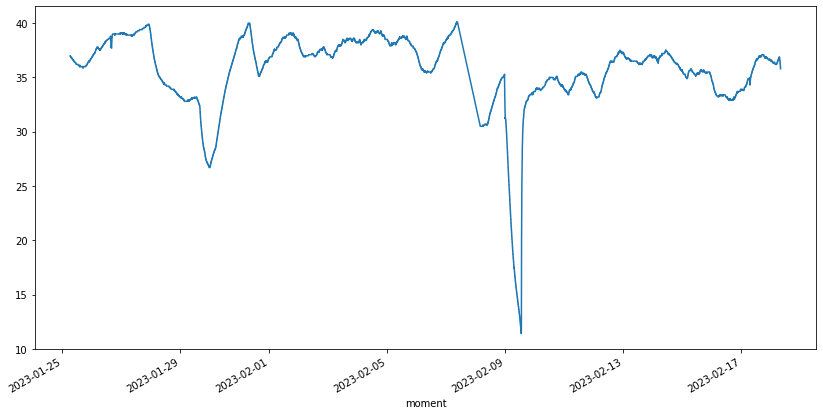

Температура нагрева подшипника №7 (ротор эксга...


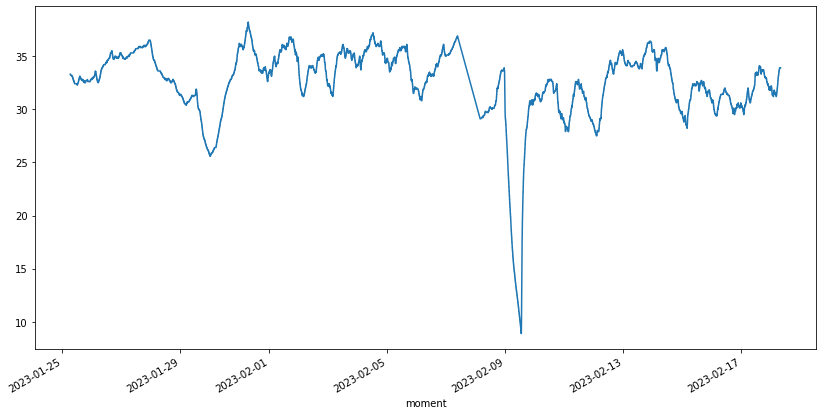

Температура нагрева подшипника №8 (ротор эксга...


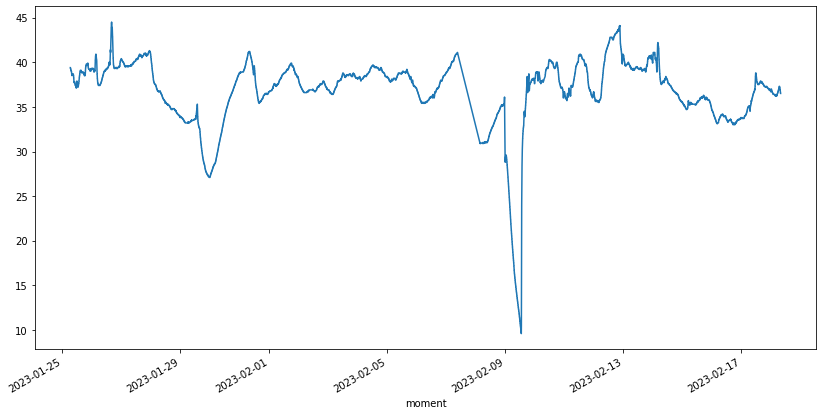

Температура нагрева подшипника №9 (ротор эксга...


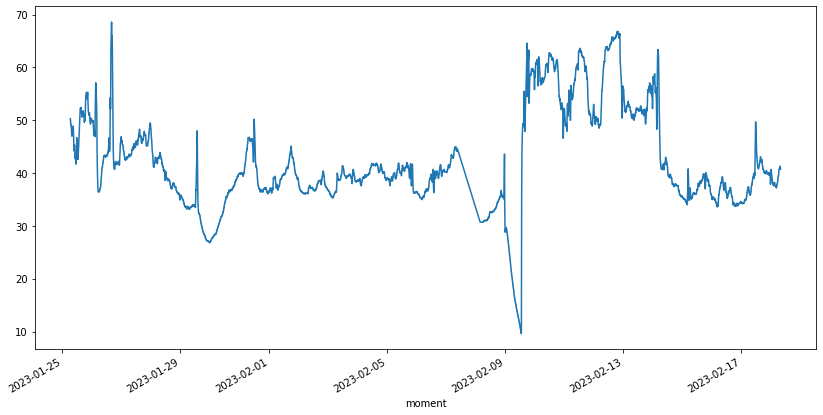

Температура воды до охладителя. Эксгаустер №2


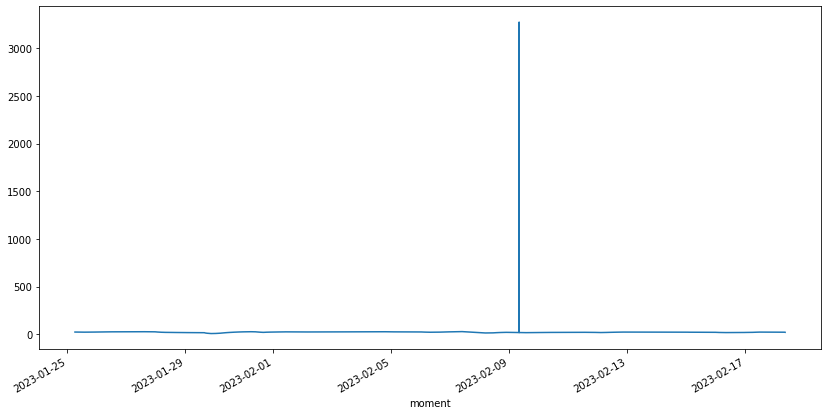

Температура воды на выходе охладителя. Эксгаус...


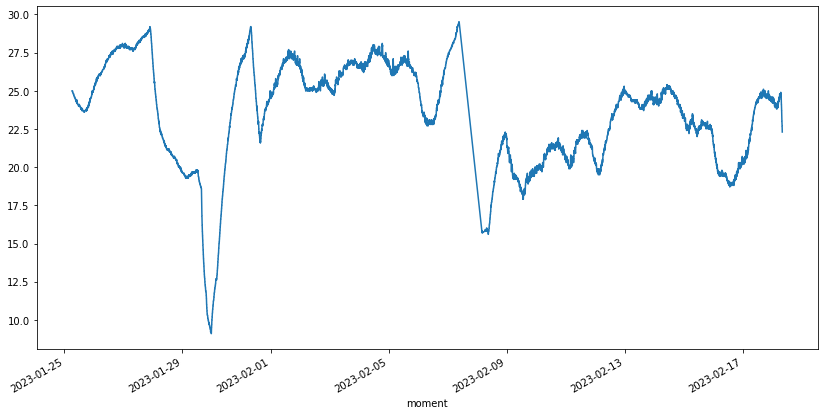

Температура нагрева статора №1. Эксгаустер №2


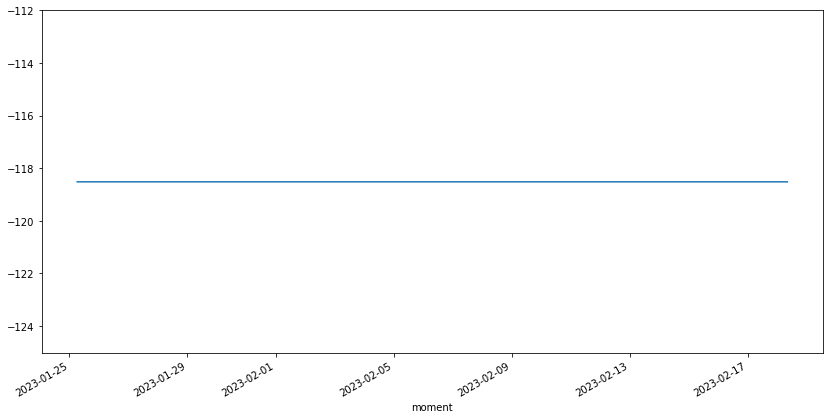

Температура воздуха двигателя т1. Эксгаустер №2


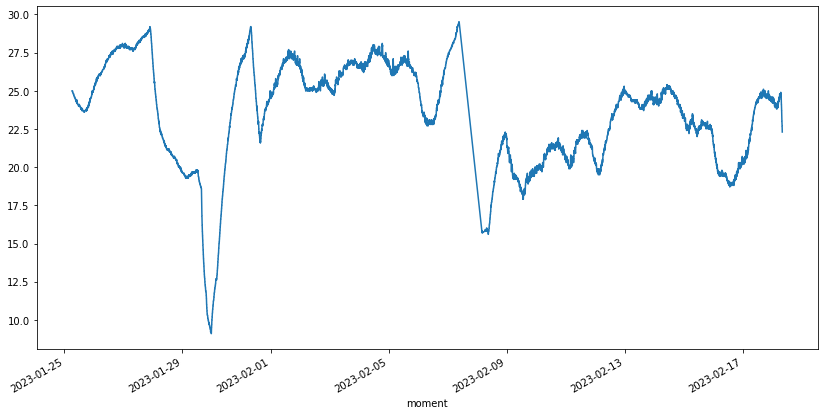

Температура воздуха двигателя т2. Эксгаустер №2


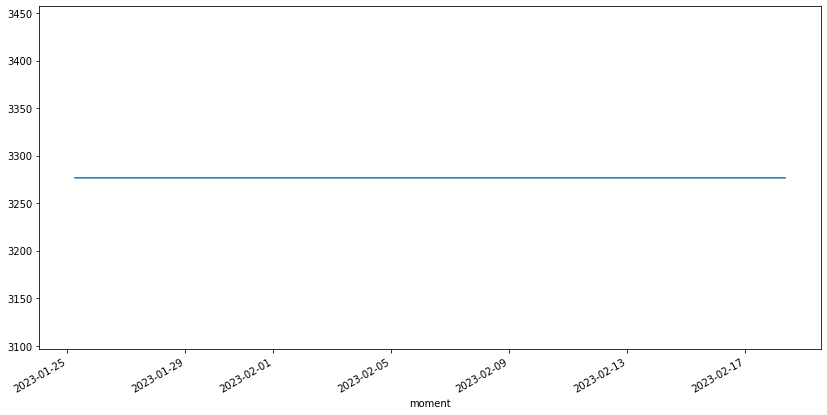

Температура воздуха двигателя т3. Эксгаустер №2


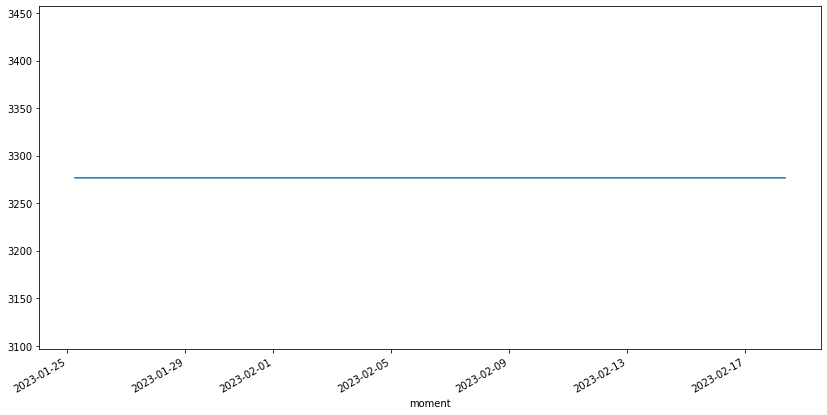

Температура масла до охладителя. Эксгаустер №2


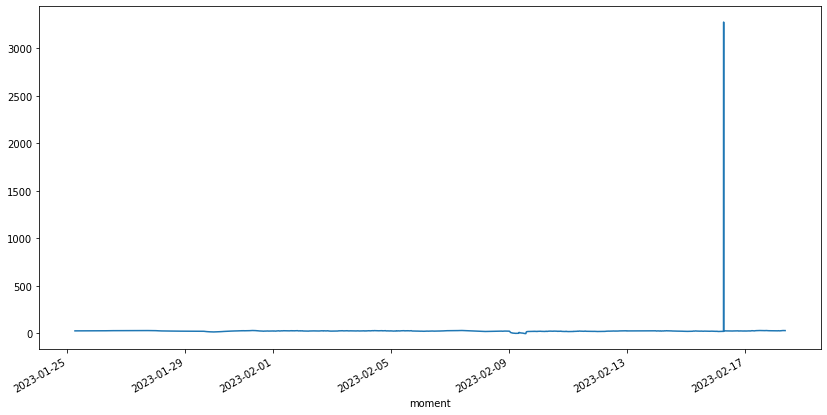

Температура масла после охладителя. Эксгаустер №2


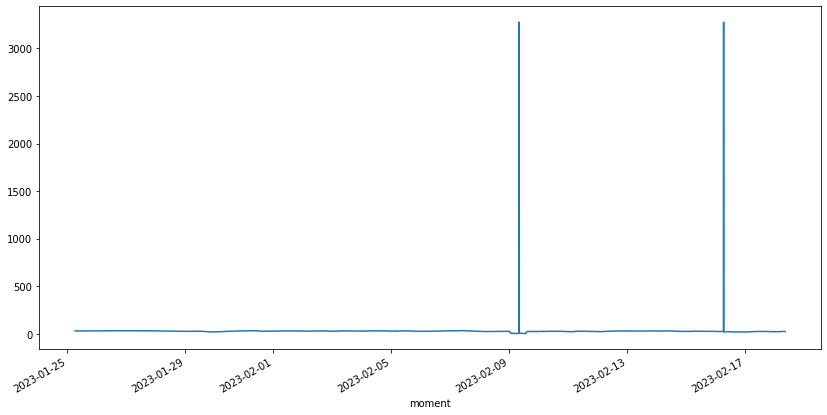

Разрежение перед эксгаустером №2


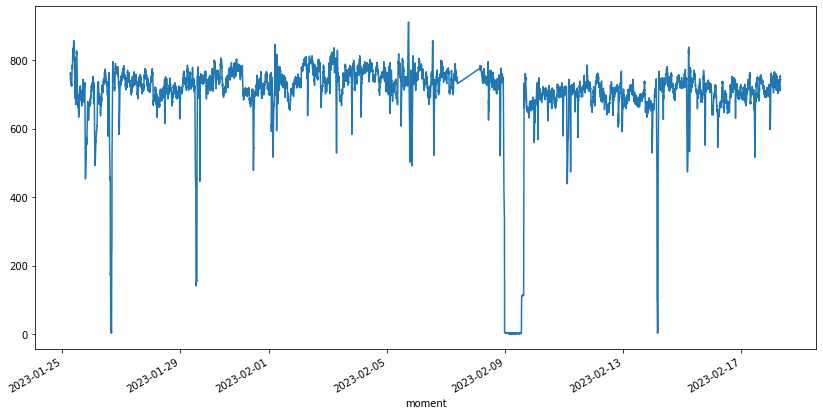

Давление воды Эксгаустер №2


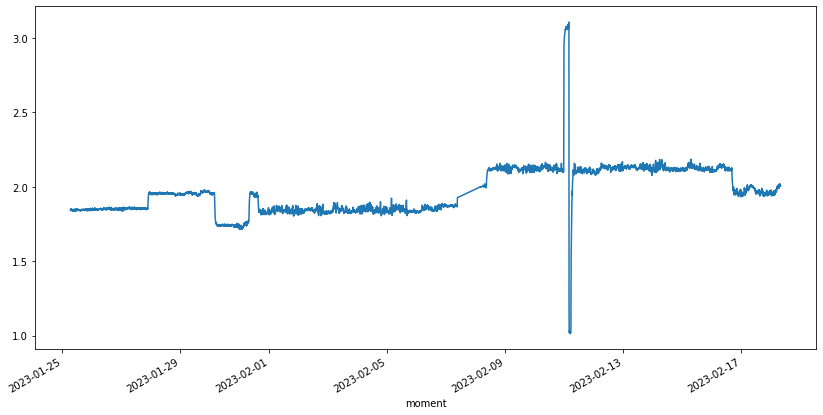

62 Работа эксгаустера №2


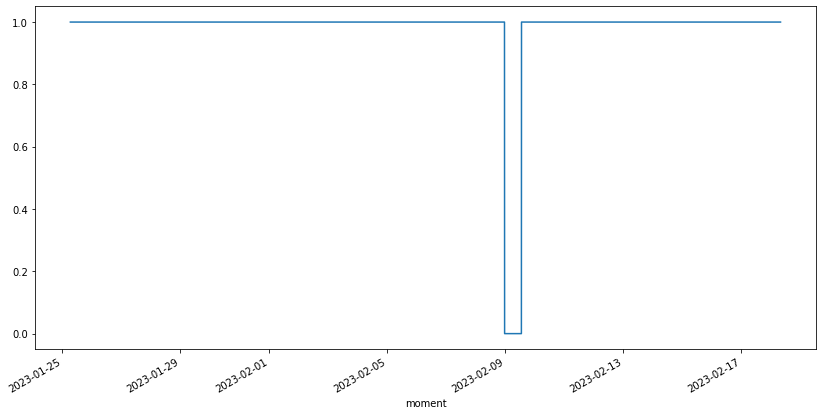

Уровень масла в маслосистеме эксгаустера №2


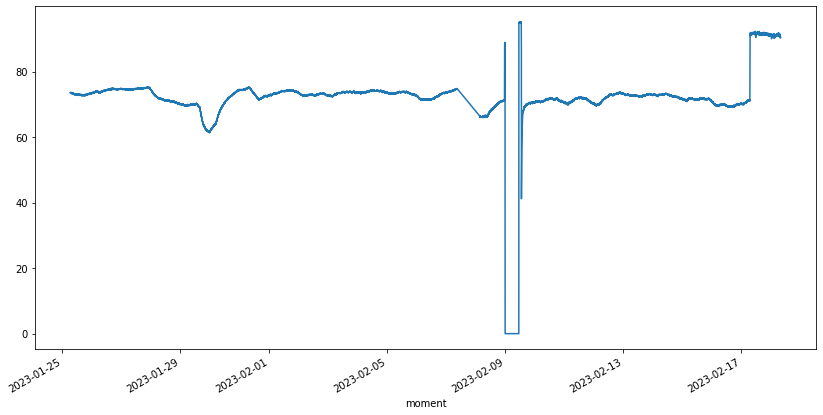

Давление масла в маслосистеме эксгаустера №2


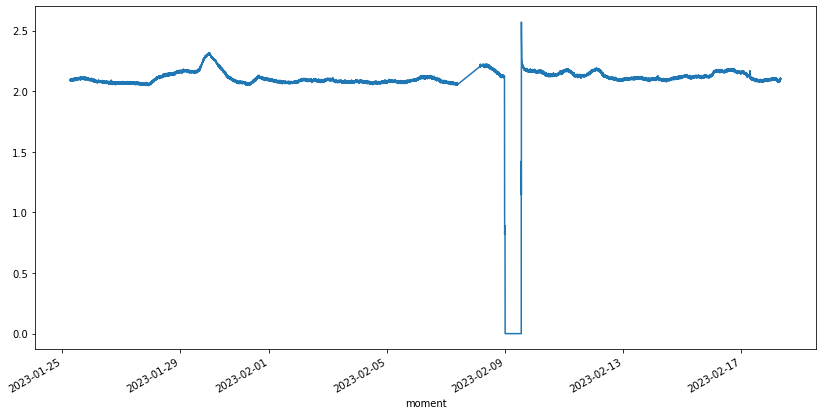

Ток статора эксгаустера №2


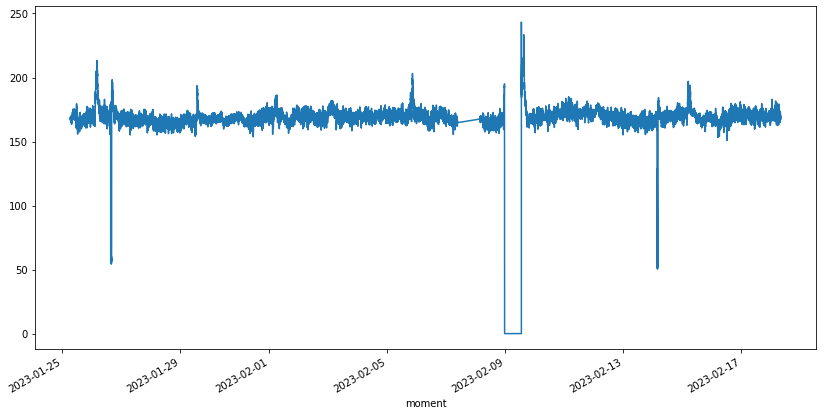

эксгаустер №2 в работе


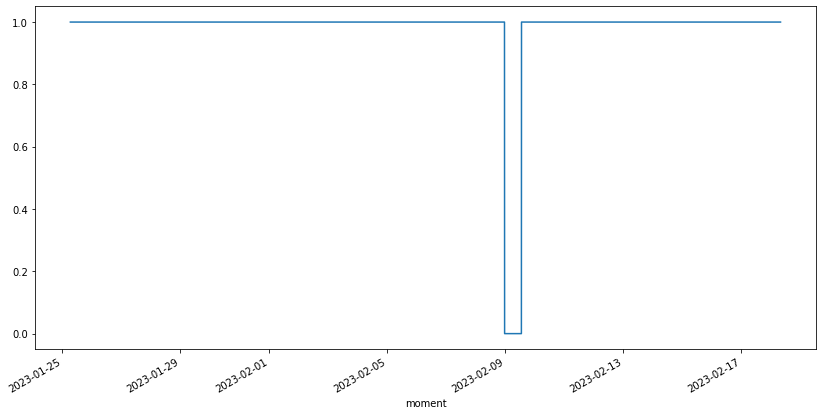

ЗАКРЫТО задвижка газ эксгаустер №2


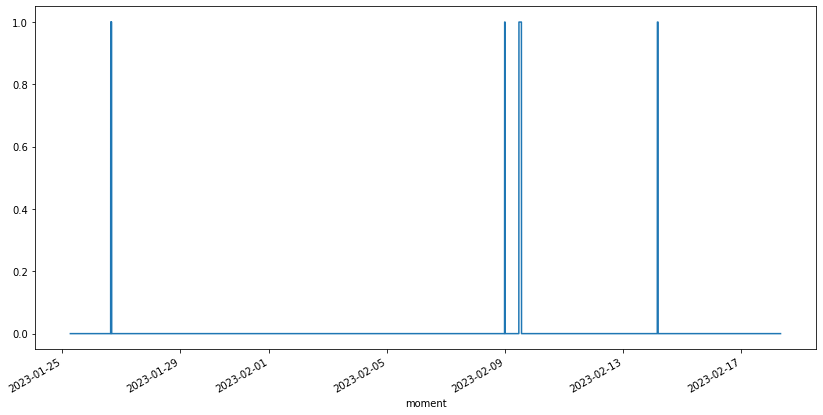

ОТКРЫТО задвижка газ эксгаустер №2


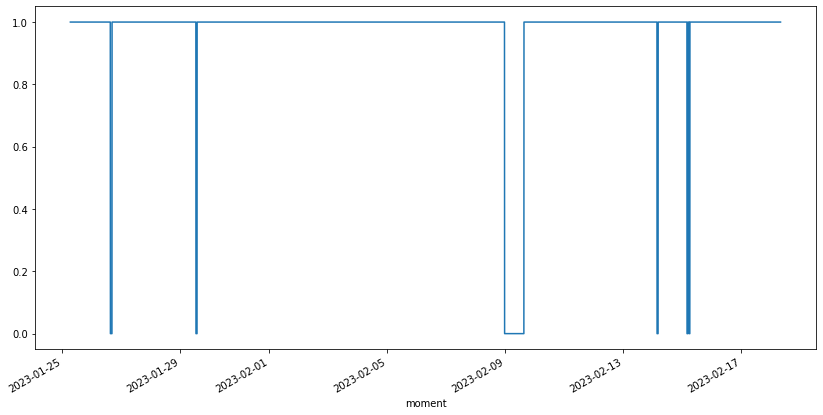

Запущен пусковой маслонасос эксгаустера №2


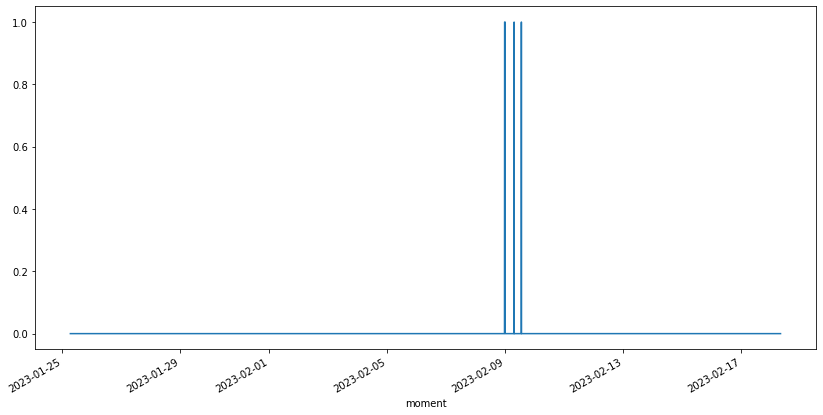

Запущен аварийный маслонасос эксгаустера №2


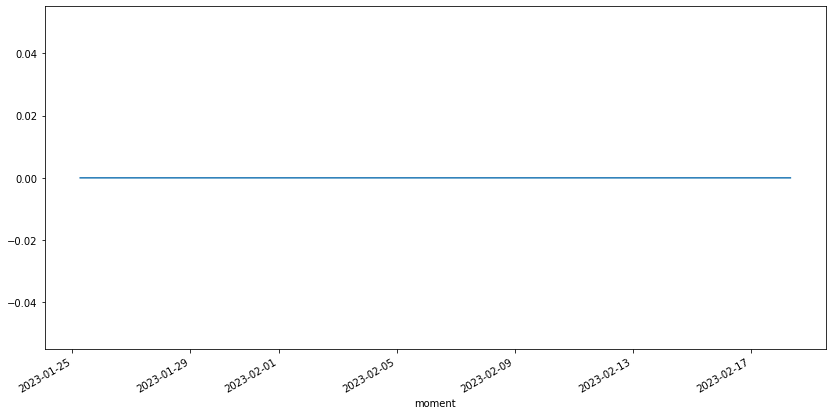

In [169]:
def all_graf(exg):
    for i in exg.columns:
            print(i)
            try:
                plt.figure(figsize=(14, 7))
                exg[i].plot()
                plt.show()
            except:
                pass
            
all_graf(exg_2)

In [170]:
exg_1.head()

Горизонтал вибрация подшипника №1. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          0.590278   
2023-01-25 06:33:25.125007                                          0.584491   
2023-01-25 06:34:25.125007                                          0.607639   
2023-01-25 06:35:25.125007                                          0.590278   
2023-01-25 06:36:25.125007                                          0.607639   

                            Вертикал вибрация подшипника №1. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007                                        0.283565   
2023-01-25 06:33:25.125007                                        0.283565   
2023-01-25 06:34:25.125007                                        0.271991   
2023-01-25 06:35:25.125007                                        0.283565   
2023-01-25 06:36:25.125007                                        0.271991   

                            Осевая вибрация подшипника №1. Эксгаустер №1  \
moment                                                                     
2023-01-25 06:32:25.125007                                      0.381944   
2023-01-25 06:33:25.125007                                      0.387731   
2023-01-25 06:34:25.125007                                      0.387731   
2023-01-25 06:35:25.125007                                      0.381944   
2023-01-25 06:36:25.125007                                      0.381944   

                            Горизонтал вибрация подшипника №2. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          0.760073   
2023-01-25 06:33:25.125007                                          0.772416   
2023-01-25 06:34:25.125007                                          0.768963   
2023-01-25 06:35:25.125007                                          0.766842   
2023-01-25 06:36:25.125007                                          0.779913   

                            Вертикал вибрация подшипника №2. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007                                        0.584491   
2023-01-25 06:33:25.125007                                        0.584491   
2023-01-25 06:34:25.125007                                        0.584491   
2023-01-25 06:35:25.125007                                        0.578704   
2023-01-25 06:36:25.125007                                        0.578704   

                            Осевая вибрация подшипника №2. Эксгаустер №1  \
moment                                                                     
2023-01-25 06:32:25.125007                                      0.231481   
2023-01-25 06:33:25.125007                                      0.214120   
2023-01-25 06:34:25.125007                                      0.225694   
2023-01-25 06:35:25.125007                                      0.231481   
2023-01-25 06:36:25.125007                                      0.225694   

                            Горизонтал вибрация подшипника №7. Эксгаустер №1  \
moment                                                                         
2023-01-25 06:32:25.125007                                          1.400463   
2023-01-25 06:33:25.125007                                          1.417824   
2023-01-25 06:34:25.125007                                          1.412037   
2023-01-25 06:35:25.125007                                          1.400463   
2023-01-25 06:36:25.125007                                          1.423611   

                            Вертикал вибрация подшипника №7. Эксгаустер №1  \
moment                                                                       
2023-01-25 06:32:25.125007   

Видим связь вибрации пошипников с поломкой.

Горизонтал вибрация подшипника №1. Эксгаустер №1


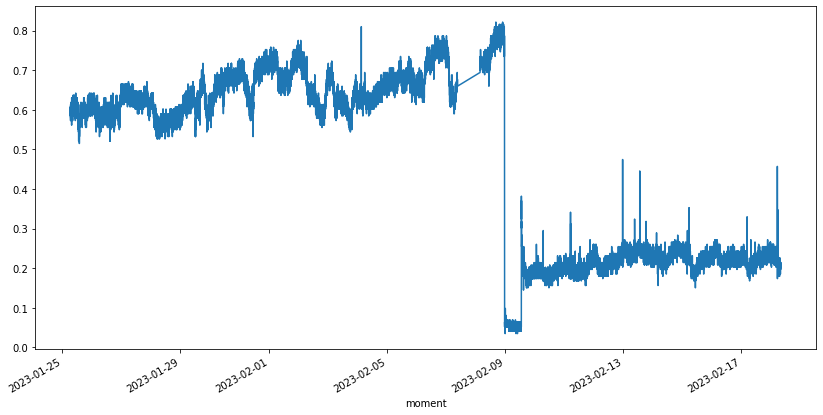

Вертикал вибрация подшипника №1. Эксгаустер №1


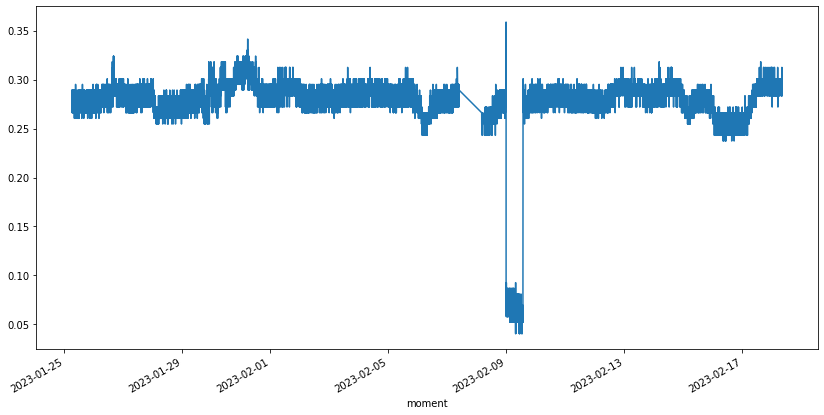

Осевая вибрация подшипника №1. Эксгаустер №1


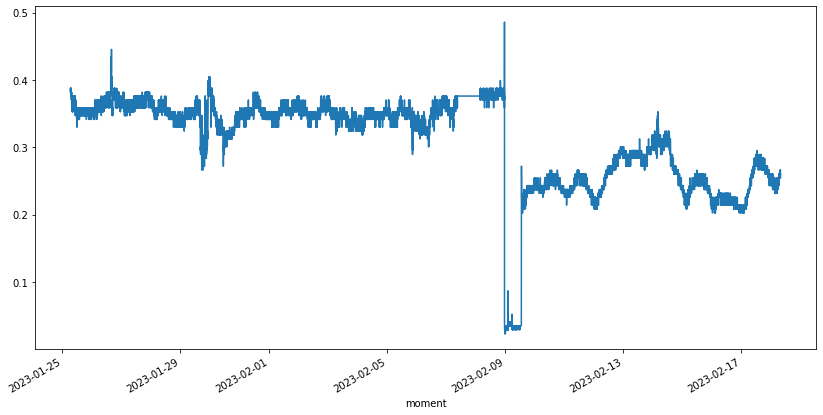

Горизонтал вибрация подшипника №2. Эксгаустер №1


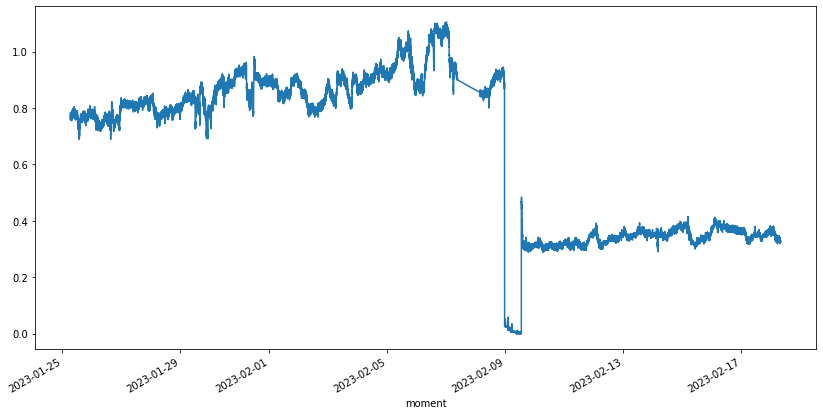

Вертикал вибрация подшипника №2. Эксгаустер №1


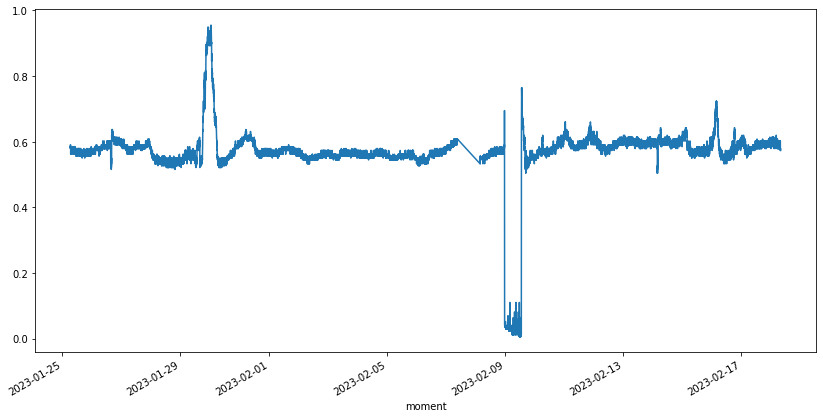

Осевая вибрация подшипника №2. Эксгаустер №1


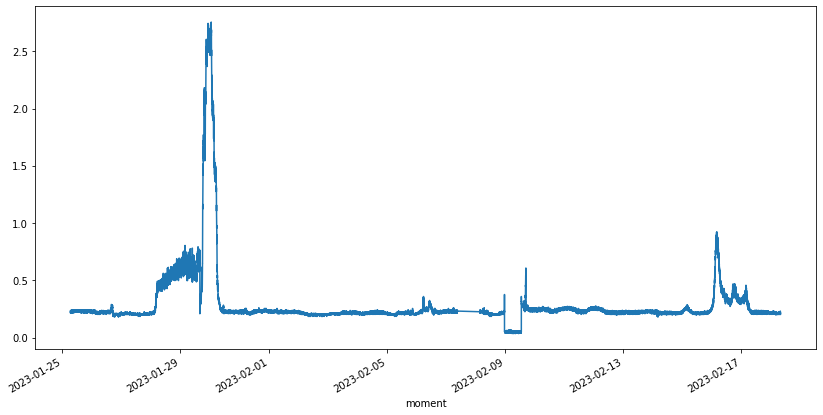

Горизонтал вибрация подшипника №7. Эксгаустер №1


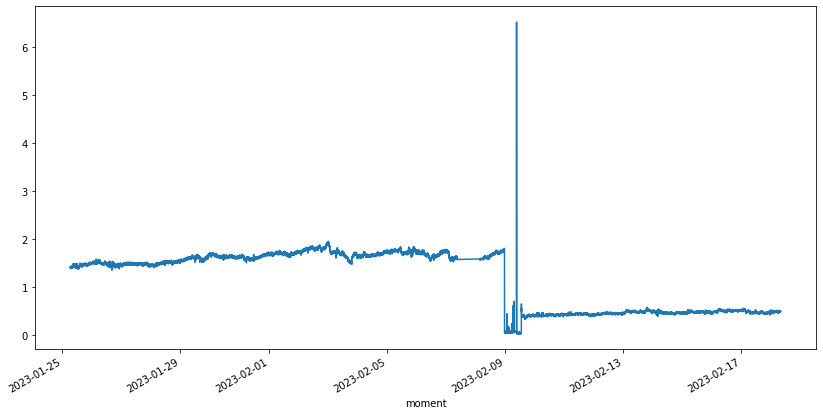

Вертикал вибрация подшипника №7. Эксгаустер №1


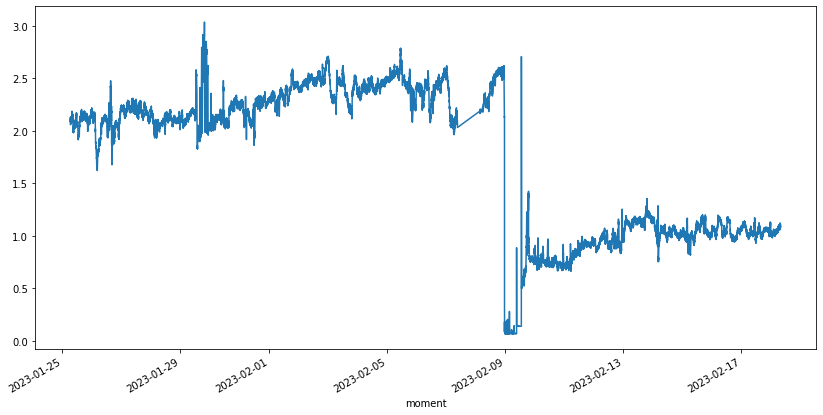

Осевая вибрация подшипника №7. Эксгаустер №1


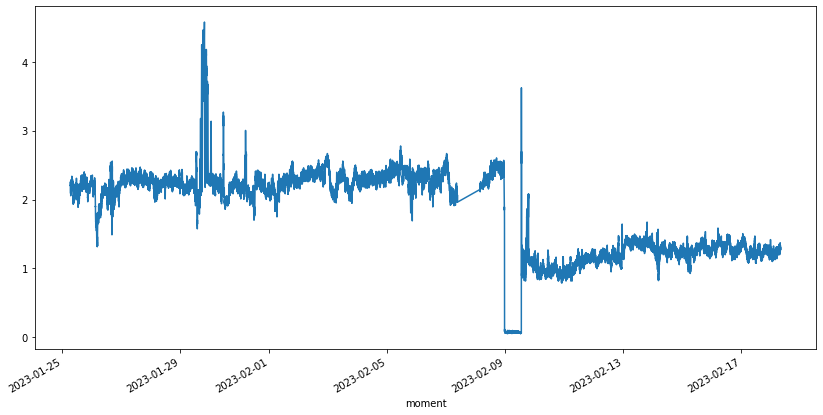

Горизонтал вибрация подшипника №8. Эксгаустер №1


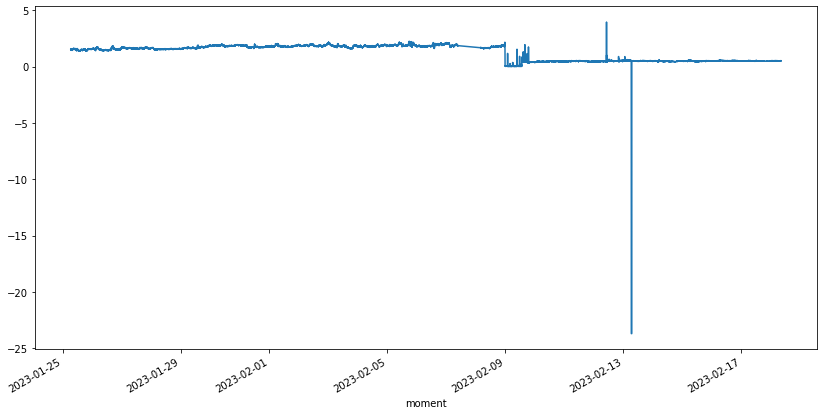

Вертикал вибрация подшипника №8. Эксгаустер №1


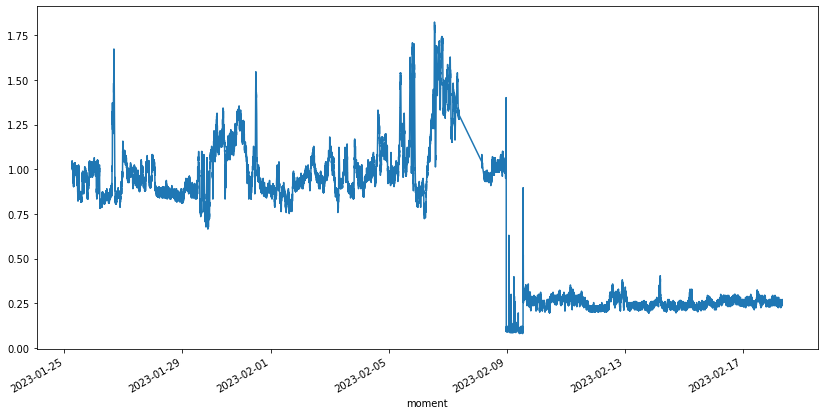

Осевая вибрация подшипника №8. Эксгаустер №1


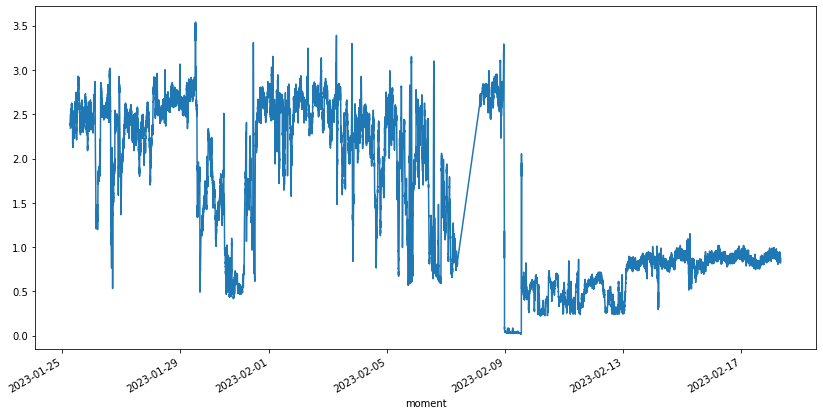

Температура нагрева подшипника №1 (ротора прив...


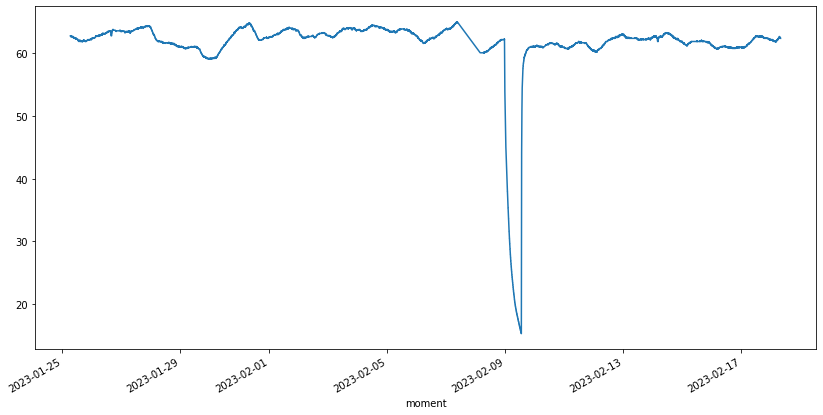

Температура нагрева подшипника №2 (ротора прив...


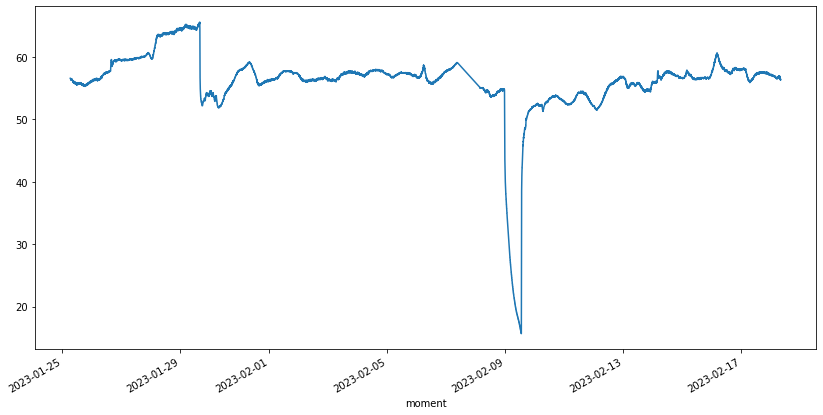

Температура нагрева подшипника №3 (редуктор эк...


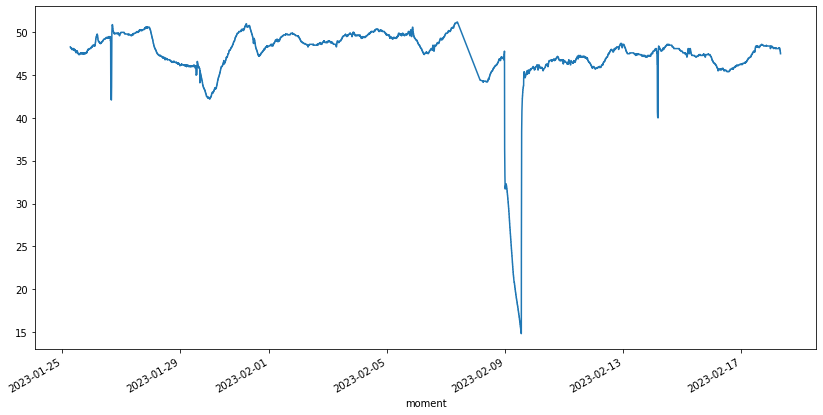

Температура нагрева подшипника №4 (редуктор эк...


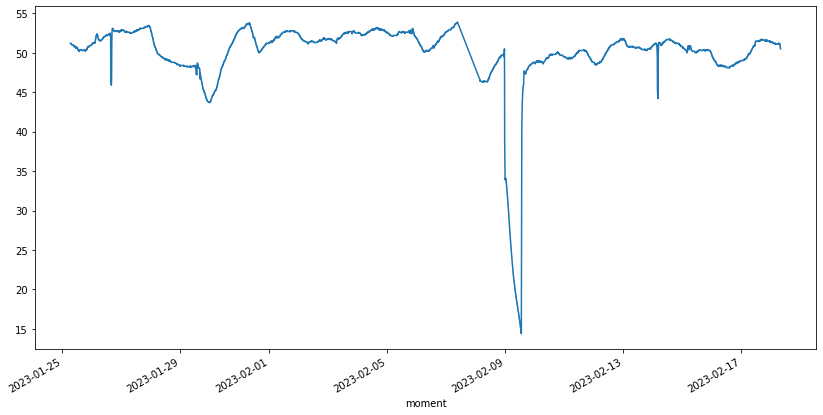

Температура нагрева подшипника №5 (редуктор эк...


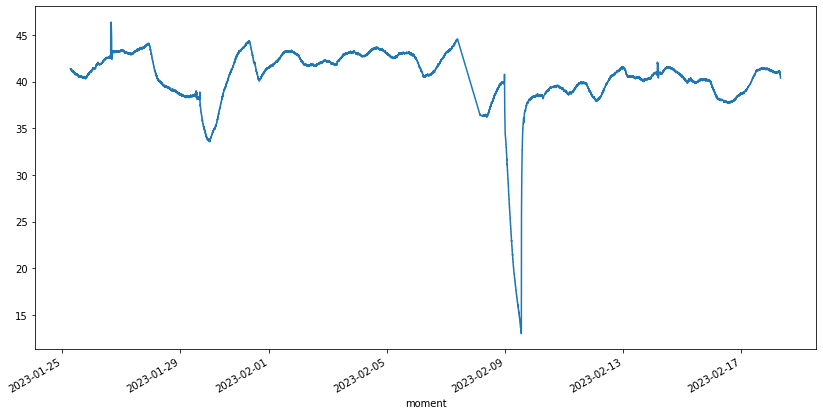

Температура нагрева подшипника №6 (редуктор эк...


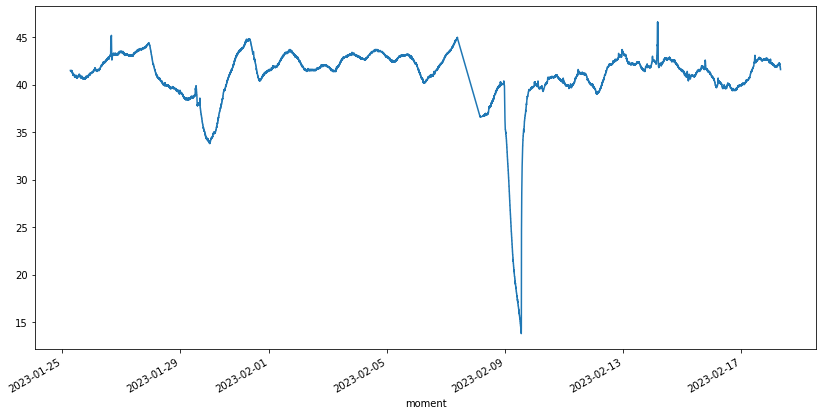

Температура нагрева подшипника №7 (ротор эксга...


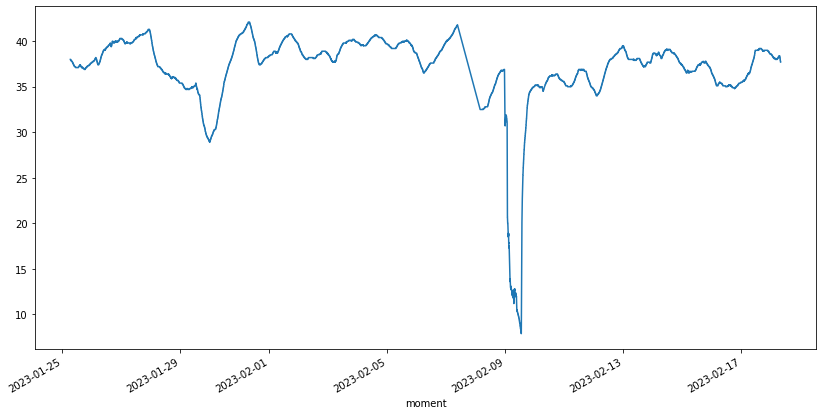

Температура нагрева подшипника №8 (ротор эксга...


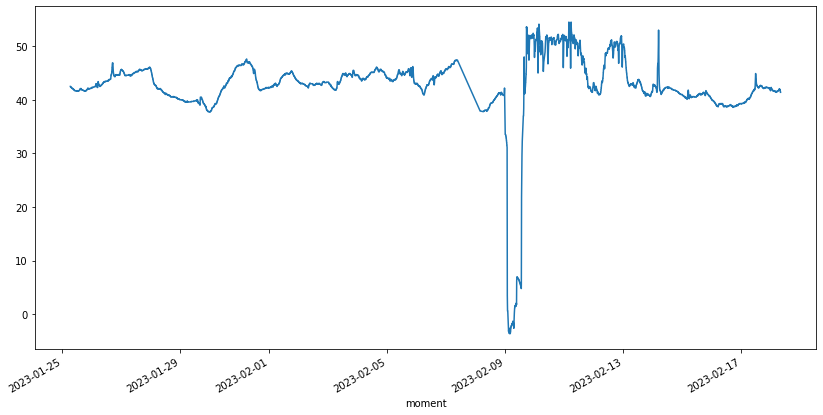

Температура нагрева подшипника №9 (ротор эксга...


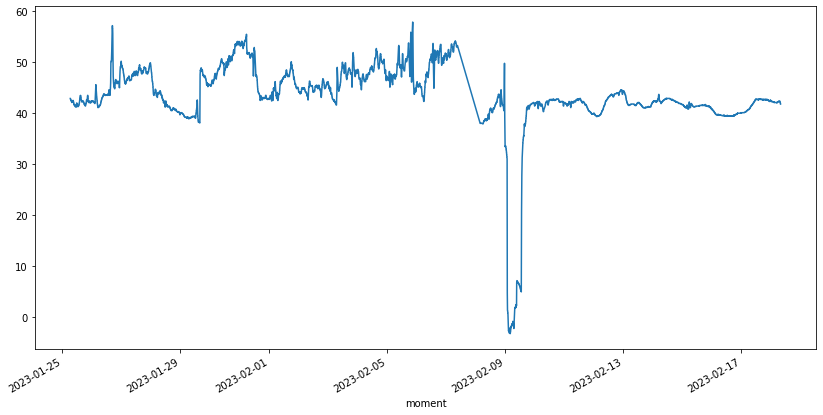

Горизонтал вибрация подшипника №1. Эксгаустер №2


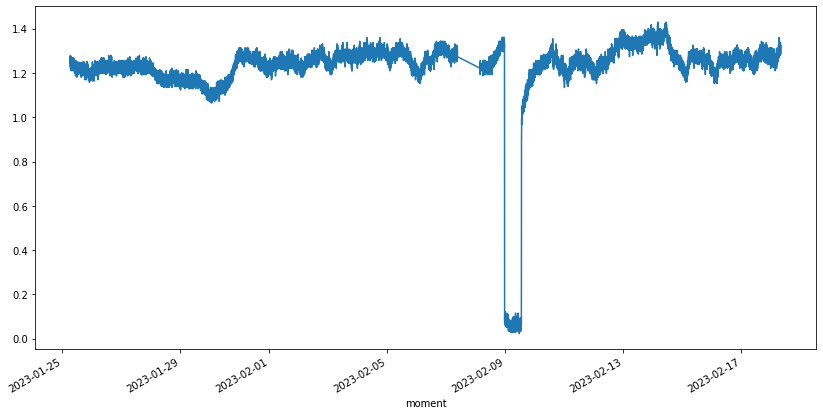

Вертикал вибрация подшипника №1. Эксгаустер №2


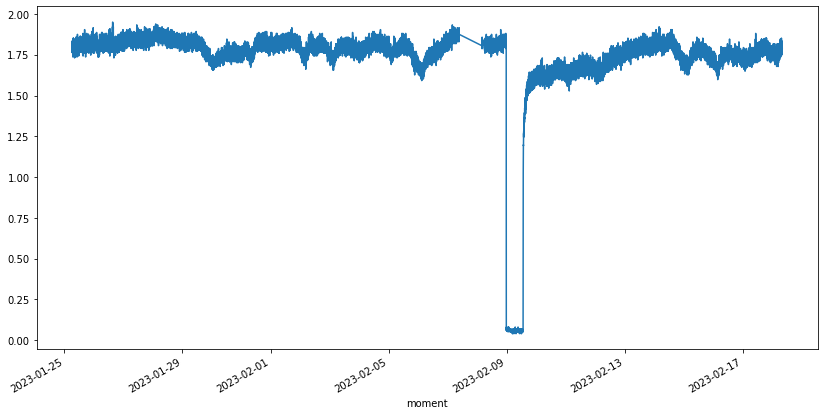

Осевая вибрация подшипника №1. Эксгаустер №2


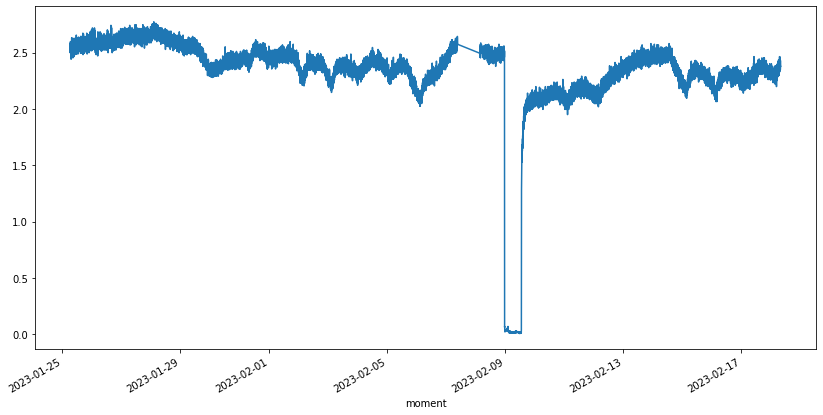

Горизонтал вибрация подшипника №2. Эксгаустер №2


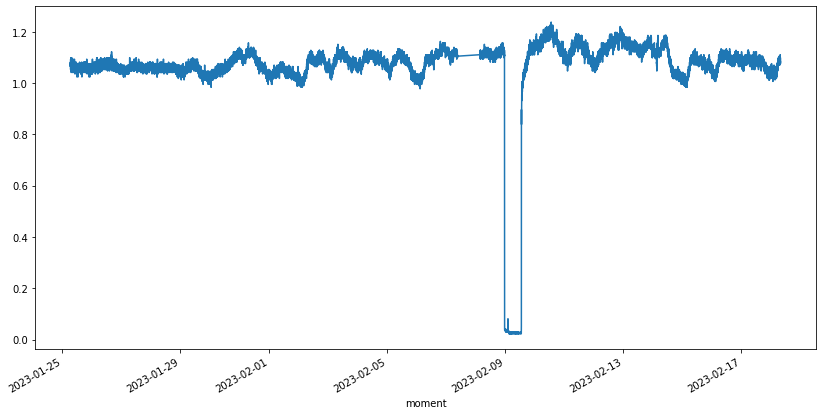

Вертикал вибрация подшипника №2. Эксгаустер №2


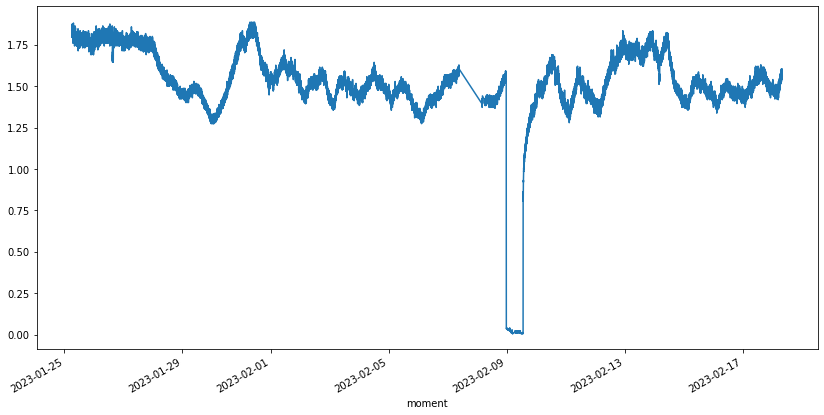

Осевая вибрация подшипника №2. Эксгаустер №2


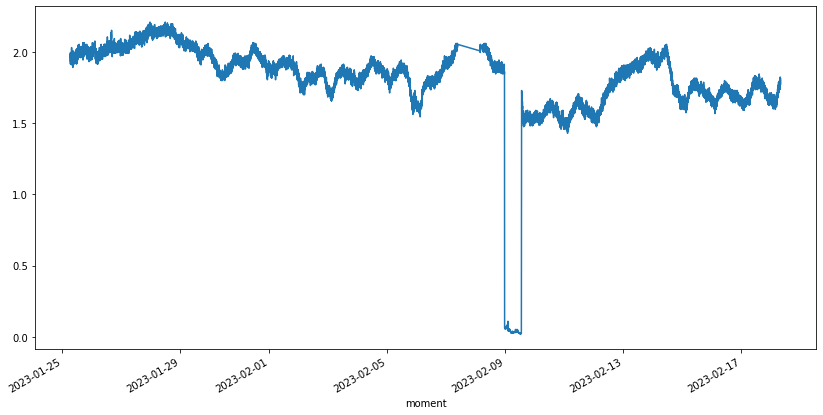

Горизонтал вибрация подшипника №7. Эксгаустер №2


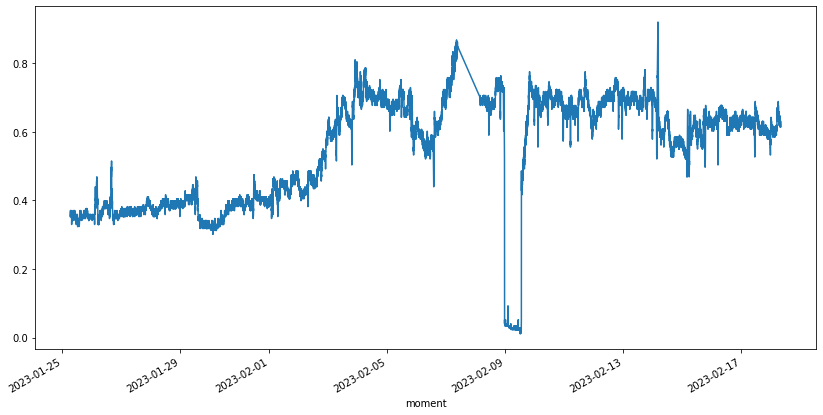

Вертикал вибрация подшипника №7. Эксгаустер №2


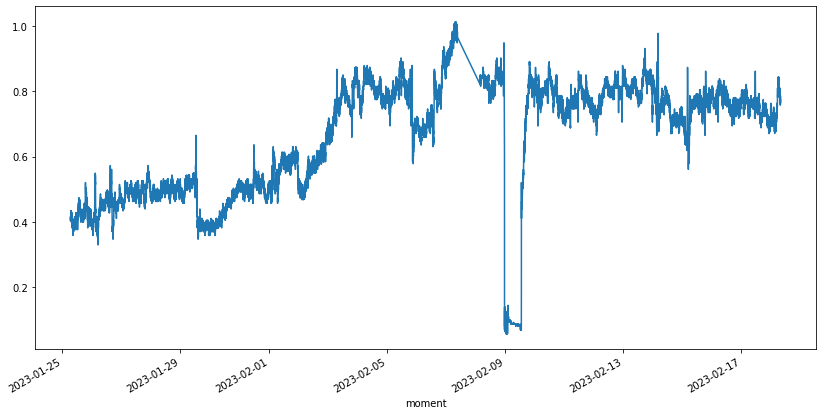

Осевая вибрация подшипника №7. Эксгаустер №2


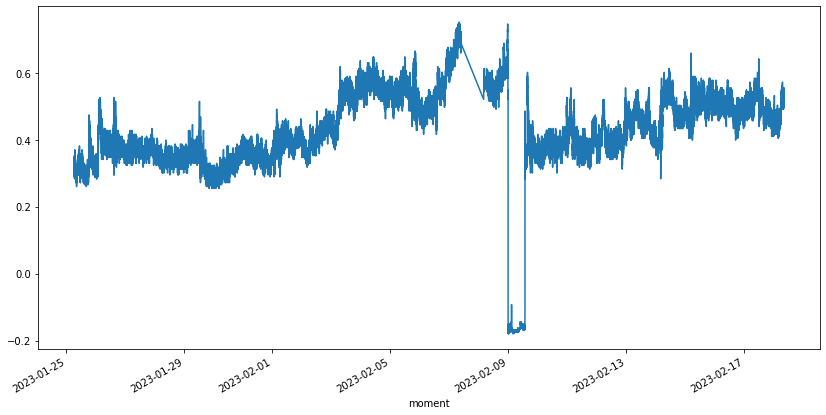

Горизонтал вибрация подшипника №8. Эксгаустер №2


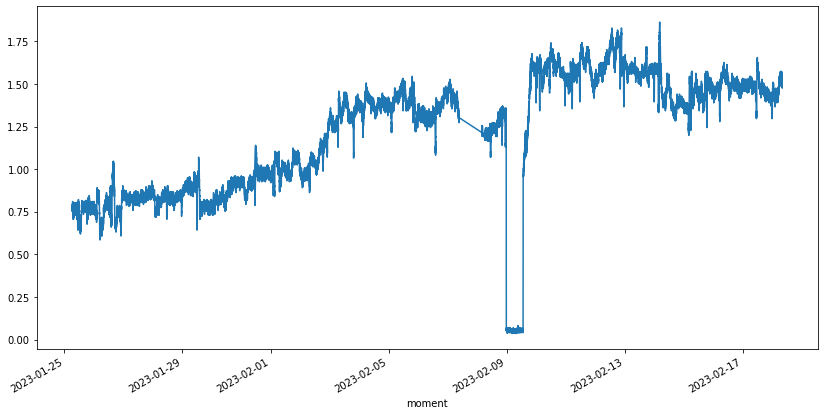

Вертикал вибрация подшипника №8. Эксгаустер №2


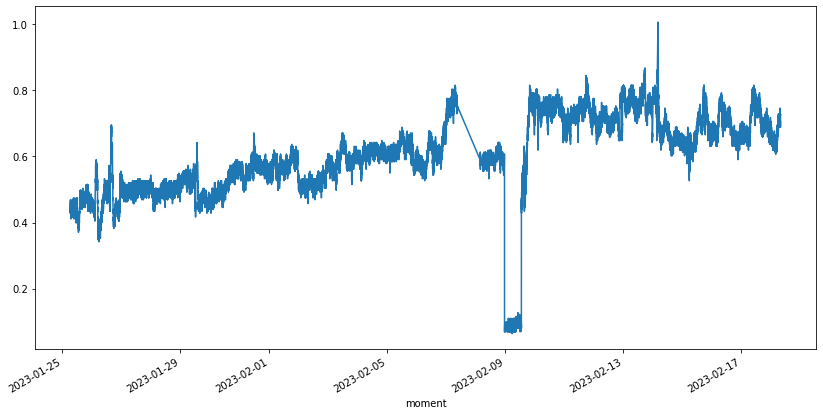

Осевая вибрация подшипника №8. Эксгаустер №2


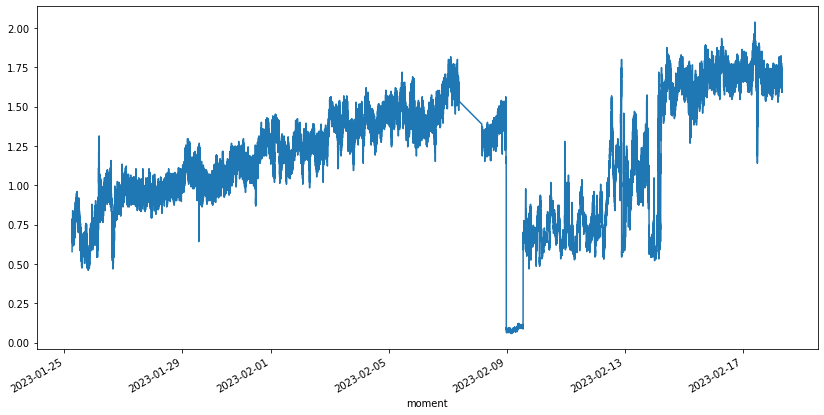

Температура нагрева подшипника №1 (ротора прив...


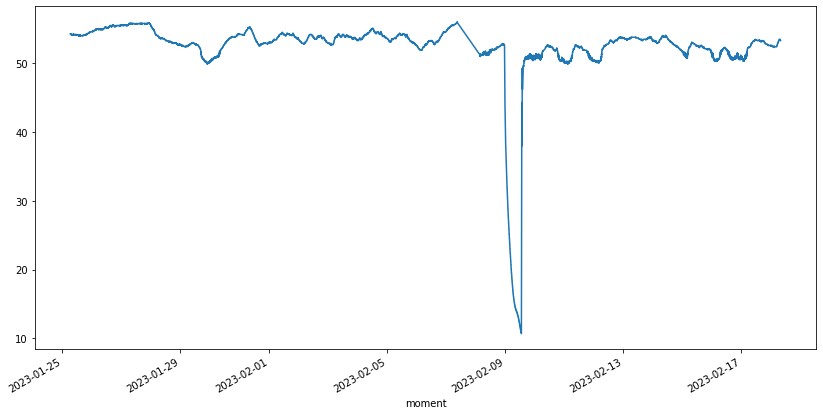

Температура нагрева подшипника №2 (ротора прив...


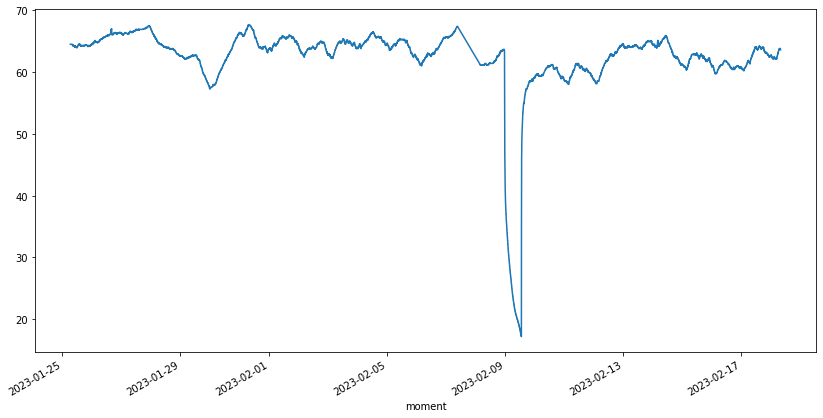

Температура нагрева подшипника №3 (редуктор эк...


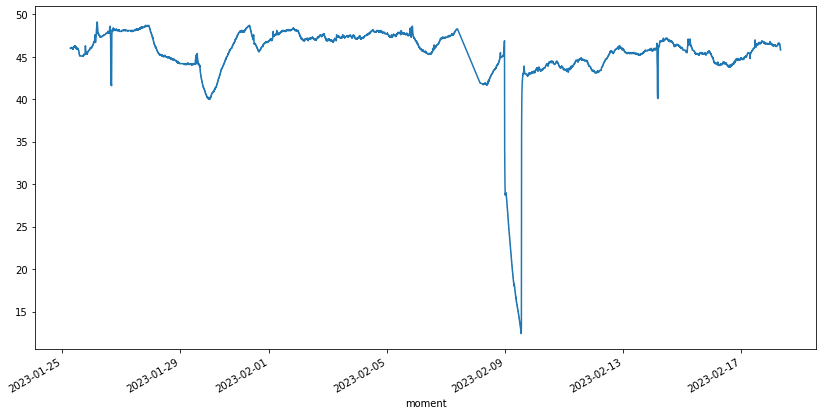

Температура нагрева подшипника №4 (редуктор эк...


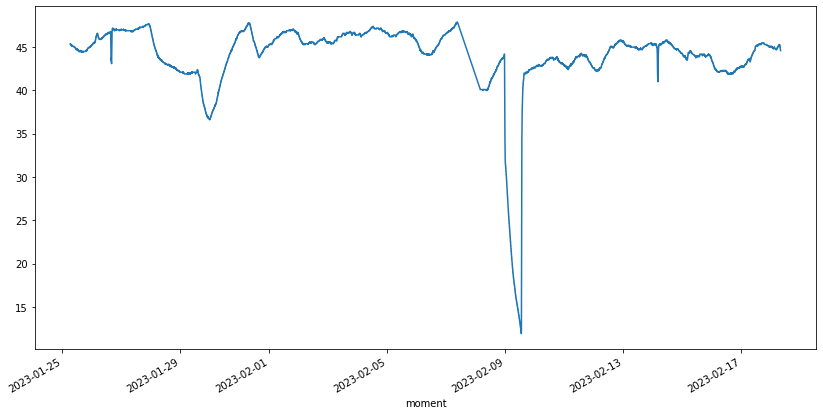

Температура нагрева подшипника №5 (редуктор эк...


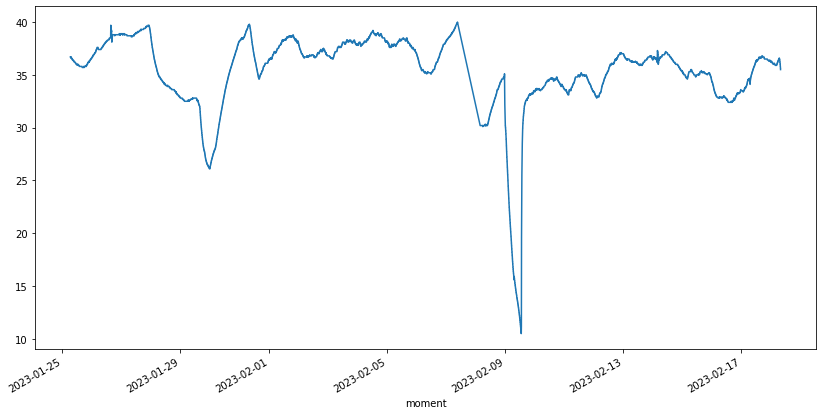

Температура нагрева подшипника №6 (редуктор эк...


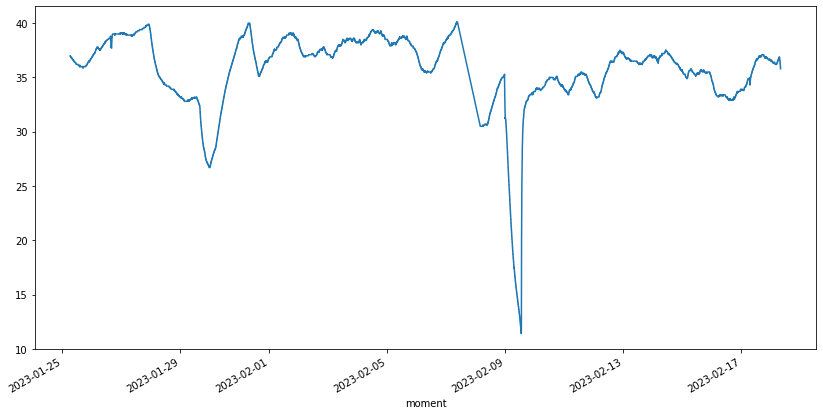

Температура нагрева подшипника №7 (ротор эксга...


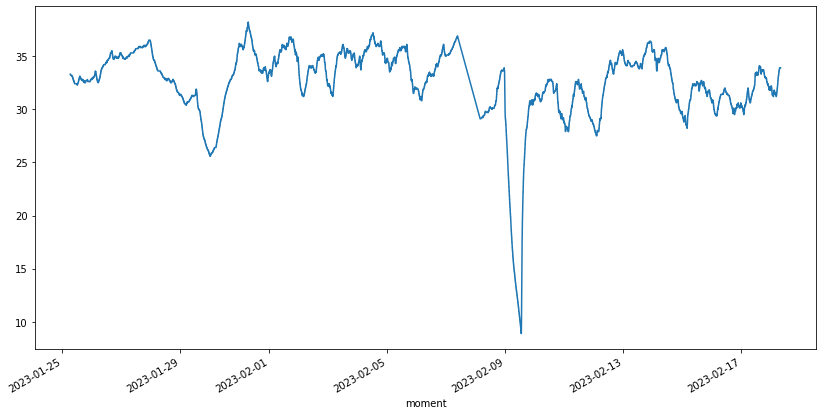

Температура нагрева подшипника №8 (ротор эксга...


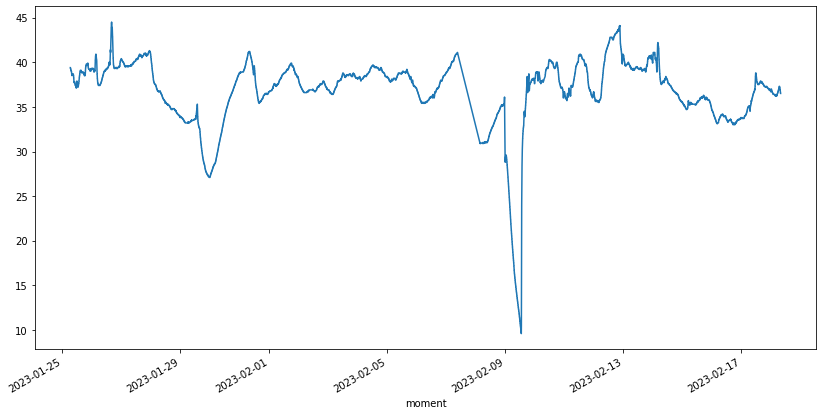

Температура нагрева подшипника №9 (ротор эксга...


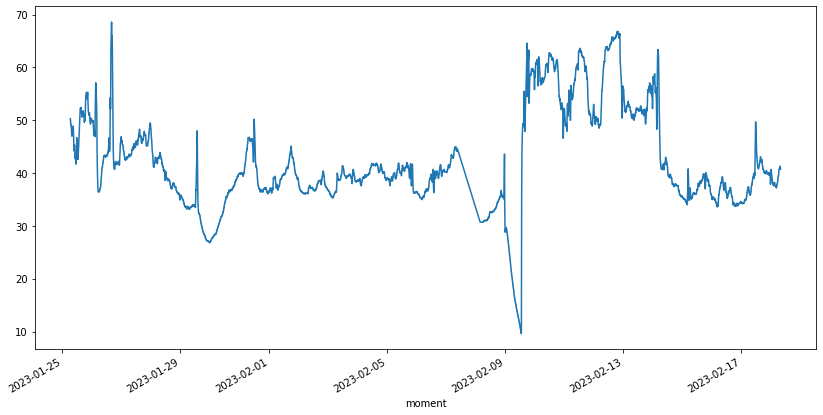

Горизонтал вибрация подшипника №1. Эксгаустер №3


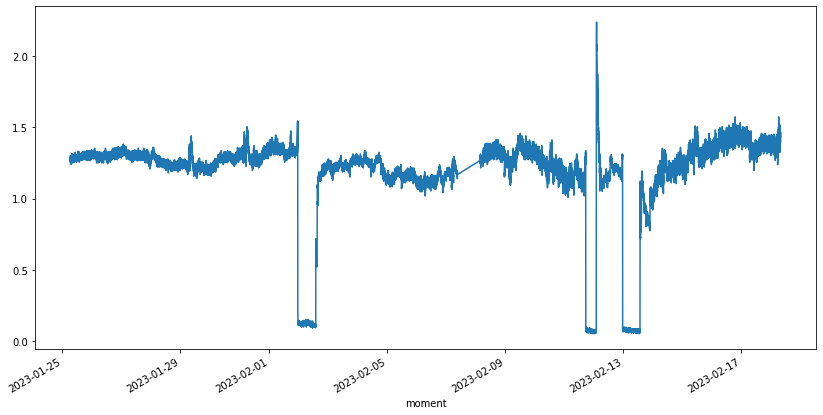

Вертикал вибрация подшипника №1. Эксгаустер №3


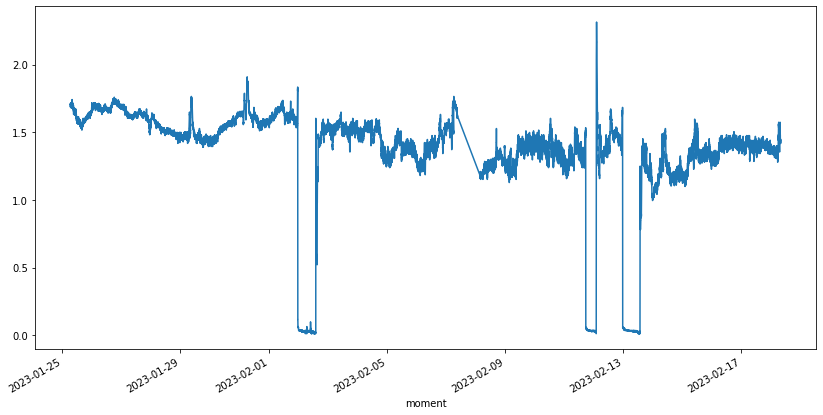

Осевая вибрация подшипника №1. Эксгаустер №3


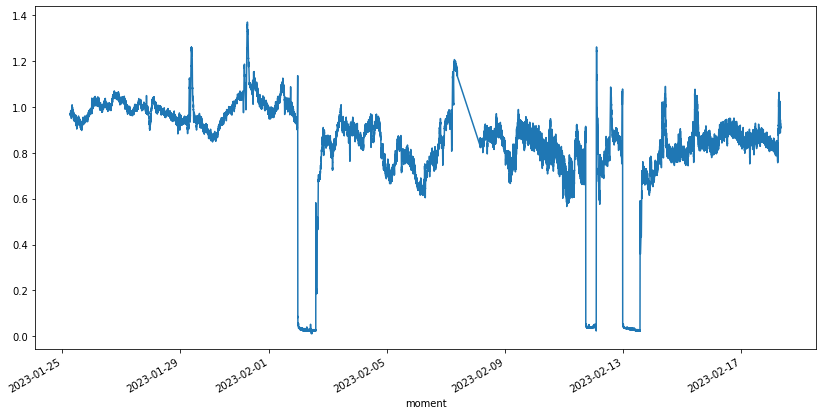

Горизонтал вибрация подшипника №2. Эксгаустер №3


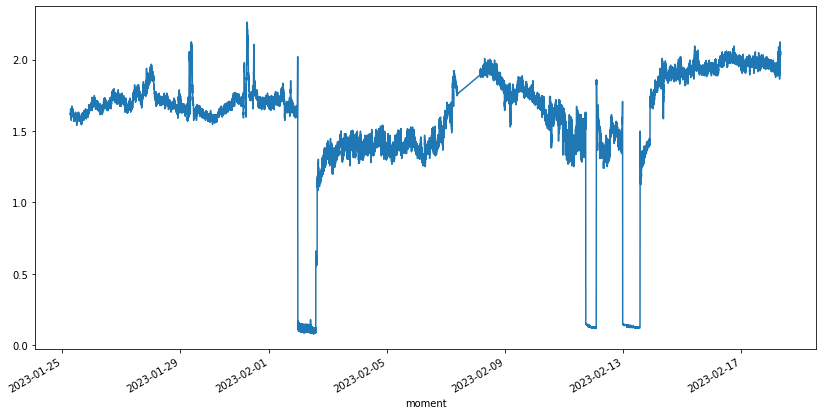

Вертикал вибрация подшипника №2. Эксгаустер №3


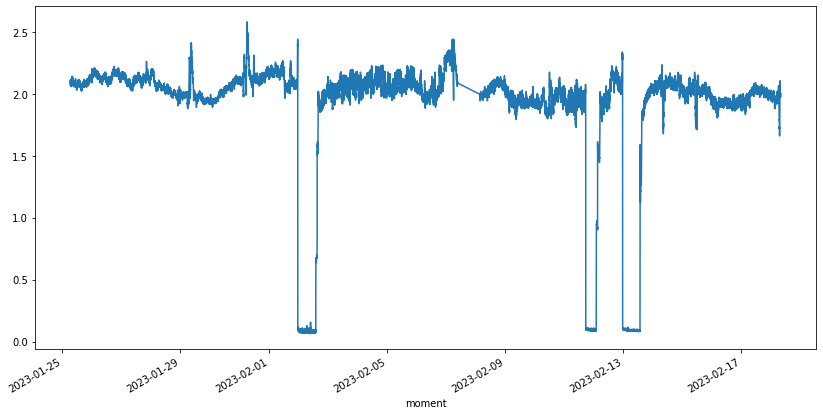

Осевая вибрация подшипника №2. Эксгаустер №3


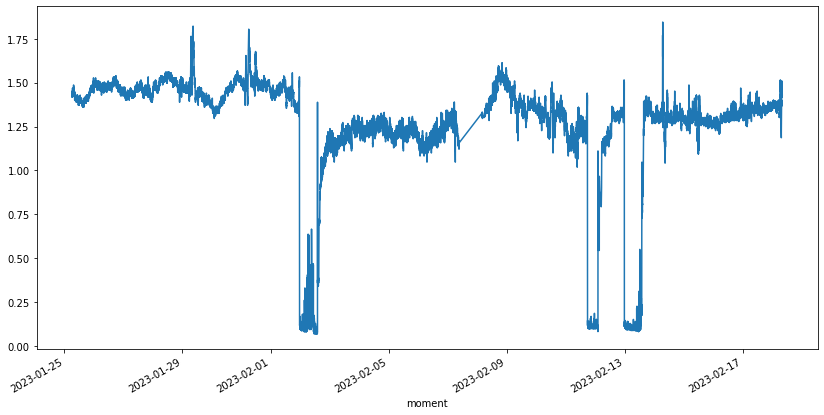

Горизонтал вибрация подшипника №7. Эксгаустер №3


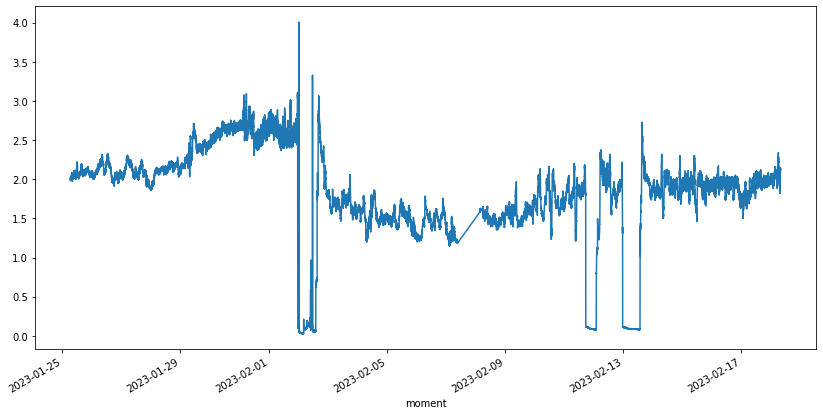

Вертикал вибрация подшипника №7. Эксгаустер №3


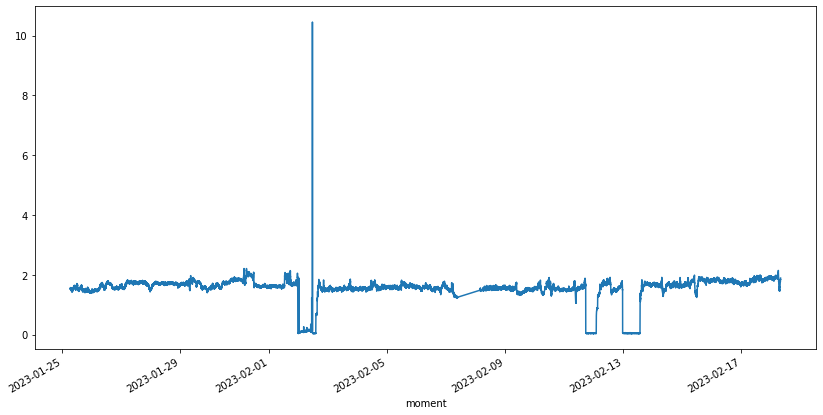

Осевая вибрация подшипника №7. Эксгаустер №3


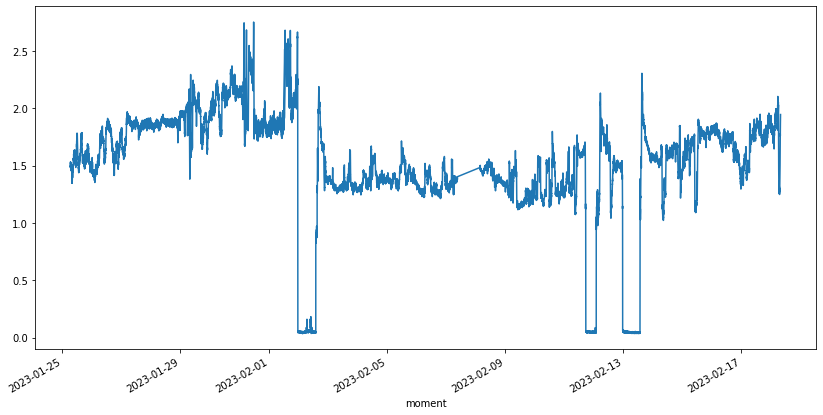

Горизонтал вибрация подшипника №8. Эксгаустер №3


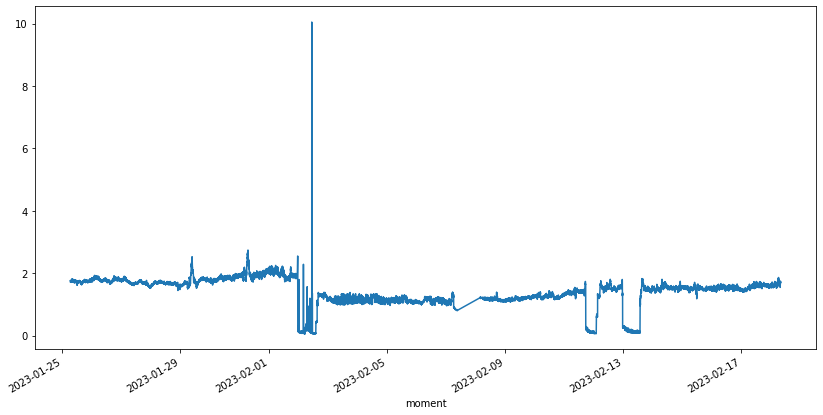

Вертикал вибрация подшипника №8. Эксгаустер №3


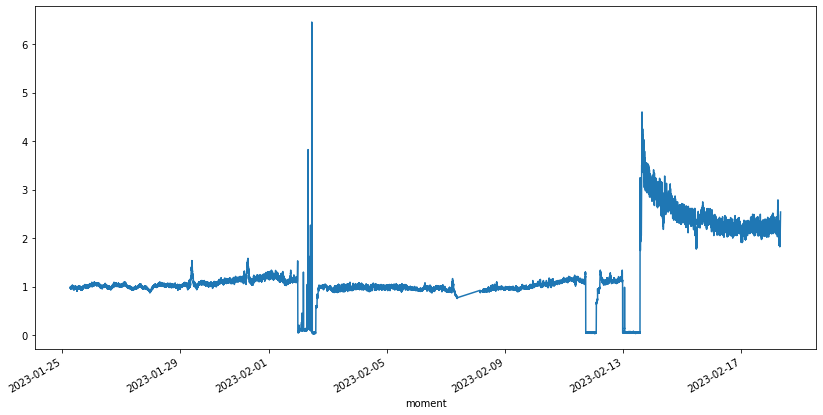

Осевая вибрация подшипника №8. Эксгаустер №3


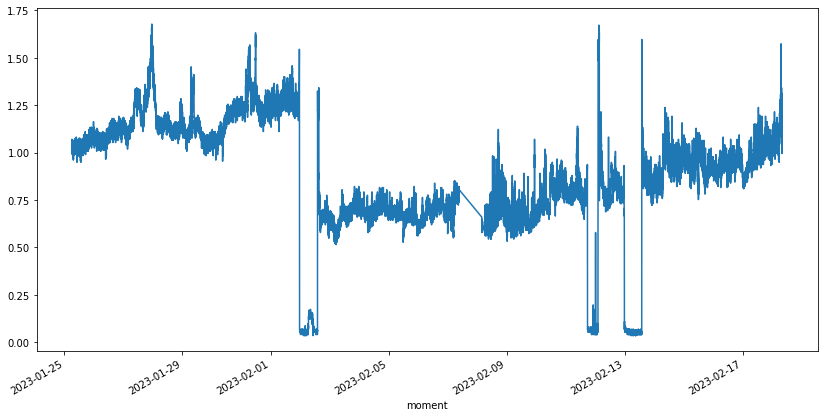

Температура нагрева подшипника №1 (ротора прив...


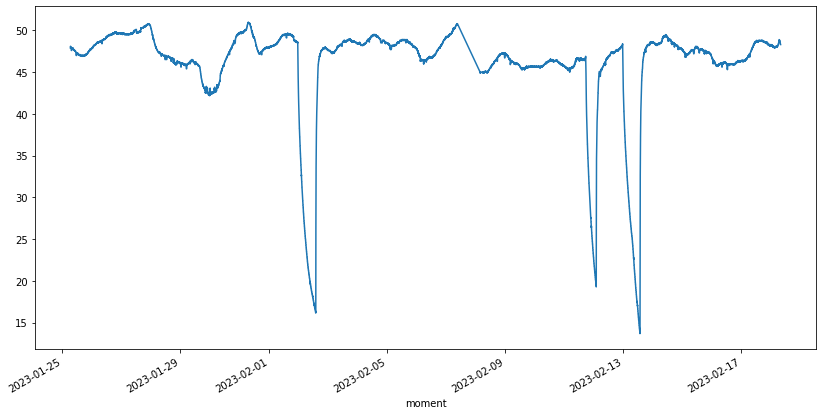

Температура нагрева подшипника №2 (ротора прив...


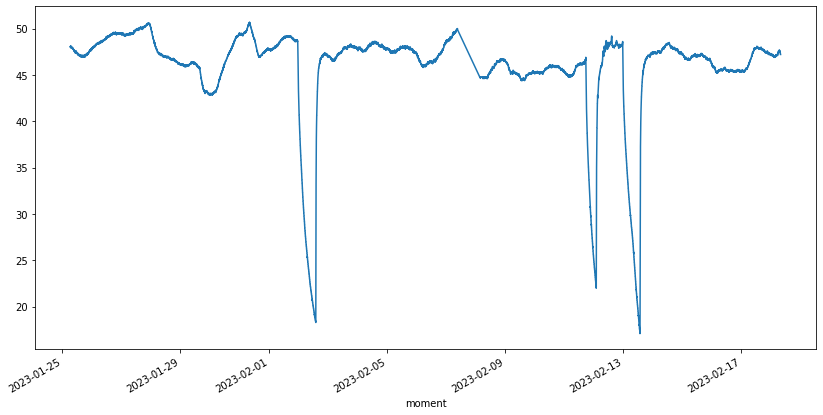

Температура нагрева подшипника №3 (редуктор эк...


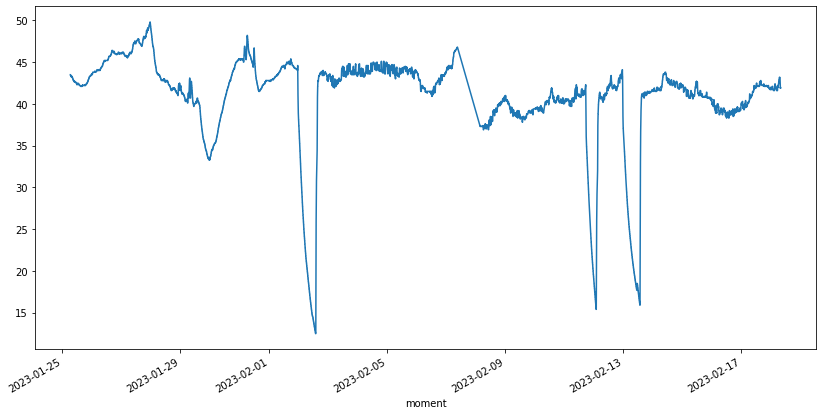

Температура нагрева подшипника №4 (редуктор эк...


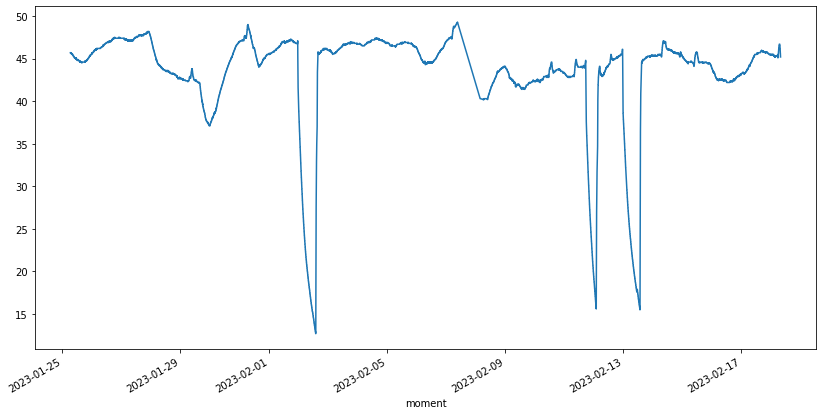

Температура нагрева подшипника №5 (редуктор эк...


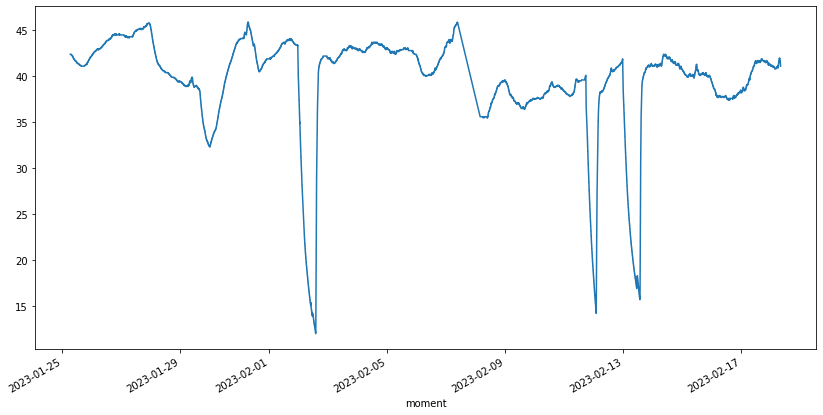

Температура нагрева подшипника №6 (редуктор эк...


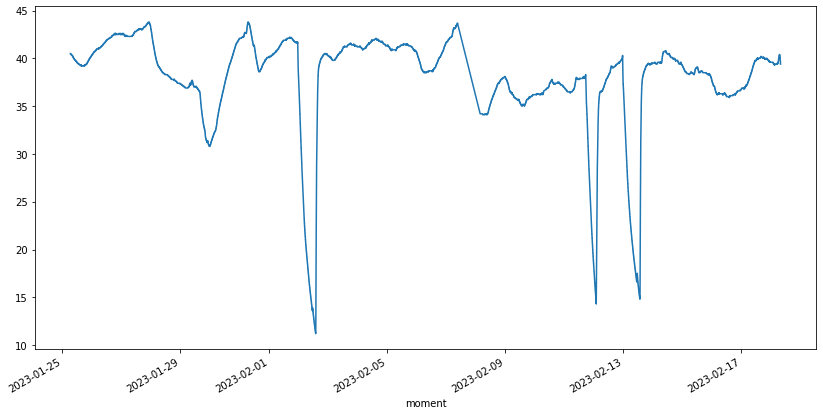

Температура нагрева подшипника №7 (ротор эксга...


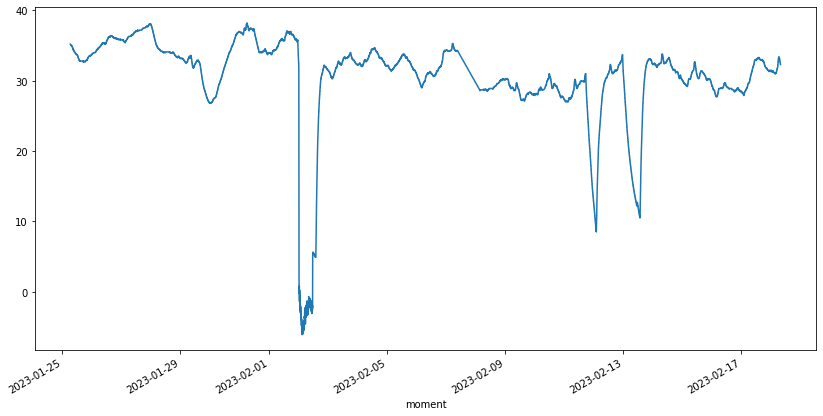

Температура нагрева подшипника №8 (ротор эксга...


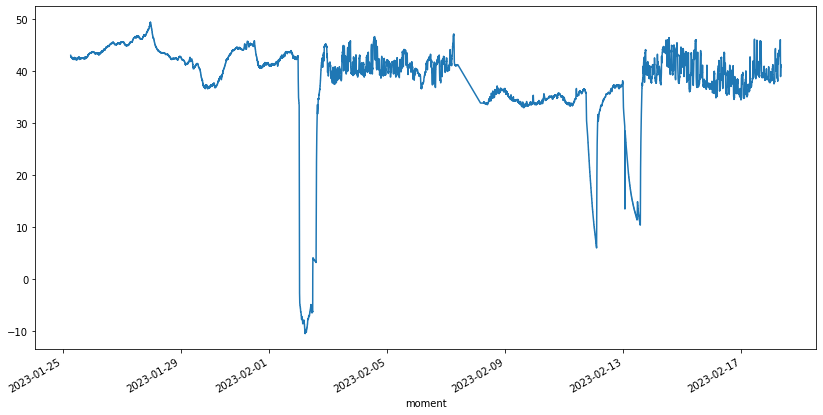

Температура нагрева подшипника №9 (ротор эксга...


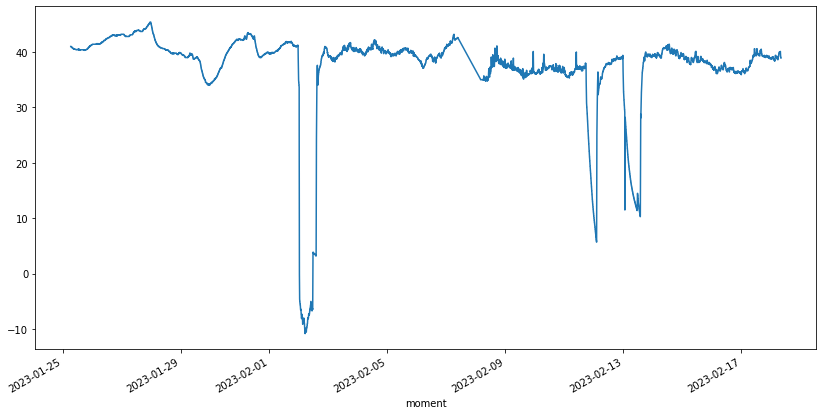

Горизонтал вибрация подшипника №1. Эксгаустер №4


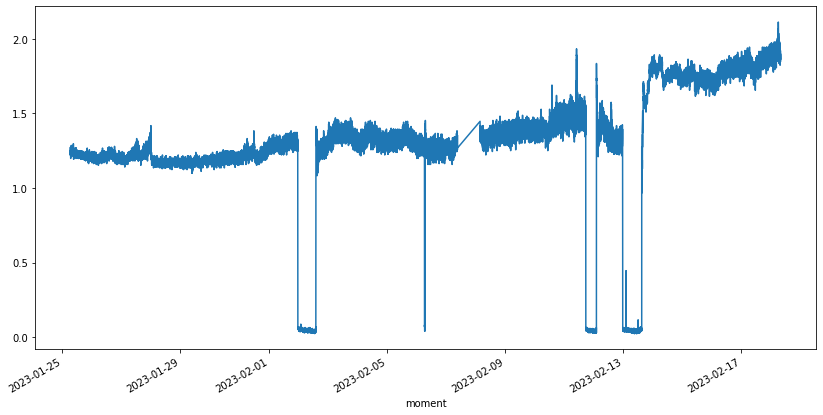

Вертикал вибрация подшипника №1. Эксгаустер №4


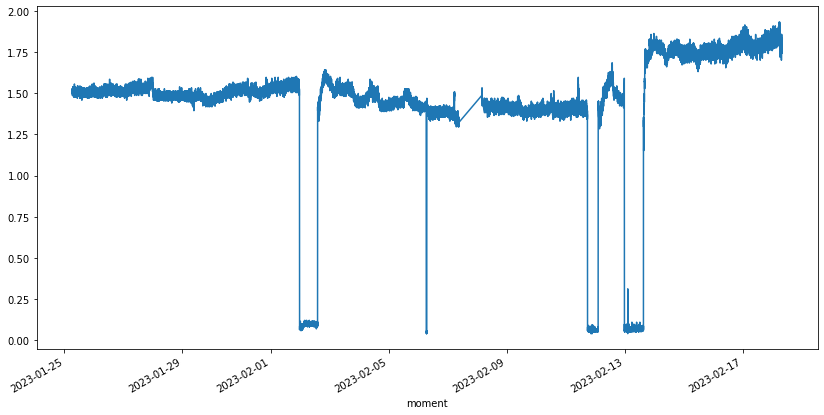

Осевая вибрация подшипника №1. Эксгаустер №4


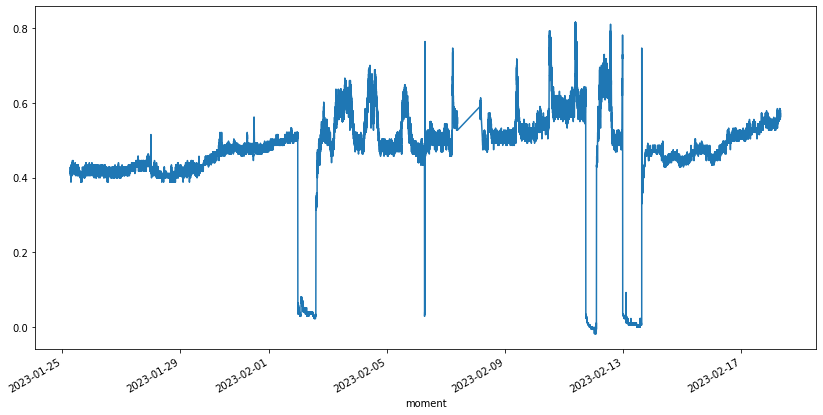

Горизонтал вибрация подшипника №2. Эксгаустер №4


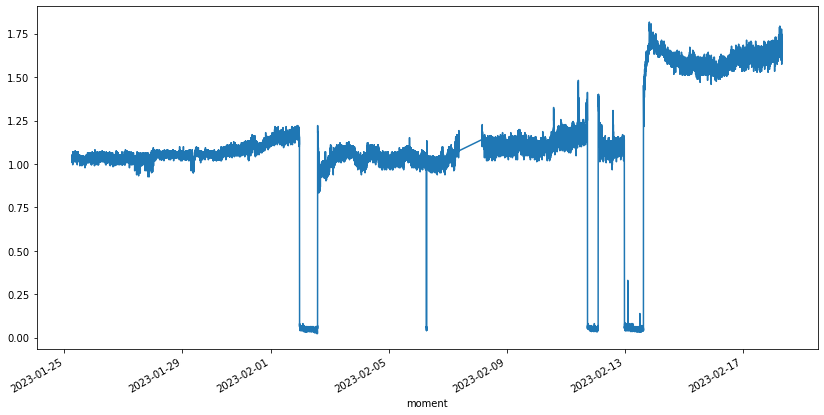

Вертикал вибрация подшипника №2. Эксгаустер №4


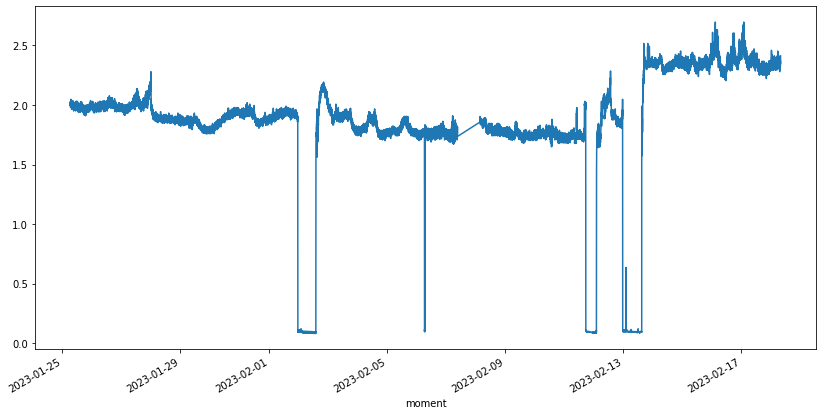

Осевая вибрация подшипника №2. Эксгаустер №4


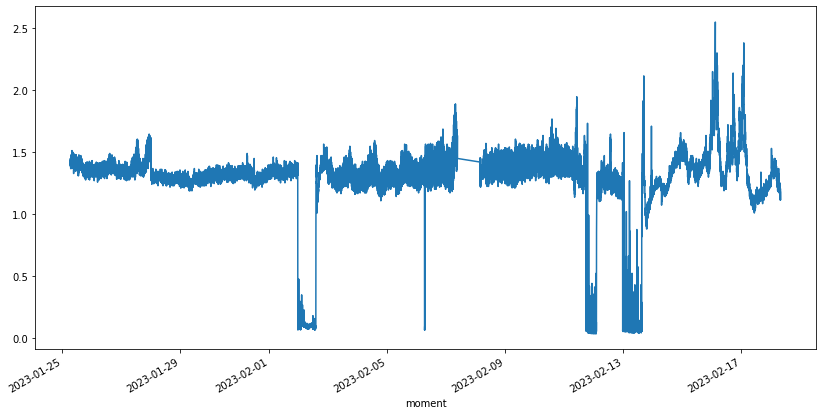

Горизонтал вибрация подшипника №7. Эксгаустер №4


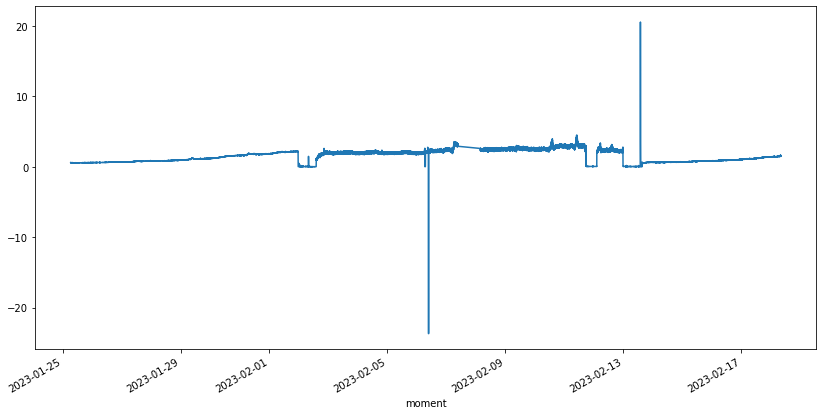

Вертикал вибрация подшипника №7. Эксгаустер №4


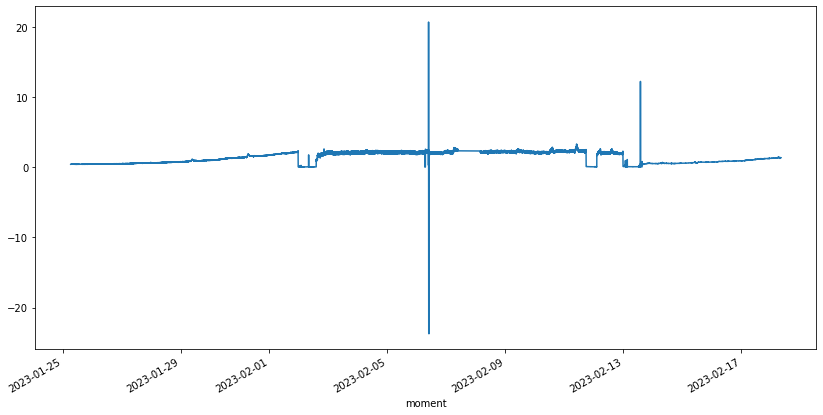

Осевая вибрация подшипника №7. Эксгаустер №4


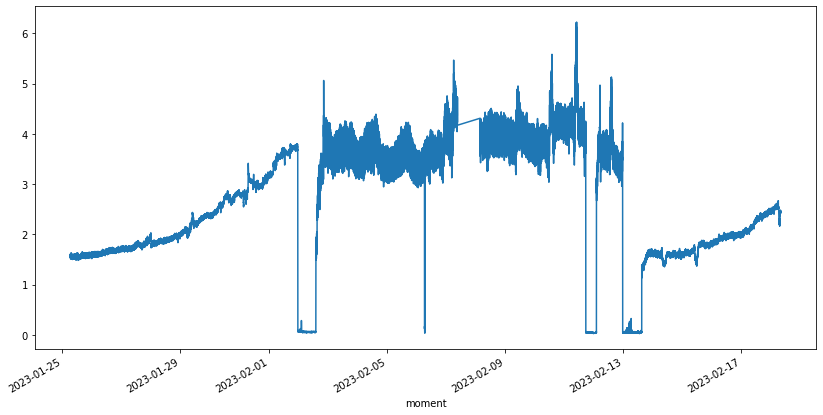

Горизонтал вибрация подшипника №8. Эксгаустер №4


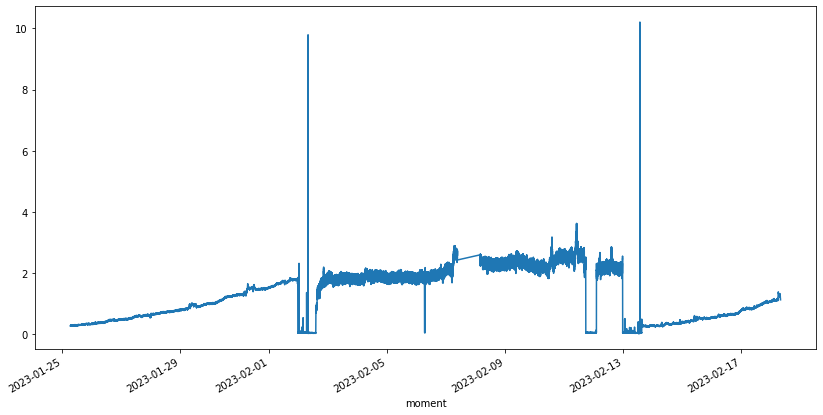

Вертикал вибрация подшипника №8. Эксгаустер №4


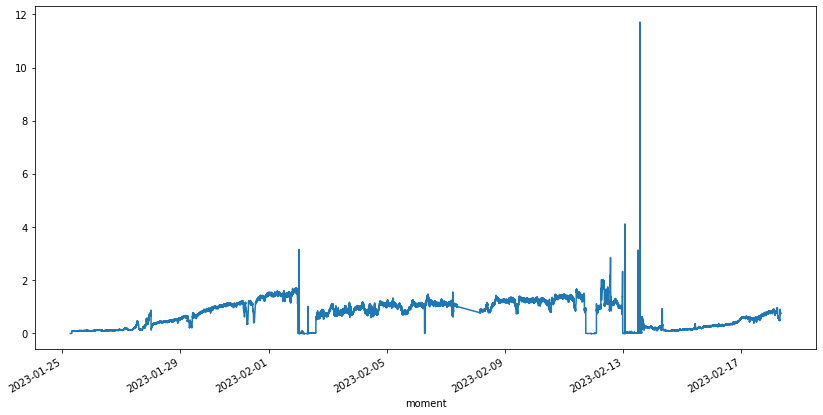

Осевая вибрация подшипника №8. Эксгаустер №4


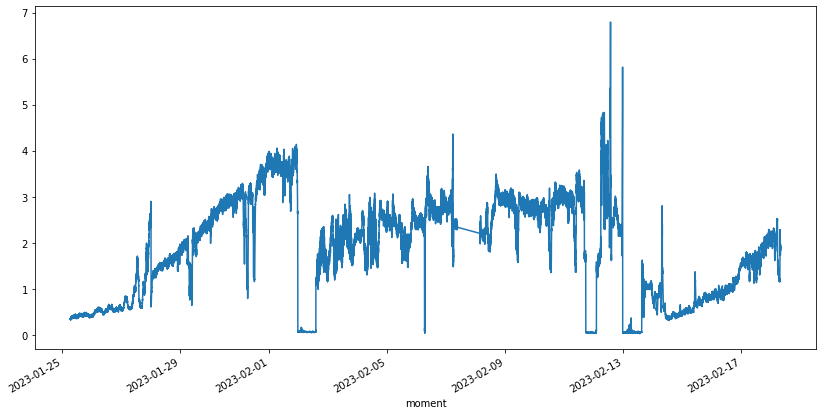

Температура нагрева подшипника №1 (ротора прив...


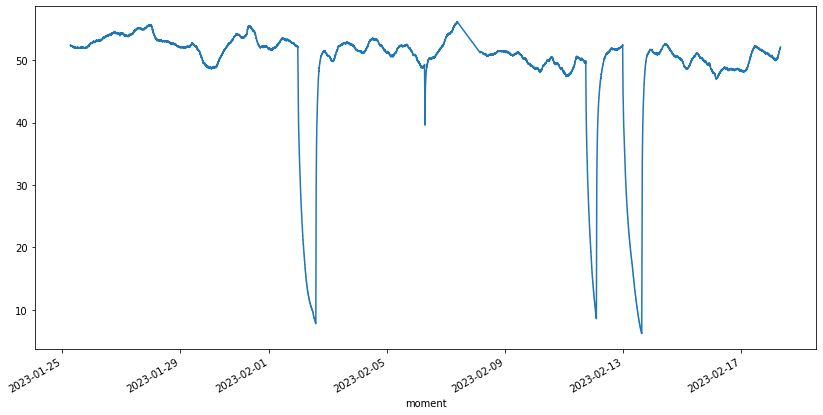

Температура нагрева подшипника №2 (ротора прив...


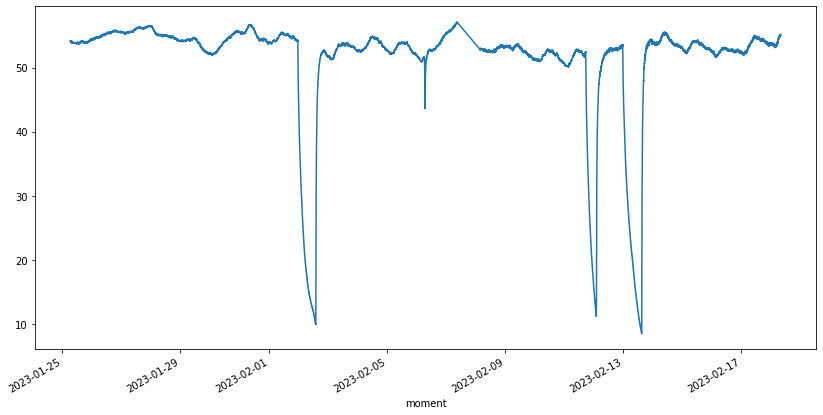

Температура нагрева подшипника №3 (редуктор эк...


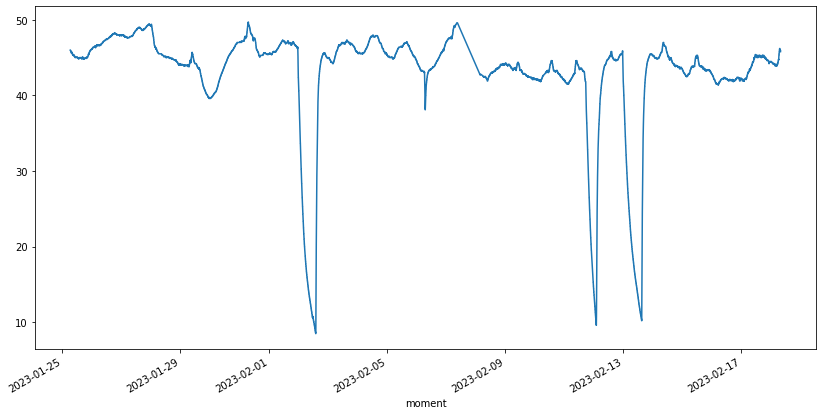

Температура нагрева подшипника №4 (редуктор эк...


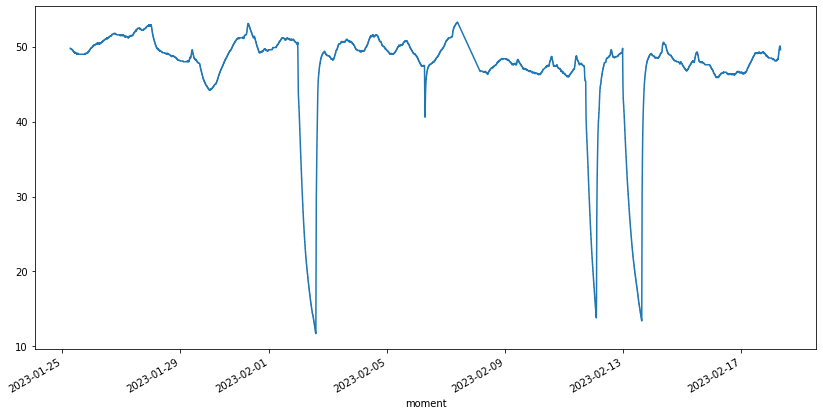

Температура нагрева подшипника №5 (редуктор эк...


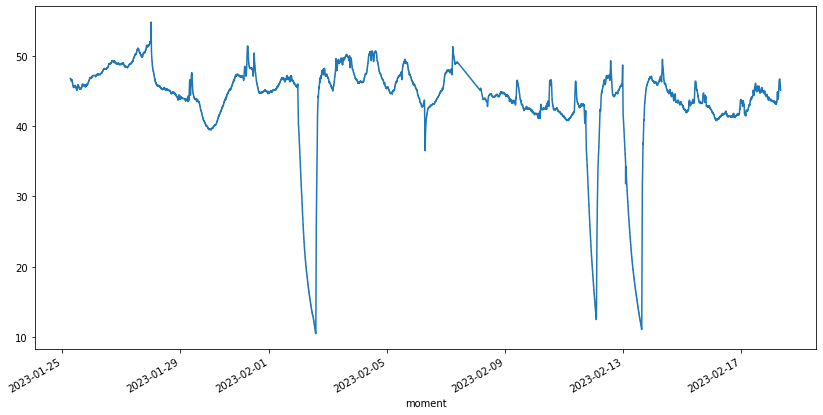

Температура нагрева подшипника №6 (редуктор эк...


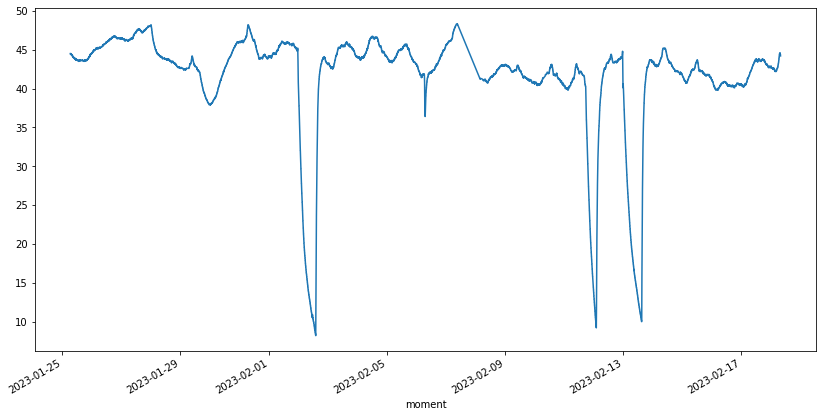

Температура нагрева подшипника №7 (ротор эксга...


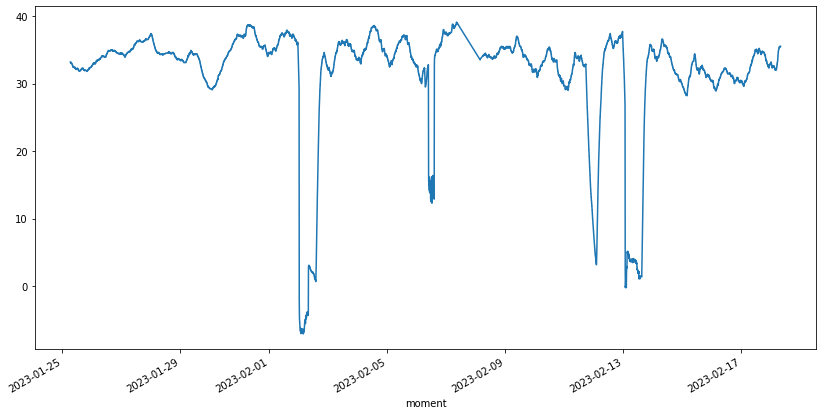

Температура нагрева подшипника №8 (ротор эксга...


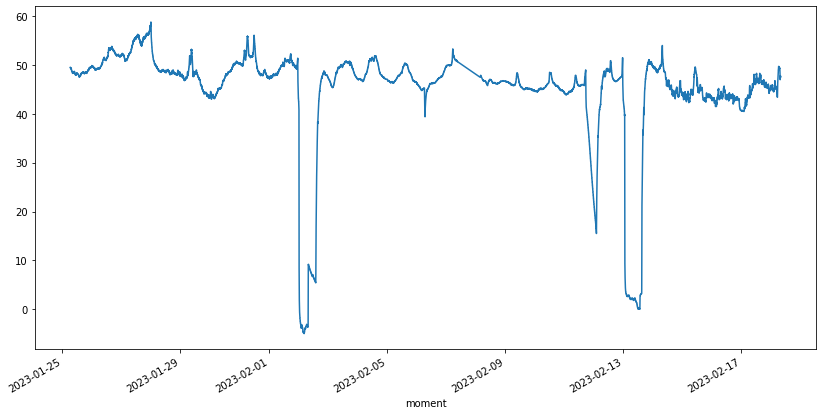

Температура нагрева подшипника №9 (ротор эксга...


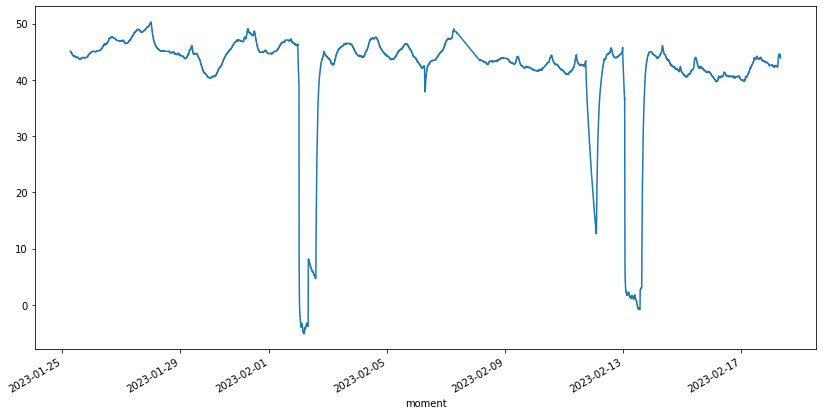

Горизонтал вибрация подшипника №1. Эксгаустер №5


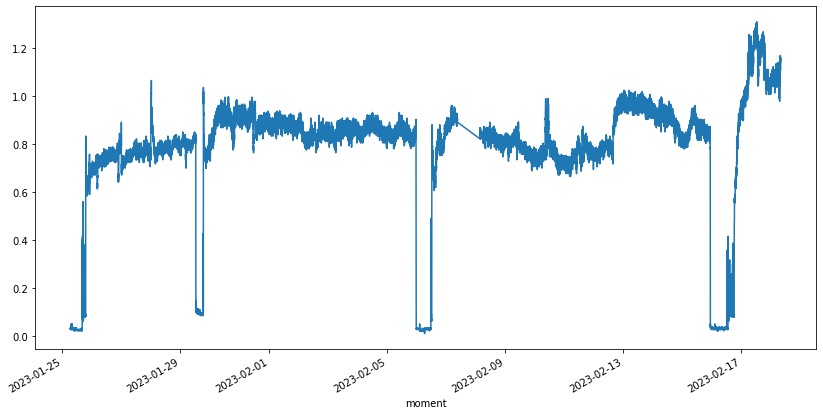

Вертикал вибрация подшипника №1. Эксгаустер №5


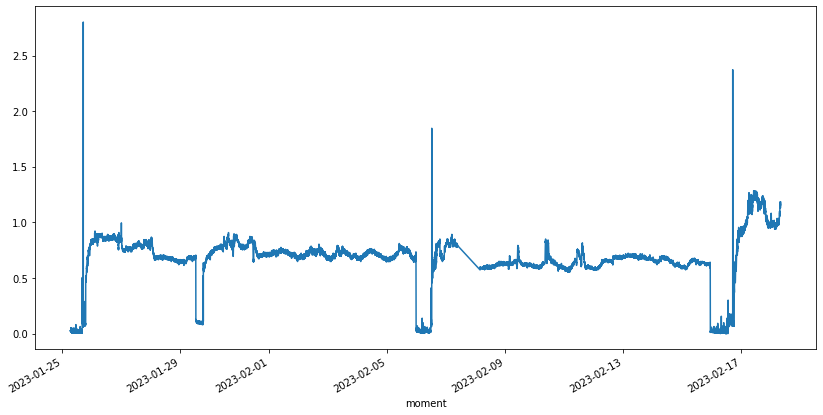

Осевая вибрация подшипника №1. Эксгаустер №5


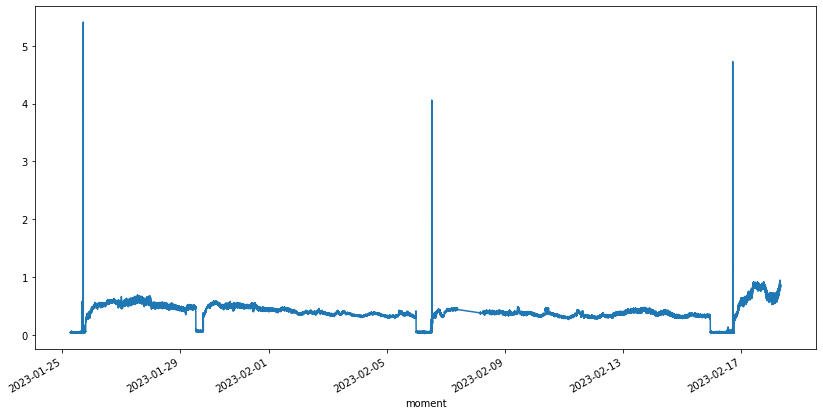

Горизонтал вибрация подшипника №2. Эксгаустер №5


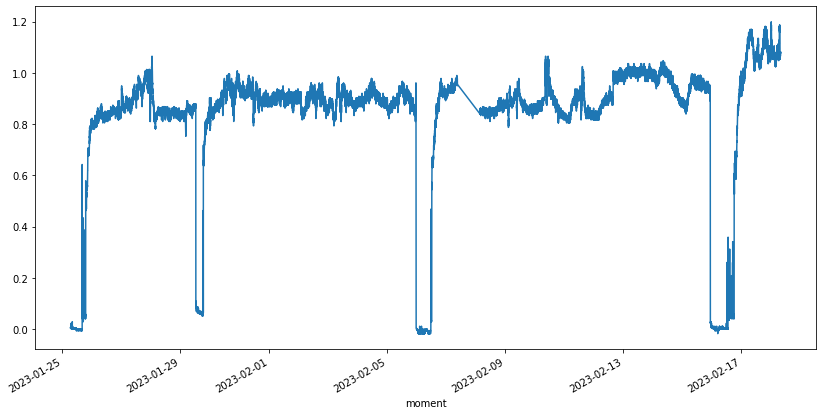

Вертикал вибрация подшипника №2. Эксгаустер №5


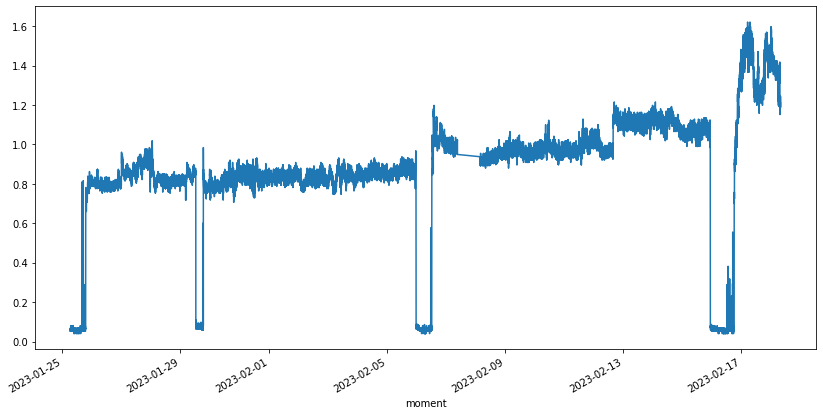

Осевая вибрация подшипника №2. Эксгаустер №5


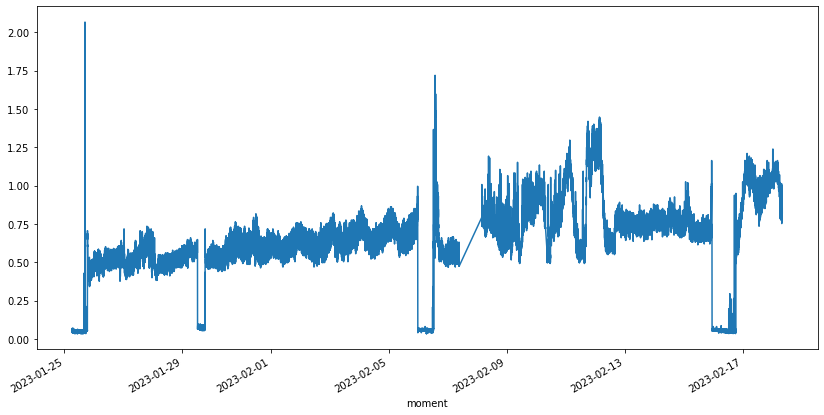

Горизонтал вибрация подшипника №7. Эксгаустер №5


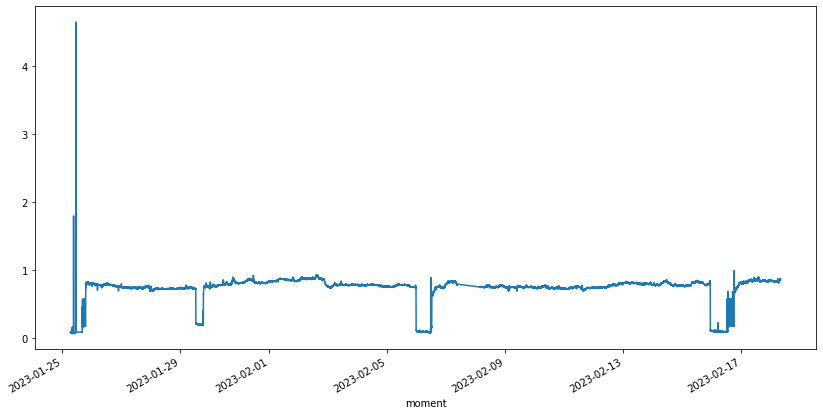

Вертикал вибрация подшипника №7. Эксгаустер №5


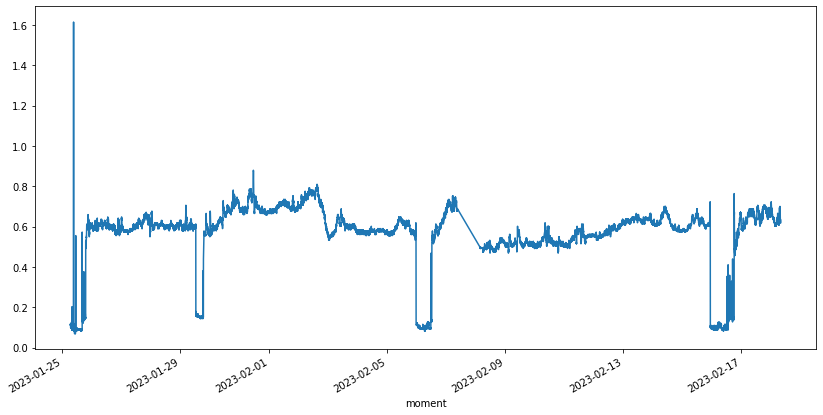

Осевая вибрация подшипника №7. Эксгаустер №5


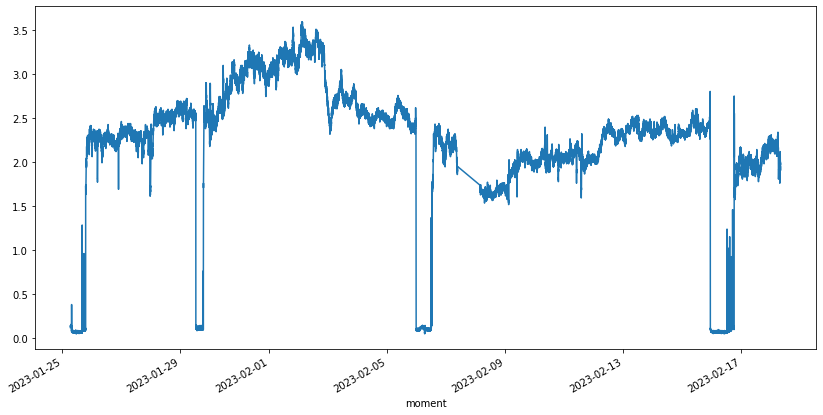

Горизонтал вибрация подшипника №8. Эксгаустер №5


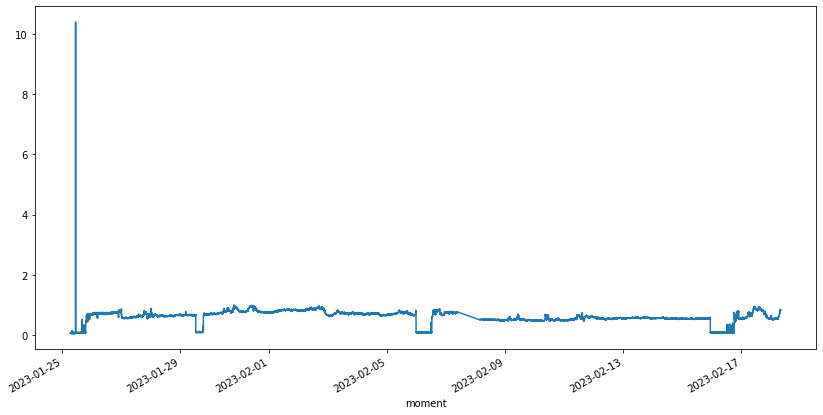

Вертикал вибрация подшипника №8. Эксгаустер №5


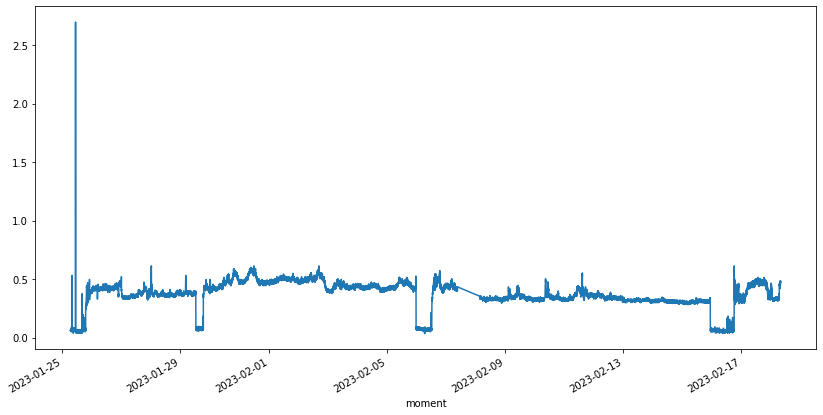

Осевая вибрация подшипника №8. Эксгаустер №5


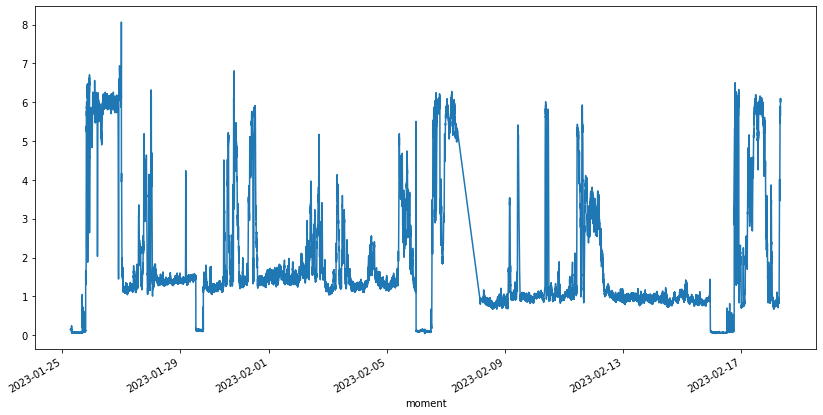

Температура нагрева подшипника №1 (ротора прив...


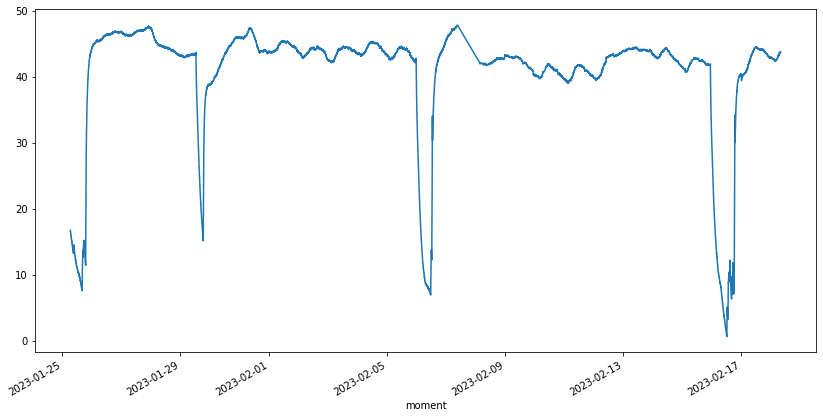

Температура нагрева подшипника №2 (ротора прив...


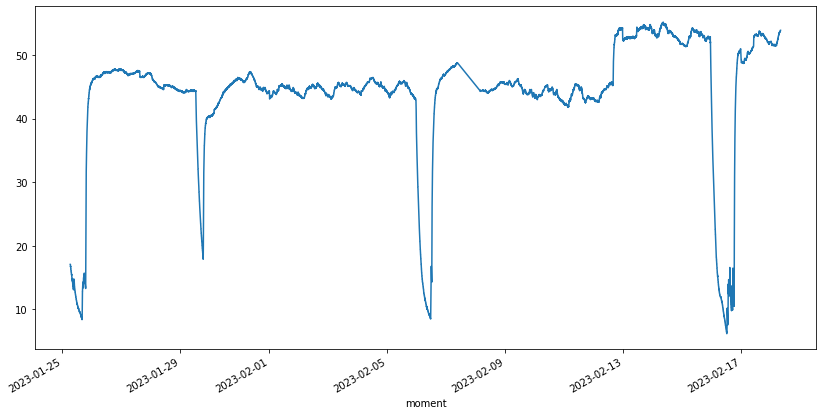

Температура нагрева подшипника №3 (редуктор эк...


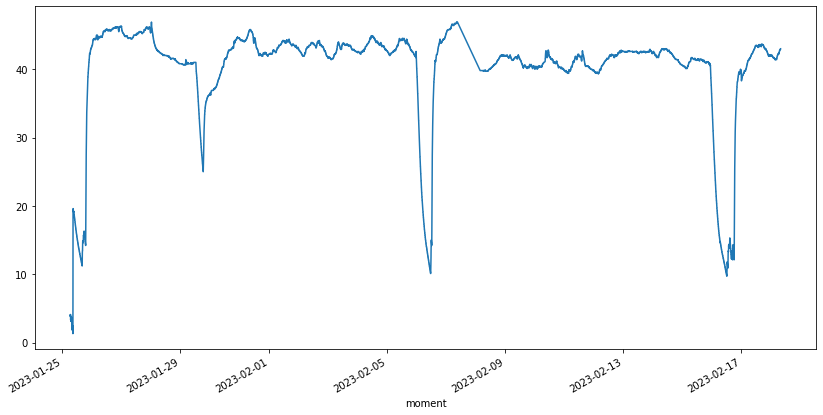

Температура нагрева подшипника №4 (редуктор эк...


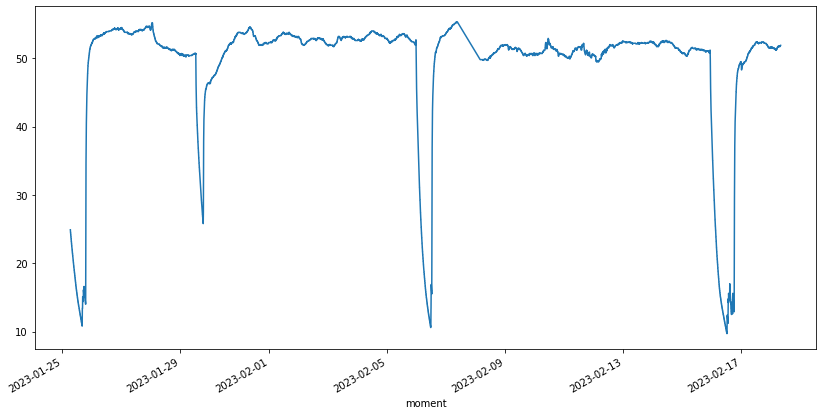

Температура нагрева подшипника №5 (редуктор эк...


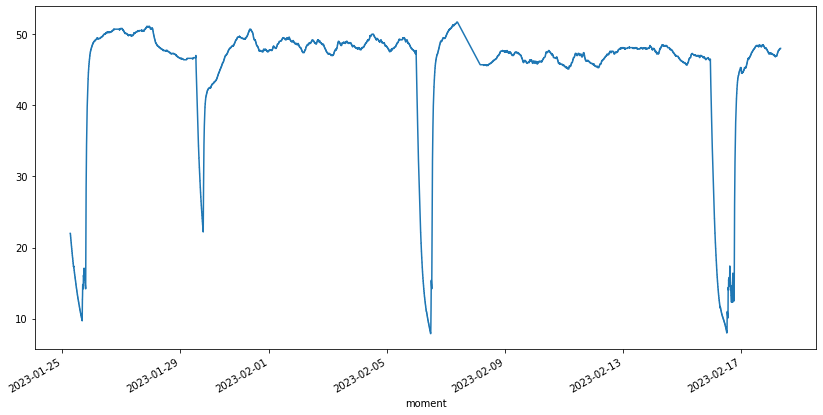

Температура нагрева подшипника №6 (редуктор эк...


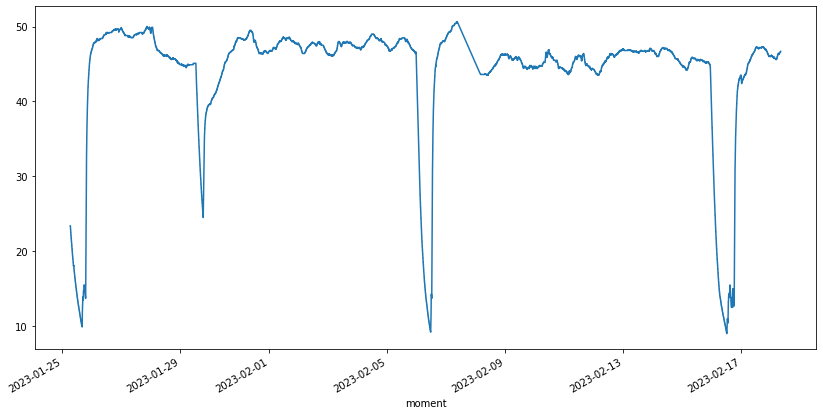

Температура нагрева подшипника №7 (ротор эксга...


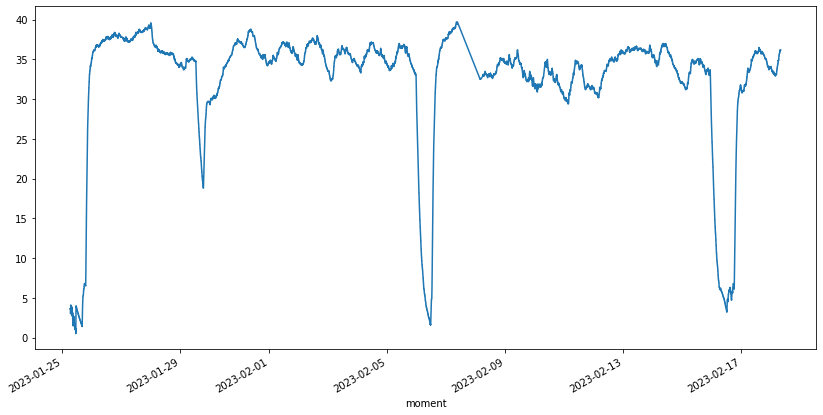

Температура нагрева подшипника №8 (ротор эксга...


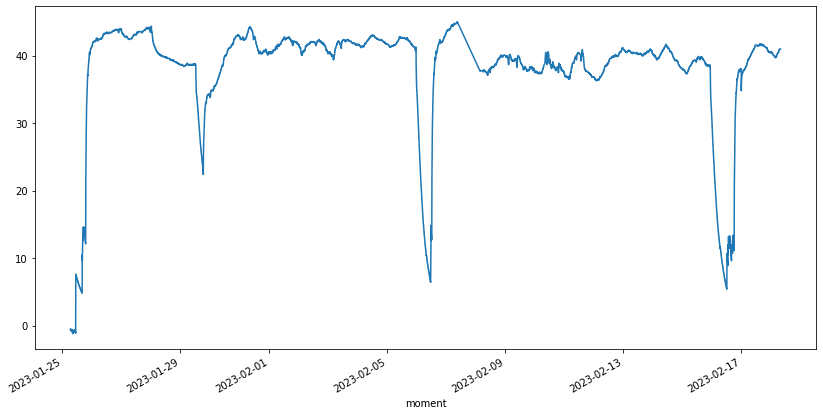

Температура нагрева подшипника №9 (ротор эксга...


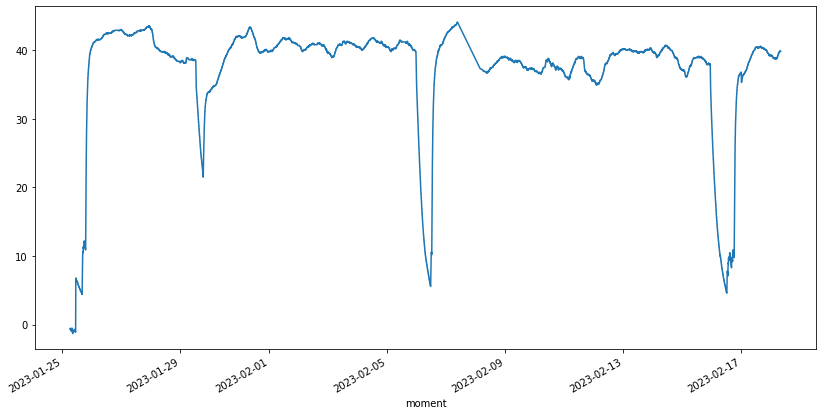

Горизонтал вибрация подшипника №1. Эксгаустер №6


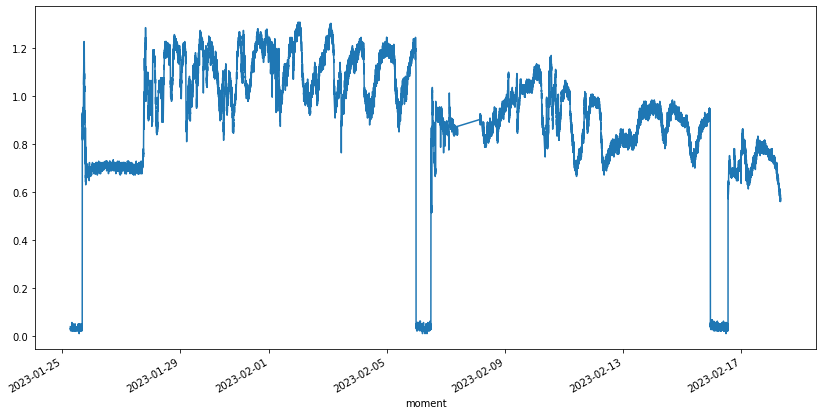

Вертикал вибрация подшипника №1. Эксгаустер №6


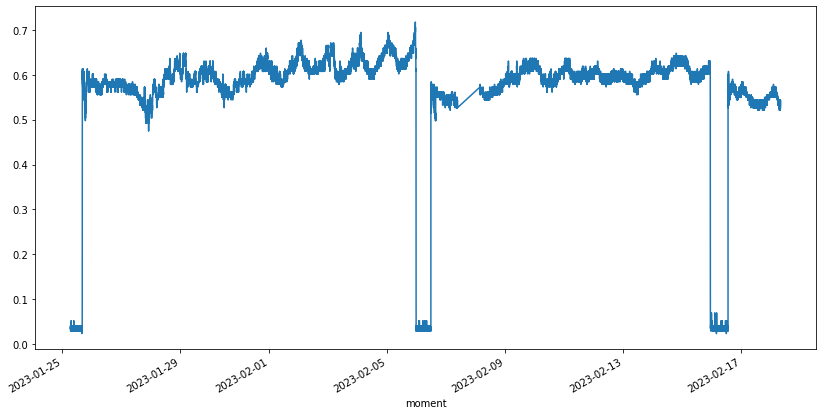

Осевая вибрация подшипника №1. Эксгаустер №6


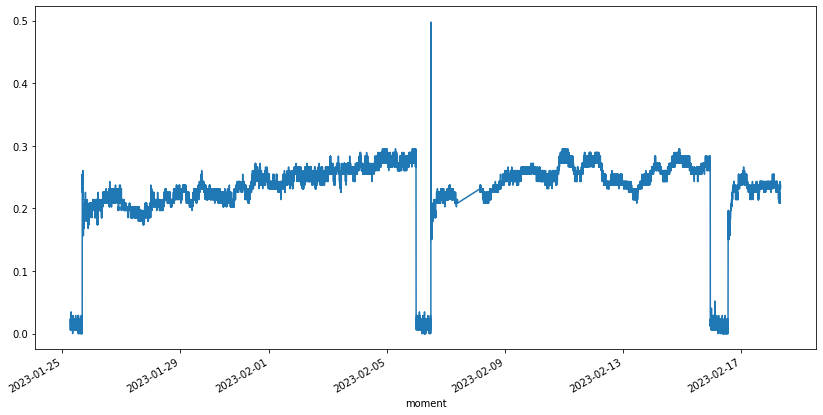

Горизонтал вибрация подшипника №2. Эксгаустер №6


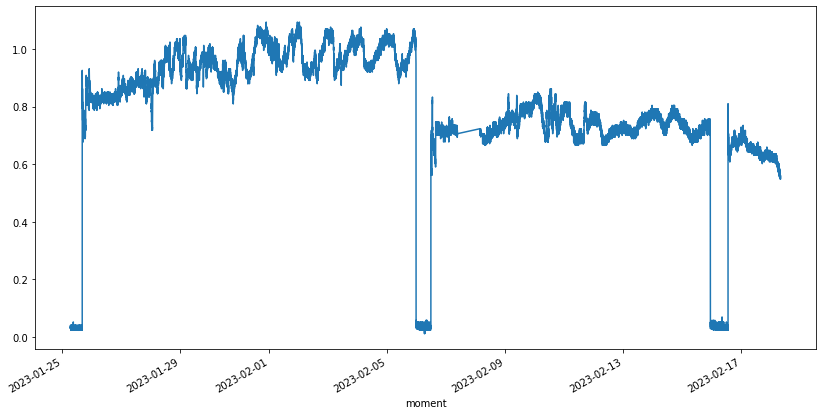

Вертикал вибрация подшипника №2. Эксгаустер №6


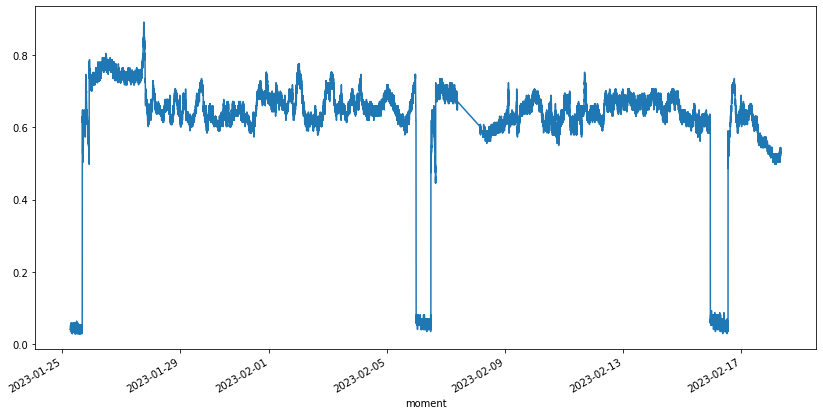

Осевая вибрация подшипника №2. Эксгаустер №6


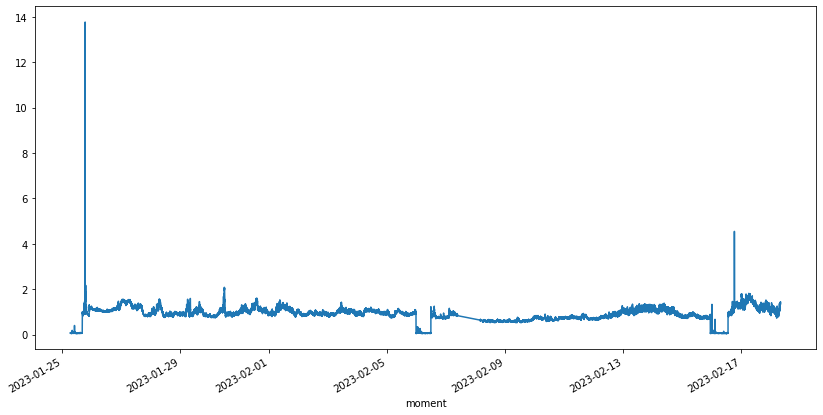

Горизонтал вибрация подшипника №7. Эксгаустер №6


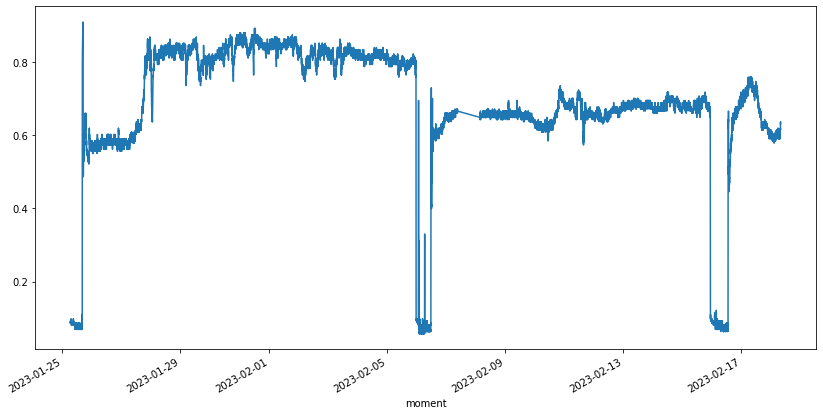

Вертикал вибрация подшипника №7. Эксгаустер №6


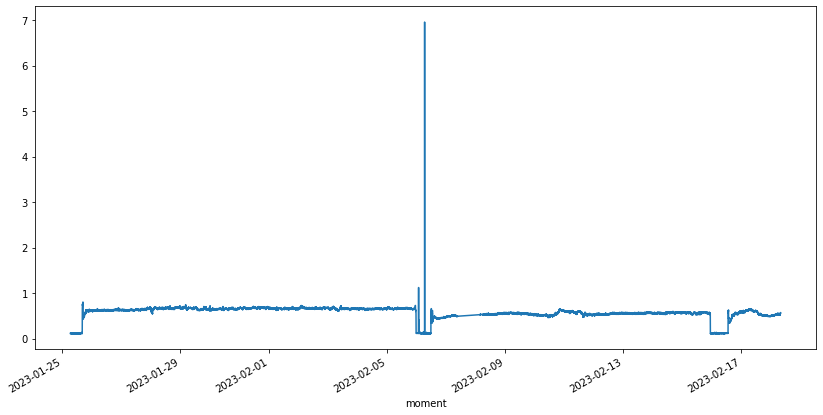

Осевая вибрация подшипника №7. Эксгаустер №6


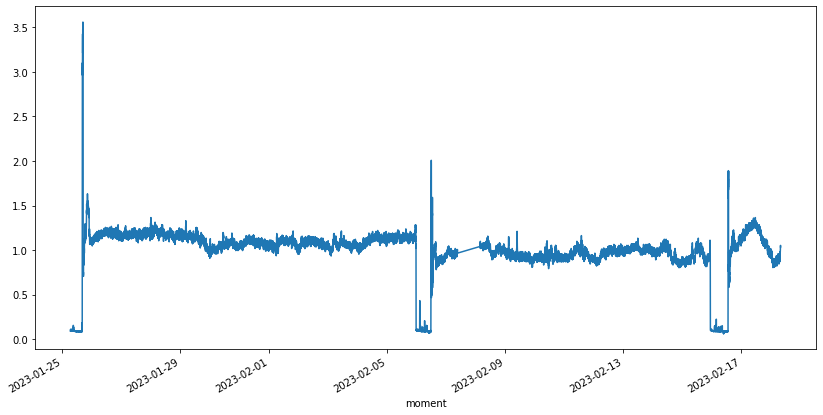

Горизонтал вибрация подшипника №8. Эксгаустер №6


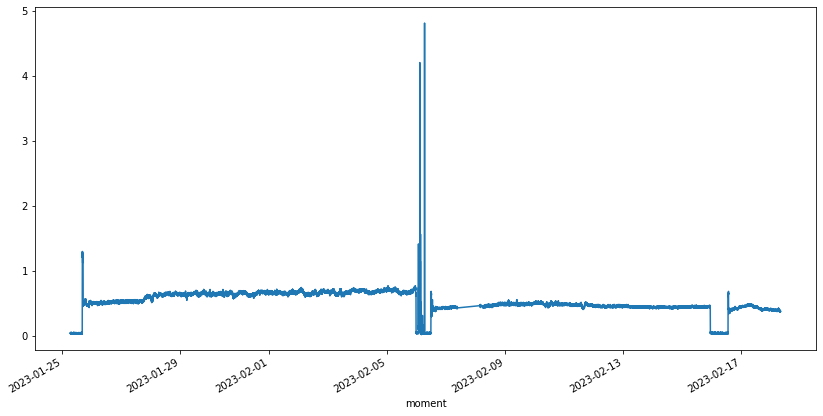

Вертикал вибрация подшипника №8. Эксгаустер №6


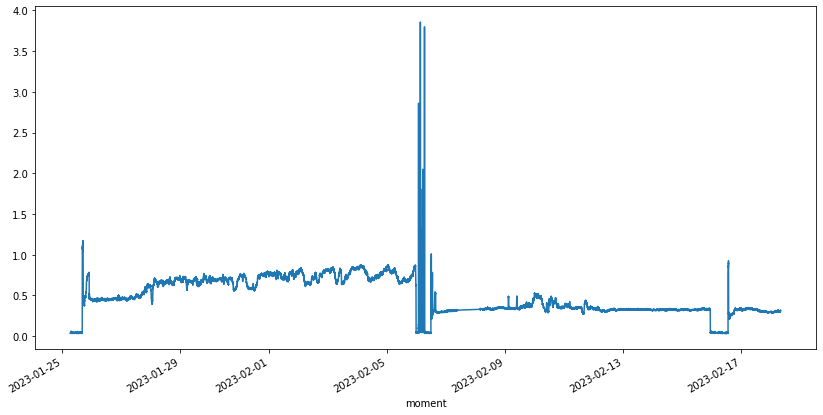

Осевая вибрация подшипника №8. Эксгаустер №6


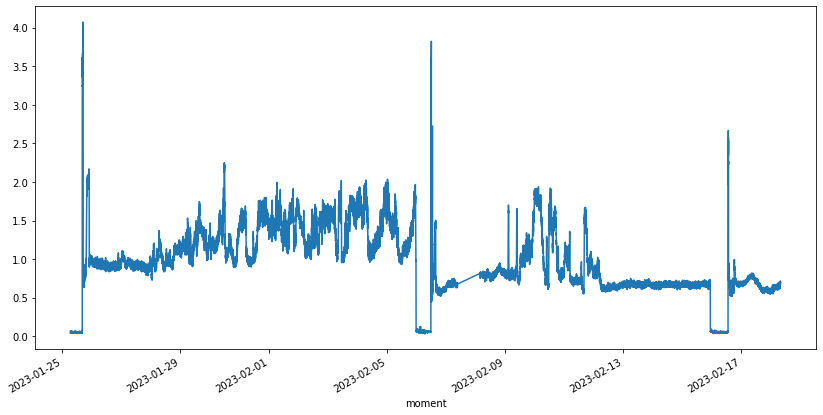

Температура нагрева подшипника №1 (ротора прив...


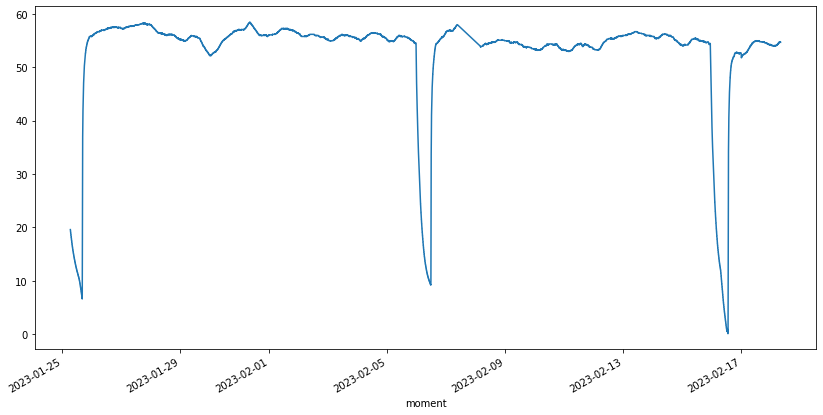

Температура нагрева подшипника №2 (ротора прив...


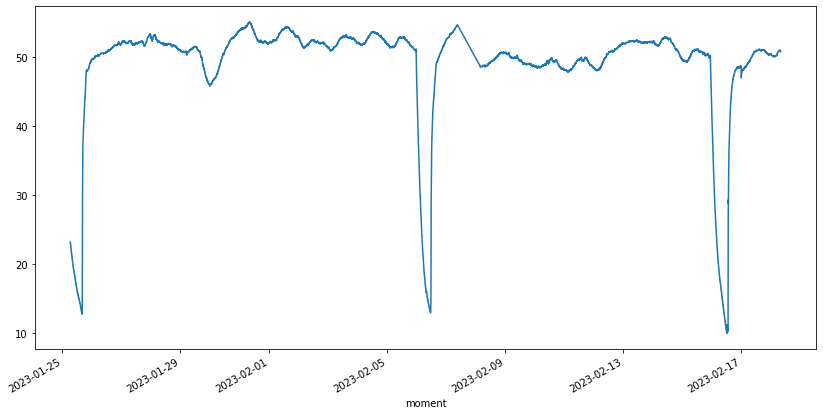

Температура нагрева подшипника №3 (редуктор эк...


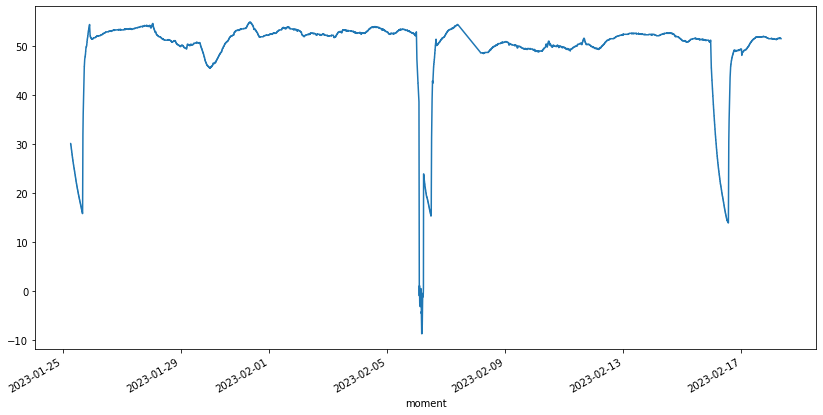

Температура нагрева подшипника №4 (редуктор эк...


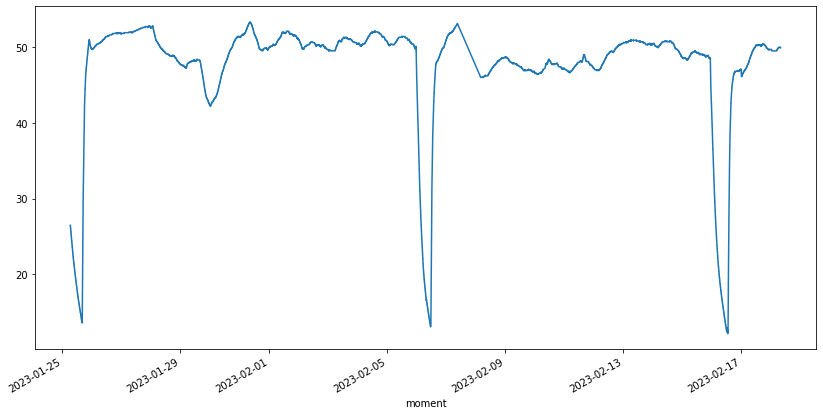

Температура нагрева подшипника №5 (редуктор эк...


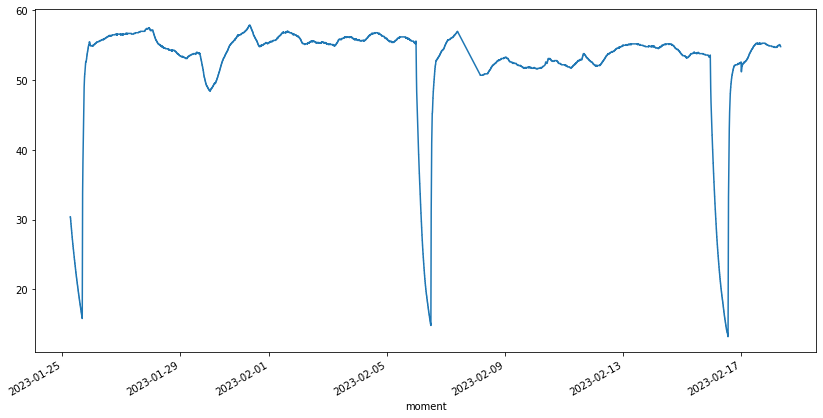

Температура нагрева подшипника №6 (редуктор эк...


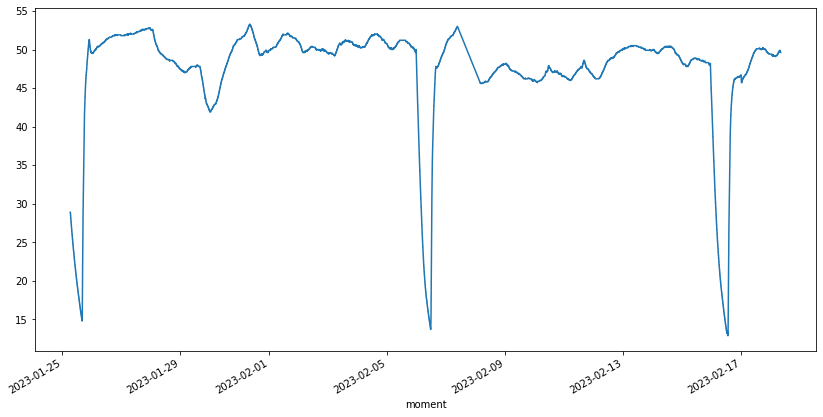

Температура нагрева подшипника №7 (ротор эксга...


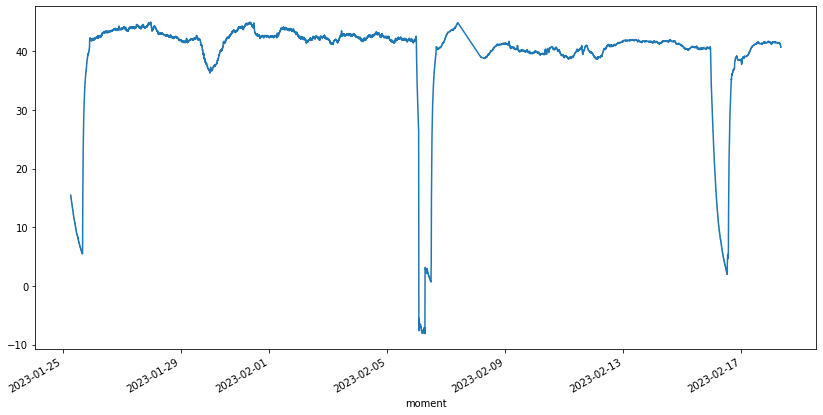

Температура нагрева подшипника №8 (ротор эксга...


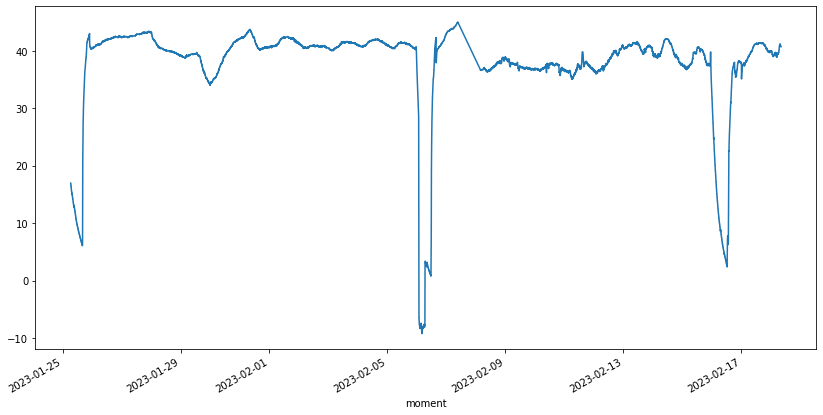

Температура нагрева подшипника №9 (ротор эксга...


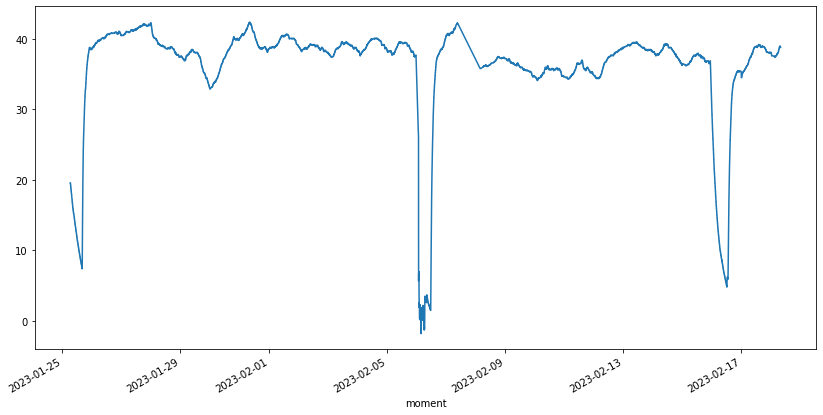

In [206]:
for i in range(1, 7):
    for col in globals()['exg_' + str(i)].columns:
        if 'подшипника' in col:
            print(col)
            try:
                plt.figure(figsize=(14, 7))
                globals()['exg_' + str(i)][col].plot()
                plt.show()
            except:
                pass

Попробуем обучить модели по следующим признакам.

Горизонтал вибрация подшипника №7. Эксгаустер №2
Вертикал вибрация подшипника №7. Эксгаустер №2
Осевая вибрация подшипника №8 . Эксгаустер №2
Осевая вибрация подшипника №7. Эксгаустер №2

Осевая вибрация подшипника №2. Эксгаустер №3
Горизонтал вибрация подшипника №7. Эксгаустер №3
Осевая вибрация подшипника №7. Эксгаустер №3
Осевая вибрация подшипника №8. Эксгаустер №3

Горизонтал вибрация подшипника №8. Эксгаустер №4
Вертикал вибрация подшипника №8. Эксгаустер №4
Осевая вибрация подшипника №8. Эксгаустер №4 ++++ но ремонт был не на ней

Вертикал вибрация подшипника №1. Эксгаустер №5


Осевая вибрация подшипника №1. Эксгаустер №6
Вертикал вибрация подшипника №8. Эксгаустер №6

Прогноз для эксгаустера № 3. Надо бы убрать данные по ремонту №4

In [217]:
exg_3_data = exg_3[['Осевая вибрация подшипника №2. Эксгаустер №3',
                    'Горизонтал вибрация подшипника №7. Эксгаустер №3',
                    'Осевая вибрация подшипника №7. Эксгаустер №3',
                    'Осевая вибрация подшипника №8. Эксгаустер №3']].sort_index()

In [218]:
print(exg_3_data.info())
display(exg_3_data.head(10))
print(f'Данные представлены за период наблюдений с {exg_3_data.index.min()} по {exg_3_data.index.max()}')
print('Упорядочены ли данные:', exg_3_data.index.is_monotonic)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32934 entries, 2023-01-25 06:32:25.125007 to 2023-02-18 08:15:25.439816
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Осевая вибрация подшипника №2. Эксгаустер №3      32932 non-null  float64
 1   Горизонтал вибрация подшипника №7. Эксгаустер №3  32932 non-null  float64
 2   Осевая вибрация подшипника №7. Эксгаустер №3      32932 non-null  float64
 3   Осевая вибрация подшипника №8. Эксгаустер №3      32932 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB
None


Осевая вибрация подшипника №2. Эксгаустер №3  \
moment                                                                     
2023-01-25 06:32:25.125007                                      1.440972   
2023-01-25 06:33:25.125007                                      1.417824   
2023-01-25 06:34:25.125007                                      1.429398   
2023-01-25 06:35:25.125007                                      1.429398   
2023-01-25 06:36:25.125007                                      1.452546   
2023-01-25 06:37:25.125007                                      1.429398   
2023-01-25 06:38:25.125007                                      1.440972   
2023-01-25 06:39:25.125007                                      1.423611   
2023-01-25 06:40:25.125007                                      1.429398   
2023-01-25 06:41:25.125007                                      1.429398   

                            Горизонтал вибрация подшипника №7. Эксгаустер №3  \
moment                                                                         
2023-01-25 06:32:25.125007                                          2.001208   
2023-01-25 06:33:25.125007                                          1.997886   
2023-01-25 06:34:25.125007                                          1.990758   
2023-01-25 06:35:25.125007                                          2.019292   
2023-01-25 06:36:25.125007                                          1.981981   
2023-01-25 06:37:25.125007                                          2.002010   
2023-01-25 06:38:25.125007                                          1.996545   
2023-01-25 06:39:25.125007                                          2.019944   
2023-01-25 06:40:25.125007                                          2.022923   
2023-01-25 06:41:25.125007                                          2.022389   

                            Осевая вибрация подшипника №7. Эксгаустер №3  \
moment                                                                     
2023-01-25 06:32:25.125007                                      1.494385   
2023-01-25 06:33:25.125007                                      1.482208   
2023-01-25 06:34:25.125007                                      1.489869   
2023-01-25 06:35:25.125007                                      1.489961   
2023-01-25 06:36:25.125007                                      1.494923   
2023-01-25 06:37:25.125007                                      1.499439   
2023-01-25 06:38:25.125007                                      1.493320   
2023-01-25 06:39:25.125007                                      1.510947   
2023-01-25 06:40:25.125007                                      1.532430   
2023-01-25 06:41:25.125007                                      1.530054   

                            Осевая вибрация подшипника №8. Эксгаустер №3  
moment                                                                    
2023-01-25 06:32:25.125007                                      1.024306  
2023-01-25 06:33:25.125007                                      1.070602  
2023-01-25 06:34:25.125007                                      1.064815  
2023-01-25 06:35:25.125007                                      1.024306  
2023-01-25 06:36:25.125007                                      1.035880  
2023-01-25 06:37:25.125007                                      1.024306  
2023-01-25 06:38:25.125007                                      1.041667  
2023-01-25 06:39:25.125007                                      1.053241  
2023-01-25 06:40:25.125007                                      1.024306  
2023-01-25 06:41:25.125007                                      0.989583

Данные представлены за период наблюдений с 2023-01-25 06:32:25.125007 по 2023-02-18 08:15:25.439816
Упорядочены ли данные: True


In [219]:
exg_3_data = exg_3_data.resample('1H').mean()
exg_3_data.head()

Осевая вибрация подшипника №2. Эксгаустер №3  \
moment                                                              
2023-01-25 06:00:00                                      1.437252   
2023-01-25 07:00:00                                      1.445975   
2023-01-25 08:00:00                                      1.432791   
2023-01-25 09:00:00                                      1.411273   
2023-01-25 10:00:00                                      1.414448   

                     Горизонтал вибрация подшипника №7. Эксгаустер №3  \
moment                                                                  
2023-01-25 06:00:00                                          2.006628   
2023-01-25 07:00:00                                          2.019957   
2023-01-25 08:00:00                                          2.025325   
2023-01-25 09:00:00                                          2.074041   
2023-01-25 10:00:00                                          2.056706   

                     Осевая вибрация подшипника №7. Эксгаустер №3  \
moment                                                              
2023-01-25 06:00:00                                      1.490409   
2023-01-25 07:00:00                                      1.451272   
2023-01-25 08:00:00                                      1.446896   
2023-01-25 09:00:00                                      1.590476   
2023-01-25 10:00:00                                      1.560650   

                     Осевая вибрация подшипника №8. Эксгаустер №3  
moment                                                             
2023-01-25 06:00:00                                      1.029059  
2023-01-25 07:00:00                                      1.019009  
2023-01-25 08:00:00                                      1.021711  
2023-01-25 09:00:00                                      1.034788  
2023-01-25 10:00:00                                      1.018808

<AxesSubplot:xlabel='moment'>

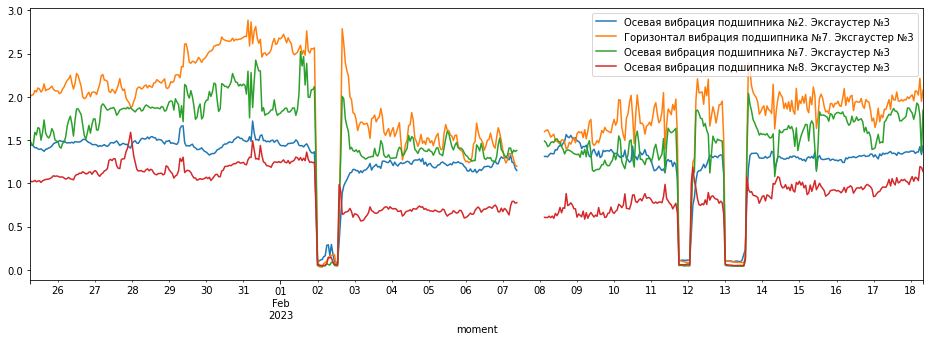

In [220]:
exg_3_data.plot(figsize=(16, 5))

'Горизонтал вибрация подшипника №7. Эксгаустер №3' - самая ярковыраженая.

In [221]:
exg_3_data = exg_3_data.interpolate()

<AxesSubplot:xlabel='moment'>

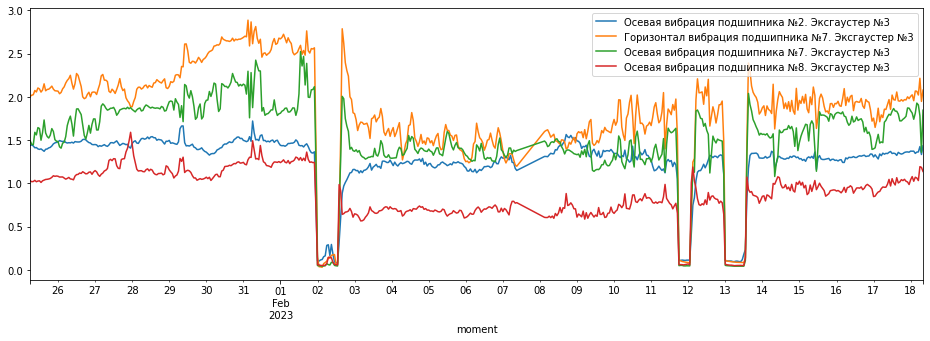

In [222]:
exg_3_data.plot(figsize=(16, 5))

In [230]:
def make_features(data, lag_qty, win_size): 
      
    for i in range(1, lag_qty+1):
        data['lad_' + str(i)] = data.iloc[:, [0]].shift(i)
        
    data['rolling_mean'] = data.iloc[:, [0]].shift().rolling(win_size).mean()
    
    return data

In [233]:
exg_3_data_new = make_features(exg_3_data, 10, 8)

In [234]:
exg_3_data_new.head()

Осевая вибрация подшипника №2. Эксгаустер №3  \
moment                                                              
2023-01-25 06:00:00                                      1.437252   
2023-01-25 07:00:00                                      1.445975   
2023-01-25 08:00:00                                      1.432791   
2023-01-25 09:00:00                                      1.411273   
2023-01-25 10:00:00                                      1.414448   

                     Горизонтал вибрация подшипника №7. Эксгаустер №3  \
moment                                                                  
2023-01-25 06:00:00                                          2.006628   
2023-01-25 07:00:00                                          2.019957   
2023-01-25 08:00:00                                          2.025325   
2023-01-25 09:00:00                                          2.074041   
2023-01-25 10:00:00                                          2.056706   

                     Осевая вибрация подшипника №7. Эксгаустер №3  \
moment                                                              
2023-01-25 06:00:00                                      1.490409   
2023-01-25 07:00:00                                      1.451272   
2023-01-25 08:00:00                                      1.446896   
2023-01-25 09:00:00                                      1.590476   
2023-01-25 10:00:00                                      1.560650   

                     Осевая вибрация подшипника №8. Эксгаустер №3     lad_1  \
moment                                                                        
2023-01-25 06:00:00                                      1.029059       NaN   
2023-01-25 07:00:00                                      1.019009  1.437252   
2023-01-25 08:00:00                                      1.021711  1.445975   
2023-01-25 09:00:00                                      1.034788  1.432791   
2023-01-25 10:00:00                                      1.018808  1.411273   

                     rolling_mean     lad_2     lad_3     lad_4  lad_5  lad_6  \
moment                                                                          
2023-01-25 06:00:00           NaN       NaN       NaN       NaN    NaN    NaN   
2023-01-25 07:00:00           NaN       NaN       NaN       NaN    NaN    NaN   
2023-01-25 08:00:00           NaN  1.437252       NaN       NaN    NaN    NaN   
2023-01-25 09:00:00           NaN  1.445975  1.437252       NaN    NaN    NaN   
2023-01-25 10:00:00           NaN  1.432791  1.445975  1.437252    NaN    NaN   

                     lad_7  lad_8  lad_9  lad_10  
moment                                            
2023-01-25 06:00:00    NaN    NaN    NaN     NaN  
2023-01-25 07:00:00    NaN    NaN    NaN     NaN  
2023-01-25 08:00:00    NaN    NaN    NaN     NaN  
2023-01-25 09:00:00    NaN    NaN    NaN     NaN  
2023-01-25 10:00:00    NaN    NaN    NaN     NaN